<a href="https://colab.research.google.com/github/niteesh19mt0250/Retail-sales-Prediction-Regression-Project/blob/main/Retail_Sales_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Pridiction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/niteesh19mt0250/Retail-sales-Prediction-Regression-Project/blob/main/Sample_ML_Submission_Template.ipynb

# **Problem Statement**


**Rossmann operates over 3000 drug stores in 7 European countries currently, Rossmann store manager are tasked with predicting their daily sale for upto six weeks in advance. Store promotions, competition, school and state holidays seasonality, and locality. With thousand of individual managers predicting sales based their unique circumstances, the accuracy of the result can be quite varied. You can provided with historical sales data, for 1115 Rossmann stores. The task to be forecast the "sales" column for the test set. Note that some store in the dataset ware tamporarily close to refurbishment.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# importing missingo library which helps us to visualize the missing values
import missingno as msn

from datetime import datetime as dt
# code to see the execution time in mili seconds
!pip install ipython-autotime
%load_ext autotime

# Import  VIF factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Adding this to ignore future warnings
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 86.2 ms (started: 2023-06-12 17:06:39 +00:00)


### Dataset Loading

In [4]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 5.75 s (started: 2023-06-12 17:06:40 +00:00)


In [5]:
# Copy the path file of the store dataset
file_path1 = '/content/drive/MyDrive/AlmaBetter Project1/store (1).csv'

time: 419 µs (started: 2023-06-12 17:06:45 +00:00)


In [6]:
# Copy the path file of the Rossmann Store
file_path2 = '/content/drive/MyDrive/AlmaBetter Project1/Rossmann Stores Data (1).csv'

time: 409 µs (started: 2023-06-12 17:06:45 +00:00)


In [7]:
# Store Dataset 
store = pd.read_csv(file_path1)

time: 13.9 ms (started: 2023-06-12 17:06:45 +00:00)


In [8]:
# Rossmann Store dataset
rossmann_store = pd.read_csv(file_path2)

time: 658 ms (started: 2023-06-12 17:06:45 +00:00)


### Dataset First View

In [9]:
# First view of the Rossmann Store
rossmann_store.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

time: 11.1 ms (started: 2023-06-12 17:06:46 +00:00)


In [10]:
# First view of the Store dataset
store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

time: 8.68 ms (started: 2023-06-12 17:06:46 +00:00)


### Dataset Rows & Columns count

In [11]:
# Dataset Rows & Columns count
print(f'Number of rows are {rossmann_store.shape[0]} and columns are {rossmann_store.shape[1]} present in the Rossmann stores dateset.')
print(f'Number of rows are {store.shape[0]} and columns are {store.shape[1]} present in the store dateset.')

Number of rows are 1017209 and columns are 9 present in the Rossmann stores dateset.
Number of rows are 1115 and columns are 10 present in the store dateset.
time: 810 µs (started: 2023-06-12 17:06:46 +00:00)


* Total number of the rows are 1017209 and columns are 9 present in the **Rossmann Store** dataset.
* Total number of the rows are 1115 and columns are 10 present in the **Store** dataset.

### Dataset Information

In [12]:
# Dataset Info
print('-'*80)
print(rossmann_store.info())
print('-'*80)
print(store.info())

--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------ 

#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count
print('Number of duplicate vale in store datasets = ',store.duplicated().sum(),'\n','Number of duplicate value in Rossmann store datasets = ',rossmann_store.duplicated().sum())

Number of duplicate vale in store datasets =  0 
 Number of duplicate value in Rossmann store datasets =  0
time: 251 ms (started: 2023-06-12 17:06:46 +00:00)


#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count of Rossmann store dataset
rossmann_store.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

time: 357 ms (started: 2023-06-12 17:06:47 +00:00)


In [15]:
# Missing Values/Null Values Count of store dataset
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

time: 4.7 ms (started: 2023-06-12 17:06:47 +00:00)


<Axes: >

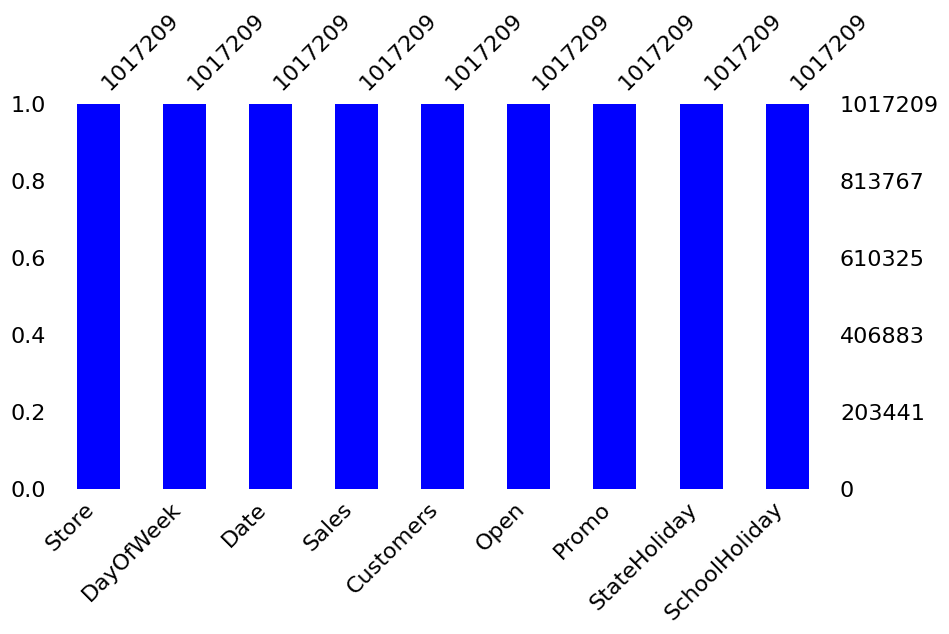

time: 1.65 s (started: 2023-06-12 17:06:47 +00:00)


In [16]:
# Visualizing the missing values of Rossmann store dataset
msn.bar(rossmann_store,figsize = (10,5),color = 'blue')

<Axes: >

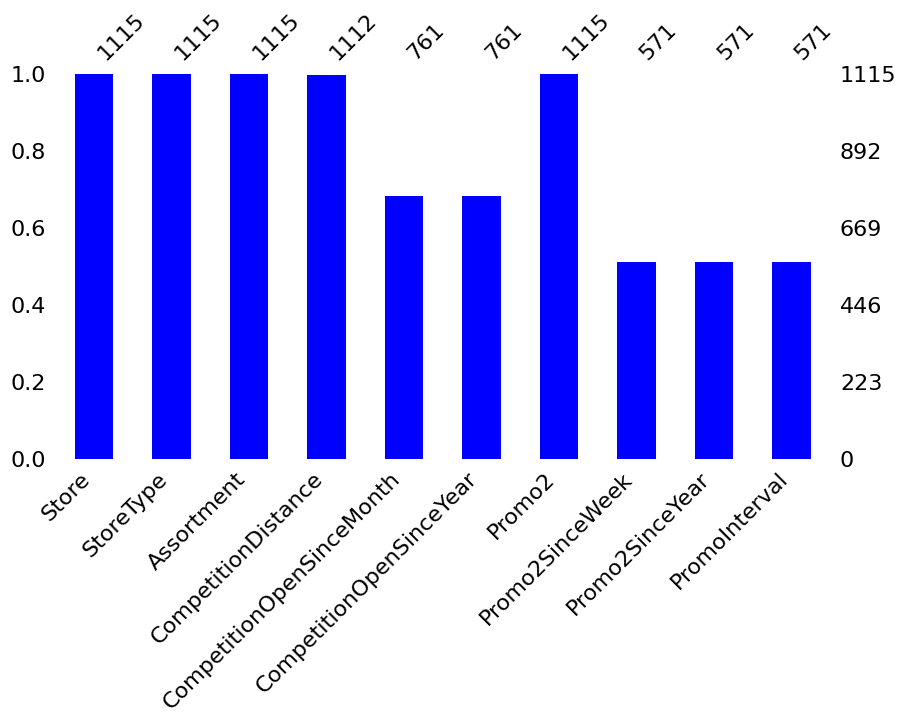

time: 1.29 s (started: 2023-06-12 17:06:49 +00:00)


In [17]:
# Visualizing the missing values of store dataset
msn.bar(store,figsize=(10,5), color = 'blue')

### What did you know about your dataset?

We have to got the following points about our dataset:
1. **'Rossmann dataset'** is having **1017209 rows and 9 columns** and does not have any null value.
2. **'Stores dataset'** is having **1115 rows and 10 columns**. It contains null values in total six features which is CompetitionDistance,CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek,Promo2SinceYear and PromoInterval. 
3. There are **no duplicate** values present in both the datasets.
4. There are total 4 **categorical features** in 'Rossmann' dataset namely Open, Promo, StateHoliday and SchoolHoliday and 'Stores' contain categorical features namely StoreType, Assortment, Promo2, PromoInterval.

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
print('-'*80)
print('Columns of the Rossmann Store dataset',rossmann_store.columns)
print('\n')
print('-'*80)
print('Columns of the store dataset',store.columns)

--------------------------------------------------------------------------------
Columns of the Rossmann Store dataset Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')


--------------------------------------------------------------------------------
Columns of the store dataset Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')
time: 13.5 ms (started: 2023-06-12 17:06:50 +00:00)


In [19]:
# Rossmann Store Dataset Describe
rossmann_store.describe(include = 'all')

Store     DayOfWeek        Date         Sales     Customers  \
count   1.017209e+06  1.017209e+06     1017209  1.017209e+06  1.017209e+06   
unique           NaN           NaN         942           NaN           NaN   
top              NaN           NaN  2015-07-31           NaN           NaN   
freq             NaN           NaN        1115           NaN           NaN   
mean    5.584297e+02  3.998341e+00         NaN  5.773819e+03  6.331459e+02   
std     3.219087e+02  1.997391e+00         NaN  3.849926e+03  4.644117e+02   
min     1.000000e+00  1.000000e+00         NaN  0.000000e+00  0.000000e+00   
25%     2.800000e+02  2.000000e+00         NaN  3.727000e+03  4.050000e+02   
50%     5.580000e+02  4.000000e+00         NaN  5.744000e+03  6.090000e+02   
75%     8.380000e+02  6.000000e+00         NaN  7.856000e+03  8.370000e+02   
max     1.115000e+03  7.000000e+00         NaN  4.155100e+04  7.388000e+03   

                Open         Promo StateHoliday  SchoolHoliday  
count   1.017209e+06  1.017209e+06      1017209   1.017209e+06  
unique           NaN           NaN            5            NaN  
top              NaN           NaN            0            NaN  
freq             NaN           NaN       855087            NaN  
mean    8.301067e-01  3.815145e-01          NaN   1.786467e-01  
std     3.755392e-01  4.857586e-01          NaN   3.830564e-01  
min     0.000000e+00  0.000000e+00          NaN   0.000000e+00  
25%     1.000000e+00  0.000000e+00          NaN   0.000000e+00  
50%     1.000000e+00  0.000000e+00          NaN   0.000000e+00  
75%     1.000000e+00  1.000000e+00          NaN   0.000000e+00  
max     1.000000e+00  1.000000e+00          NaN   1.000000e+00

time: 387 ms (started: 2023-06-12 17:06:50 +00:00)


In [20]:
#Store Dataset Describe
store.describe(include='all')

Store StoreType Assortment  CompetitionDistance  \
count   1115.00000      1115       1115          1112.000000   
unique         NaN         4          3                  NaN   
top            NaN         a          a                  NaN   
freq           NaN       602        593                  NaN   
mean     558.00000       NaN        NaN          5404.901079   
std      322.01708       NaN        NaN          7663.174720   
min        1.00000       NaN        NaN            20.000000   
25%      279.50000       NaN        NaN           717.500000   
50%      558.00000       NaN        NaN          2325.000000   
75%      836.50000       NaN        NaN          6882.500000   
max     1115.00000       NaN        NaN         75860.000000   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear       Promo2  \
count                  761.000000                761.000000  1115.000000   
unique                        NaN                       NaN          NaN   
top                           NaN                       NaN          NaN   
freq                          NaN                       NaN          NaN   
mean                     7.224704               2008.668857     0.512108   
std                      3.212348                  6.195983     0.500078   
min                      1.000000               1900.000000     0.000000   
25%                      4.000000               2006.000000     0.000000   
50%                      8.000000               2010.000000     1.000000   
75%                     10.000000               2013.000000     1.000000   
max                     12.000000               2015.000000     1.000000   

        Promo2SinceWeek  Promo2SinceYear    PromoInterval  
count        571.000000       571.000000              571  
unique              NaN              NaN                3  
top                 NaN              NaN  Jan,Apr,Jul,Oct  
freq                NaN              NaN              335  
mean          23.595447      2011.763573              NaN  
std           14.141984         1.674935              NaN  
min            1.000000      2009.000000              NaN  
25%           13.000000      2011.000000              NaN  
50%           22.000000      2012.000000              NaN  
75%           37.000000      2013.000000              NaN  
max           50.000000      2015.000000              NaN

time: 32.8 ms (started: 2023-06-12 17:06:50 +00:00)


### Variables Description 

**Rossmann Stores Data.csv** - historical data including Sales

**Store.csv** - supplemental information about the stores

**Data fields** - Most of the fields are self-explanatory. The following are descriptions for those that aren't.

**Id** - an Id that represents a (Store, Date) duple within the test set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day (this is what you are predicting)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday.

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started a new. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.

### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable of Rossman Store Dataset.
for col in rossmann_store.columns.tolist():
  print('Number of unique value in',col,'is',rossmann_store[col].nunique(),'.')

Number of unique value in Store is 1115 .
Number of unique value in DayOfWeek is 7 .
Number of unique value in Date is 942 .
Number of unique value in Sales is 21734 .
Number of unique value in Customers is 4086 .
Number of unique value in Open is 2 .
Number of unique value in Promo is 2 .
Number of unique value in StateHoliday is 5 .
Number of unique value in SchoolHoliday is 2 .
time: 112 ms (started: 2023-06-12 17:06:50 +00:00)


In [22]:
# Check Unique Values for each variable of Store Dataset.
for col in store.columns.tolist():
  print('Number of unique value in',col,'is',store[col].nunique(),'.')

Number of unique value in Store is 1115 .
Number of unique value in StoreType is 4 .
Number of unique value in Assortment is 3 .
Number of unique value in CompetitionDistance is 654 .
Number of unique value in CompetitionOpenSinceMonth is 12 .
Number of unique value in CompetitionOpenSinceYear is 23 .
Number of unique value in Promo2 is 2 .
Number of unique value in Promo2SinceWeek is 24 .
Number of unique value in Promo2SinceYear is 7 .
Number of unique value in PromoInterval is 3 .
time: 3.72 ms (started: 2023-06-12 17:06:50 +00:00)


## 3. ***Data Wrangling***

### Data Wrangling Code

**Null Value Treatment**

 ##### a). Handling null values from **CompetitionDistance** feature.

In [23]:
# fetching the observations which contains null values in CompetitionDistance feature
store[store["CompetitionDistance"].isnull()]

Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov

time: 13.3 ms (started: 2023-06-12 17:06:51 +00:00)


<Axes: xlabel='CompetitionDistance'>

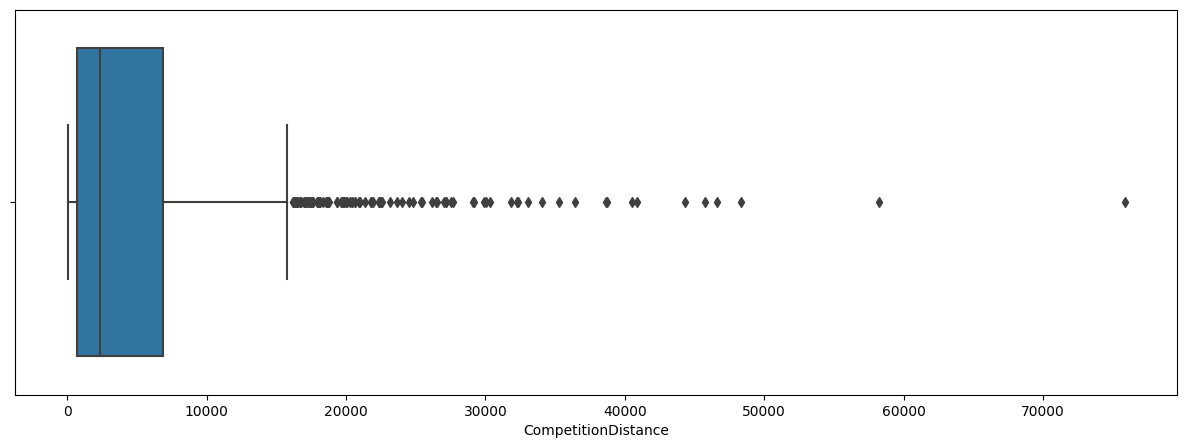

time: 172 ms (started: 2023-06-12 17:06:51 +00:00)


In [24]:
# plotting box plot to check the outliers in CompetitionDistance features
plt.figure(figsize=(15,5))
sns.boxplot(x= store["CompetitionDistance"])

We have to fill the null values of CompetitionDistance, there are **four** options:
1. **Zero(0) :** Not effective as the corresponding values for CompetitionSinceMonth and CompetitionSinceYear are not zero.
2. **Mean :** Replacing null values with mean will create blunders as it contains outliers and mean is influenced with outliers.
3. **Median :** To get good results replacing with median can be a better choice.
4. **Mode :** Mode can also help to fill the null values in our case.

Since, we have two options(Mode and Median) we are going with the median.

In [25]:
# filling null values
store["CompetitionDistance"].fillna(store["CompetitionDistance"].median(), inplace=True)

time: 2.06 ms (started: 2023-06-12 17:06:51 +00:00)


In [26]:
# rechecking if we have any further null values in CompetitionDistance feature
store[store["CompetitionDistance"].isnull()].sum()

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

time: 8.53 ms (started: 2023-06-12 17:06:51 +00:00)


In [27]:
# rechecking if we have any null values
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
time: 10.5 ms (started: 2023-06-12 17:06:51 +00:00)


Hurray!!  In the store dataset, they have not any further null values in CompetitionDistance feature.

##### b). Handling null values from **CompetitionOpenSinceMonth and CompetitionOpenSinceYear** feature.

In [28]:
# fetching the observations which contains null values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear feature
store[store["CompetitionOpenSinceMonth"].isnull()]

Store StoreType Assortment  CompetitionDistance  \
11       12         a          c               1070.0   
12       13         d          a                310.0   
15       16         a          c               3270.0   
18       19         a          c               3240.0   
21       22         a          a               1040.0   
...     ...       ...        ...                  ...   
1095   1096         a          c               1130.0   
1099   1100         a          a                540.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
11                          NaN                       NaN       1   
12                          NaN                       NaN       1   
15                          NaN                       NaN       0   
18                          NaN                       NaN       1   
21                          NaN                       NaN       1   
...                         ...                       ...     ...   
1095                        NaN                       NaN       1   
1099                        NaN                       NaN       1   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
11               13.0           2010.0   Jan,Apr,Jul,Oct  
12               45.0           2009.0   Feb,May,Aug,Nov  
15                NaN              NaN               NaN  
18               22.0           2011.0  Mar,Jun,Sept,Dec  
21               22.0           2012.0   Jan,Apr,Jul,Oct  
...               ...              ...               ...  
1095             10.0           2014.0  Mar,Jun,Sept,Dec  
1099             14.0           2011.0   Jan,Apr,Jul,Oct  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec  

[354 rows x 10 columns]

time: 14.6 ms (started: 2023-06-12 17:06:51 +00:00)


<Axes: >

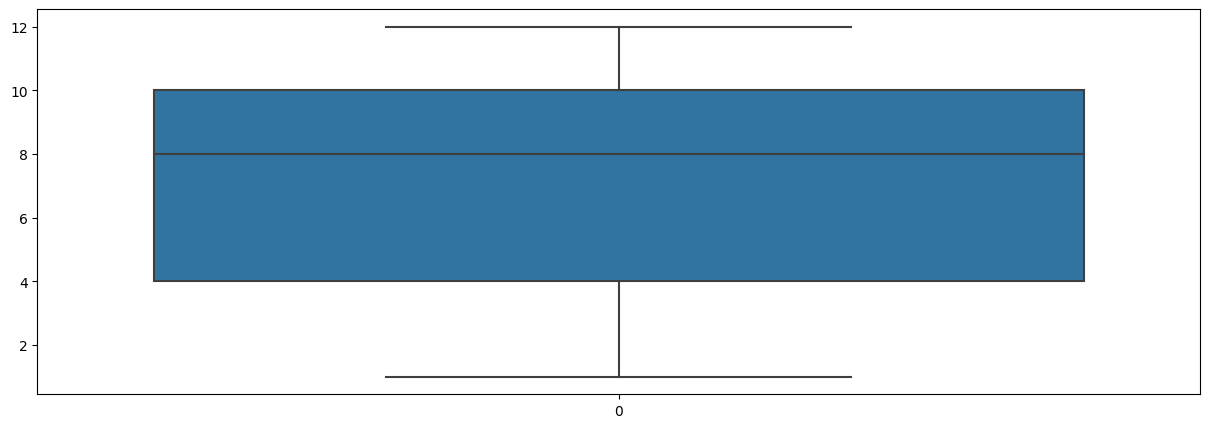

time: 154 ms (started: 2023-06-12 17:06:51 +00:00)


In [29]:
# plotting seaborn box plot to check the outliers in CompetitionOpenSinceMonth and CompetitionOpenSinceYear features
plt.figure(figsize=(15,5))
sns.boxplot(store["CompetitionOpenSinceMonth"])

<Axes: >

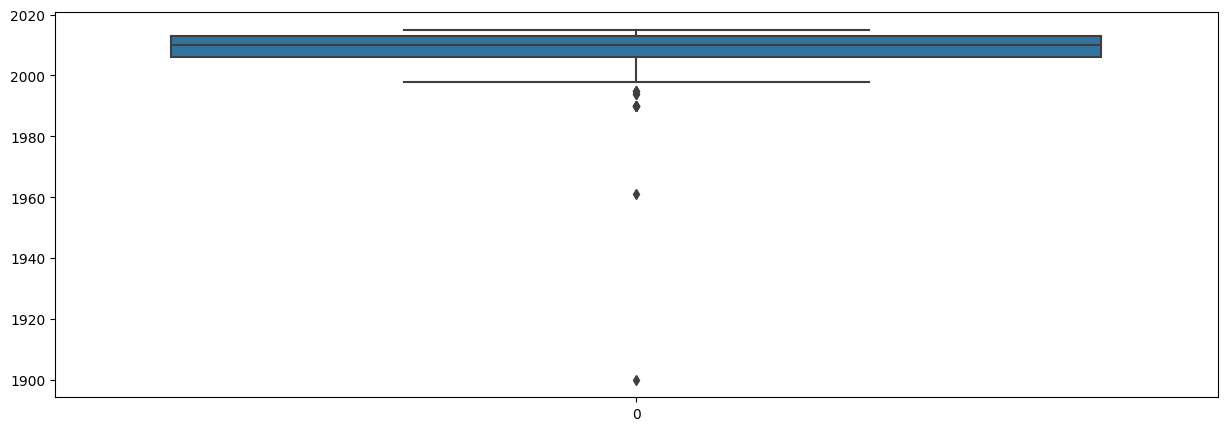

time: 148 ms (started: 2023-06-12 17:06:51 +00:00)


In [30]:
# plotting seaborn box plot to check the outliers in CompetitionOpenSinceMonth and CompetitionOpenSinceYear features
plt.figure(figsize=(15,5))
sns.boxplot(store["CompetitionOpenSinceYear"])

Filling null values of CompetitionOpenSinceMonth and CompetitionOpenSinceYear with Mode.

In [31]:
# filling null values of CompetitionOpenSinceMonth
store["CompetitionOpenSinceMonth"].fillna(store["CompetitionOpenSinceMonth"].mode()[0], inplace=True)

time: 1.78 ms (started: 2023-06-12 17:06:51 +00:00)


In [32]:
# filling null values of CompetitionOpenSinceYear
store["CompetitionOpenSinceYear"].fillna(store["CompetitionOpenSinceYear"].mode()[0], inplace=True)

time: 1.24 ms (started: 2023-06-12 17:06:51 +00:00)


In [33]:
# rechecking if we have any null values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
time: 8.36 ms (started: 2023-06-12 17:06:51 +00:00)


##### c). Handling null values from **Promo2SinceWeek, Promo2SinceYear and PromoInterval** feature.

Since corresponding value where Promo2 is 0 for features Promo2SinceWeek, Promo2SinceYear and PromoInterval having null values. So, we are replacing null values with 0.

In [34]:
# Replacing all the null values of Promo2SinceWeek, Promo2SinceYear and PromoInterval with 0. 
store["Promo2SinceWeek"].fillna(0, inplace=True)
store["Promo2SinceYear"].fillna(0, inplace=True)
store["PromoInterval"].fillna(0, inplace=True)

time: 2.91 ms (started: 2023-06-12 17:06:51 +00:00)


In [35]:
# rechecking if our features contains more null values
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
time: 8.68 ms (started: 2023-06-12 17:06:51 +00:00)


Congratulations we have achieved our first milestone by cleaning up all the null/missing values from both the datasets.

#### 2. Merging datasets

In [36]:
# checking shape of dataset using left join
df_left= pd.merge(rossmann_store, store, on='Store', how= 'left')
print(df_left.shape)
print(f'Total number of null values obtained from left join: {df_left.isna().sum().sum()}')

# checking shape of dataset using right join
df_right= pd.merge(rossmann_store, store, on='Store', how= 'right')
print(df_right.shape)
print(f'Total number of null values obtained from right join: {df_right.isna().sum().sum()}')


# checking shape of dataset using inner join
df_inner= pd.merge(rossmann_store, store, on='Store', how= 'inner')
print(df_inner.shape)
print(f'Total number of null values obtained from inner join: {df_inner.isna().sum().sum()}')

# checking shape of dataset using outer join
df_outer= pd.merge(rossmann_store, store, on='Store', how= 'outer')
print(df_outer.shape)
print(f'Total number of null values obtained from outer join: {df_outer.isna().sum().sum()}')

(1017209, 18)
Total number of null values obtained from left join: 0
(1017209, 18)
Total number of null values obtained from right join: 0
(1017209, 18)
Total number of null values obtained from inner join: 0
(1017209, 18)
Total number of null values obtained from outer join: 0
time: 2.7 s (started: 2023-06-12 17:06:51 +00:00)


Since, we are obtaining the same shape and 0 null values from all the joins therefore we can use any of the join and it won't affact the results.

We are following the inner join for our further analysis.

In [37]:
#using inner join for our further analysis
df= pd.merge(rossmann_store, store, on='Store', how= 'left')
print(df.shape)

(1017209, 18)
time: 165 ms (started: 2023-06-12 17:06:54 +00:00)


In [38]:
#checking info of our final merged dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

#### 3. Typecasting

In [39]:
# Checking dtypes of all the variables of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [40]:
# changing dtype into required format from both the datasets
df["Date"]= pd.to_datetime(df["Date"],format="%Y/%m/%d")
df["CompetitionDistance"]= df["CompetitionDistance"].astype(int)
df["CompetitionOpenSinceMonth"]= df["CompetitionOpenSinceMonth"].astype(int)
df["CompetitionOpenSinceYear"]= df["CompetitionOpenSinceYear"].astype(int)
df["Promo2SinceWeek"]= df["Promo2SinceWeek"].astype(int)
df["Promo2SinceYear"]= df["Promo2SinceYear"].astype(int)

time: 81.4 ms (started: 2023-06-12 17:06:55 +00:00)


In [41]:
# Verifying the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

### What all manipulations have you done and insights you found?

In data Wrangling part, we have to done following manipulation:\
1.**Null values treatment:** In this section we have to treated null value of the following features:\
* **CompetitionDistance :** In this feature replace **NULL** values with **median** value.
* **CompetitionOpenSinceMonth :** In this featue replace **NULL** values with **mode** value.
* **CompetitionOpenSinceYear :** In this feature replace **NULL** values with **mode** value.
* **Promo2SinceWeek :** In this feature replace the **NULL** values with **zero**.          
* **Promo2SinceYear :** In this feature replace the **NULL** values with **zero**.
* **PromoInterval :** In this feature replace the **NULL** values with **zero**.

2. **Merging Dataset :**  We have to merge Rossmann Store and Store dataset, So we have to wondering to use the best join for the good result & we got to know with our R&D that every join gives the same shape of the dataset with no **NULL** values then we decide to left join. We can't comperise the quantity and quality of our dataset in order to get best accuracy of the **Mechine Learning** model.
3. **Typecasting :** In typecasting section we have to typecast the following feature in order to visualize it's properly and we can feed as input in **ML Model**.
* Typecasted the **Date** feature in the **Datetime** format.
* Typecasted the CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear feature into **int** datatype.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In order to visualize each chart properly we will do data visualization in a structured way following ' UBM ' rule: 

*   Univariate Analysis
*   Bivariate Analysis

*   Multivariate Analysis

### Univariate Analysis

#### Chart - 1

<Axes: title={'center': 'percentage of School Holiday'}, ylabel='SchoolHoliday'>

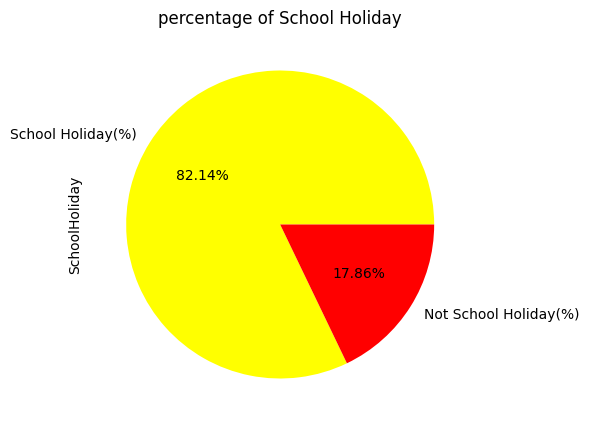

time: 174 ms (started: 2023-06-12 14:21:08 +00:00)


In [57]:
# Chart - 1 visualization code
df['SchoolHoliday'].value_counts().plot(kind='pie',
                              figsize=(10,5),
                               autopct="%1.2f%%",
                               startangle= 0,
                               shadow=False,
                               labels=['School Holiday(%)','Not School Holiday(%)'],
                               colors=['yellow','red'],
                               explode=[0,0],
                               title = 'percentage of School Holiday'
                              )


<Axes: title={'center': 'Percentage of Promoted stores'}, ylabel='Promo'>

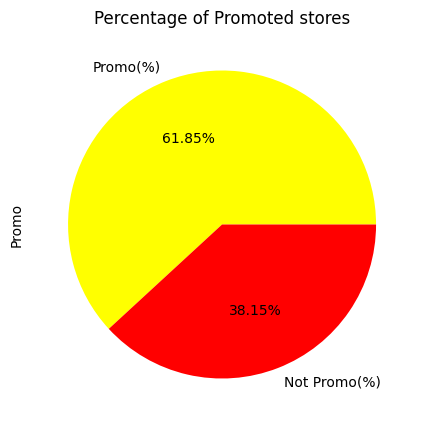

time: 172 ms (started: 2023-06-12 14:21:08 +00:00)


In [58]:
df['Promo'].value_counts().plot(kind='pie',
                              figsize=(10,5),
                               autopct="%1.2f%%",
                               startangle= 0,
                               shadow=False,
                               labels=['Promo(%)','Not Promo(%)'],
                               colors=['yellow','red'],
                               explode=[0,0],
                               title = 'Percentage of Promoted stores'
                              )

<Axes: title={'center': 'percentage of Store type'}, ylabel='StoreType'>

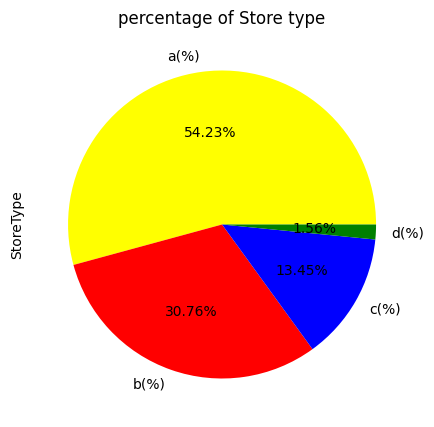

time: 240 ms (started: 2023-06-12 14:21:08 +00:00)


In [59]:
df['StoreType'].value_counts().plot(kind='pie',
                              figsize=(10,5),
                               autopct="%1.2f%%",
                               startangle= 0,
                               shadow=False,
                               labels=['a(%)','b(%)','c(%)','d(%)'],
                               colors=['yellow','red','blue','green'],
                               explode=[0,0,0,0],
                               title = 'percentage of Store type'
                              )

<Axes: title={'center': 'percentage of Assortment'}, ylabel='Assortment'>

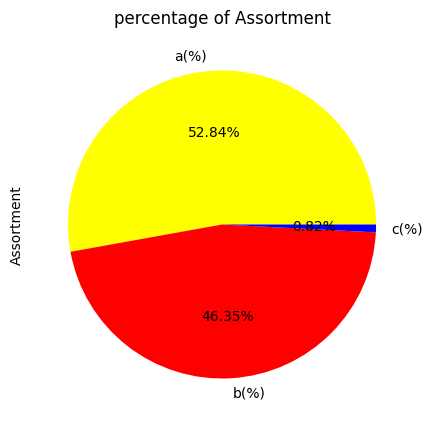

time: 402 ms (started: 2023-06-12 14:21:08 +00:00)


In [60]:
df['Assortment'].value_counts().plot(kind='pie',
                              figsize=(10,5),
                               autopct="%1.2f%%",
                               startangle= 0,
                               shadow=False,
                               labels=['a(%)','b(%)','c(%)'],
                               colors=['yellow','red','blue'],
                               explode=[0,0,0],
                               title = 'percentage of Assortment'
                              )

##### 1. Why did you pick the specific chart?

Using this chart, it's provide the information about the percentage of the different type of distribution among the dataset values.

##### 2. What is/are the insight(s) found from the chart?

On the above chart we have to found the:
* In schoolHoliday feature have 82.14% of the School Holiday and 17.86% of the not School Holiday.
* In Promo feature having 61.85% of the promoted store and 38.15% not promoted store present in the dataset.
* In StoreType feature distribution of a is 54.23%, b is 30.76%, c is 01.56%, and d is 13.45% in the dataset.
* In Assortment featur distribution of a is 54.84%, b is 46.35% and c is 0.82% in the dataset. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

According to the pie chart above, more stores receive promotions than do not, however sales are positively connected with promotions, implying that when a store receives a promotion, its sales go up. Therefore, businesses should endeavour to promote their stores in order to boost sales.

#### Chart - 2

Text(0.5, 1.0, 'Density distribution of Promo2SinceWeek')

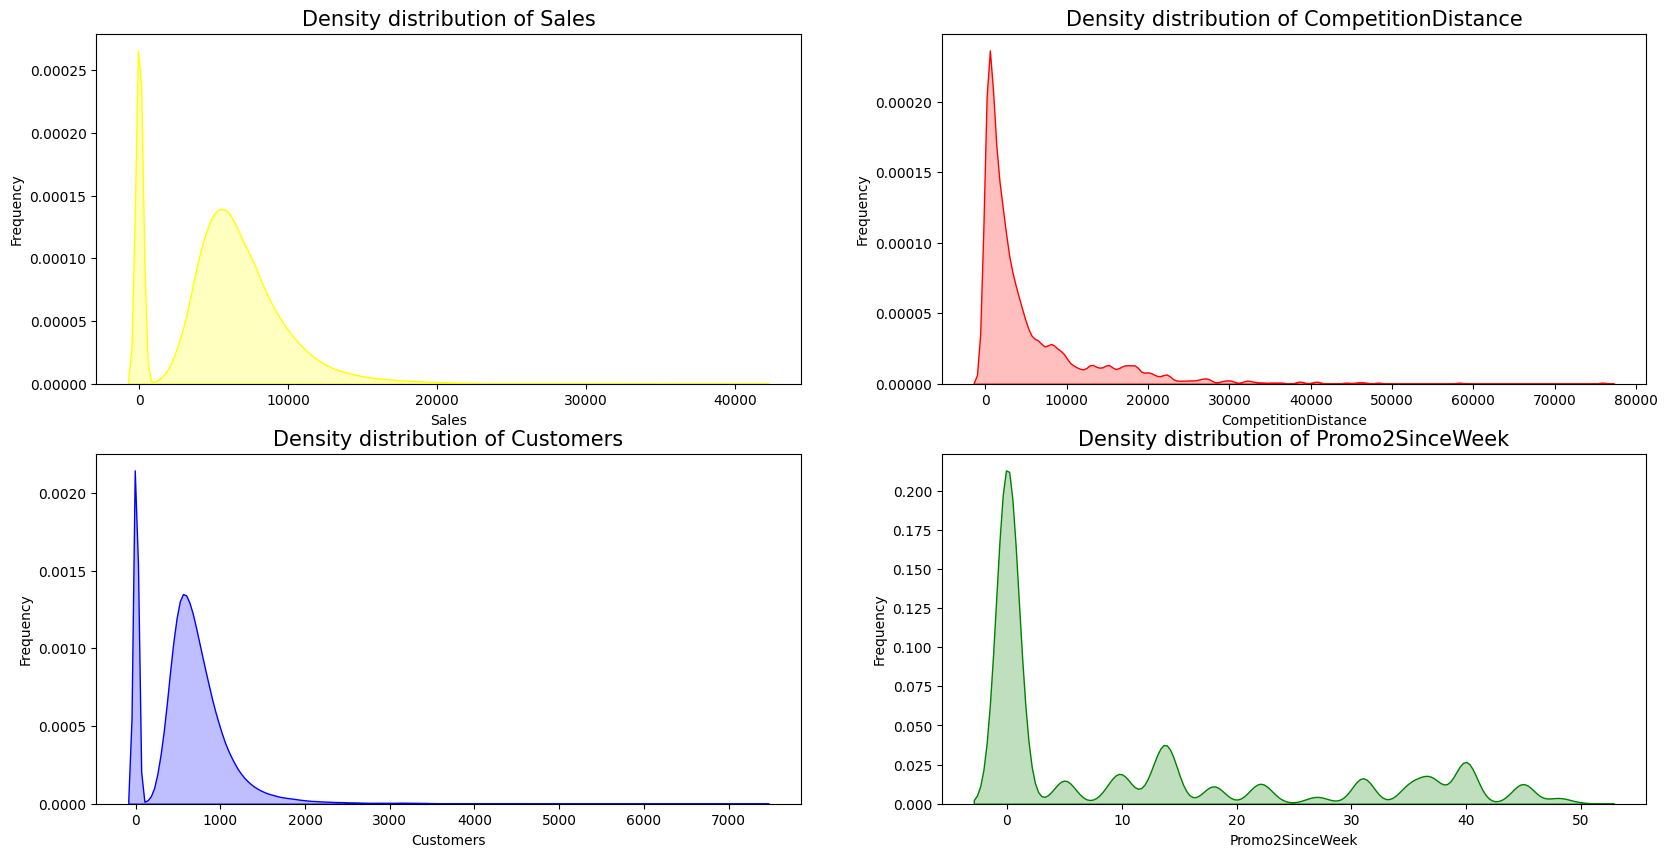

time: 22.5 s (started: 2023-06-12 14:21:09 +00:00)


In [61]:
# Chart - 2 visualization code
#Checking Frequency distribution for continous features:
plt.figure(figsize=(20,10))

#First plot(Sales vs Frequency)
plt.subplot(2,2,1)
plt.xlabel("Sales")
plt.ylabel("Frequency")
sns.kdeplot(df["Sales"], color="Yellow", shade = True)
plt.title('Density distribution of Sales',size = 15)

#Second plot(CompetitionDistance vs Frequency)
plt.subplot(2,2,2)
plt.xlabel("CompetitionDistance")
plt.ylabel("Frequency")
sns.kdeplot(df["CompetitionDistance"], color="Red", shade = True)
plt.title('Density distribution of CompetitionDistance',size = 15)

#Third plot(Customers vs Frequency)
plt.subplot(2,2,3)
plt.xlabel("Customers")
plt.ylabel("Frequency")
sns.kdeplot(df["Customers"], color="Blue", shade = True)
plt.title('Density distribution of Customers',size = 15)

# Fourth Plot(Promo2SinceWeek vs Frequency)
plt.subplot(2,2,4)
plt.xlabel('Promo2SinceWeek')
plt.ylabel('Frequency')
sns.kdeplot(df['Promo2SinceWeek'],color = 'Green', shade = True)
plt.title('Density distribution of Promo2SinceWeek',size = 15)


##### 1. Why did you pick the specific chart?

Using this chart, we have to found that whether the observation is high or low and whether they are concentated in one area or spread out the distribution.

##### 2. What is/are the insight(s) found from the chart?

1. Average value of the Sales is 1000 and graph is right skewed.
2. It is clearly show that the most of the store have their competition diststance with in the 5000 meters which indicates that mostly competition store near by each others and graph is right skewed.
3. Average value of the customers are 1000 move to stores and graph is right skewed.
4. It is clearly show that Promo2SinceWeek is distibuted over 50 weeks.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

With the help of the frequency distribution graph we generated for sales, customers, competition distance, and Promo2SinceWeek, we learned that many competing stores are situated close together. So, in order to survive in the cutthroat industry, companies needs design several methods.

#### Chart - 3

<function matplotlib.pyplot.show(close=None, block=None)>

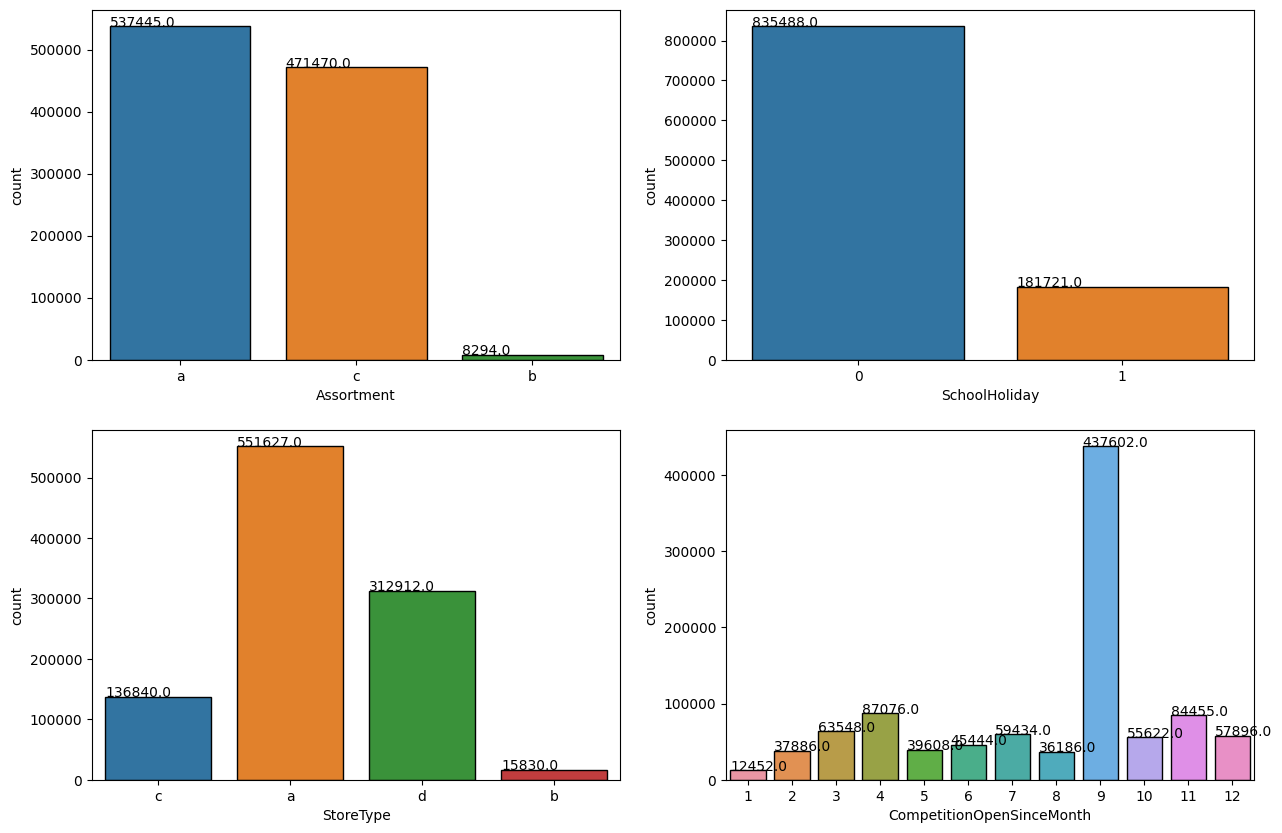

time: 2.09 s (started: 2023-06-12 14:21:31 +00:00)


In [62]:
# Chart - 3 visualization code
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
ax = sns.countplot(x = 'Assortment', data = df, edgecolor = 'black')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() , p.get_height()))
plt.subplot(2,2,2)
ax = sns.countplot(x = 'SchoolHoliday', data = df, edgecolor = 'black')
for p in ax.patches:
  ax.annotate(str(p.get_height()),(p.get_x(),p.get_height()))
plt.subplot(2,2,3)
ax = sns.countplot(x = 'StoreType', data = df, edgecolor = 'black')
for p in ax.patches:
  ax.annotate(str(p.get_height()),(p.get_x(),p.get_height()))
plt.subplot(2,2,4)
ax = sns.countplot(x = 'CompetitionOpenSinceMonth', data = df, edgecolor = 'black')
for p in ax.patches:
  ax.annotate(str(p.get_height()),(p.get_x(),p.get_height()))
plt.show

##### 1. Why did you pick the specific chart?

The above plot gave the information about the count distribution of the Assortment, SchoolHoliday, Storetype and CompetitionOpenSinceMonth.

##### 2. What is/are the insight(s) found from the chart?

In above plot gave the information about the count plot of following features of the dataset:
1. In **Assortment** feature, type **a** is most and type **c** is rare distributed in the count plot of that dataset.
2. In **SchoolHoliday** feature, type **0** is most and type **1** is few distributed in the count plot of that dataset.
3. In **StoreType** feature, type **a** is most distributed and type **b** is rare distributed in the count plot of that dataset.
4. In **CompetitionOpenSinceMonth** feature, month **9** is most common month and month **1** have less common month where customer move on store which gives the information on the above count plot of that dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Store types 'a', 'c', and 'd' can adopt the business plans and marketing techniques of store type 'b' because their sales are comparable to store type 'b' and lower.

#### Chart - 4

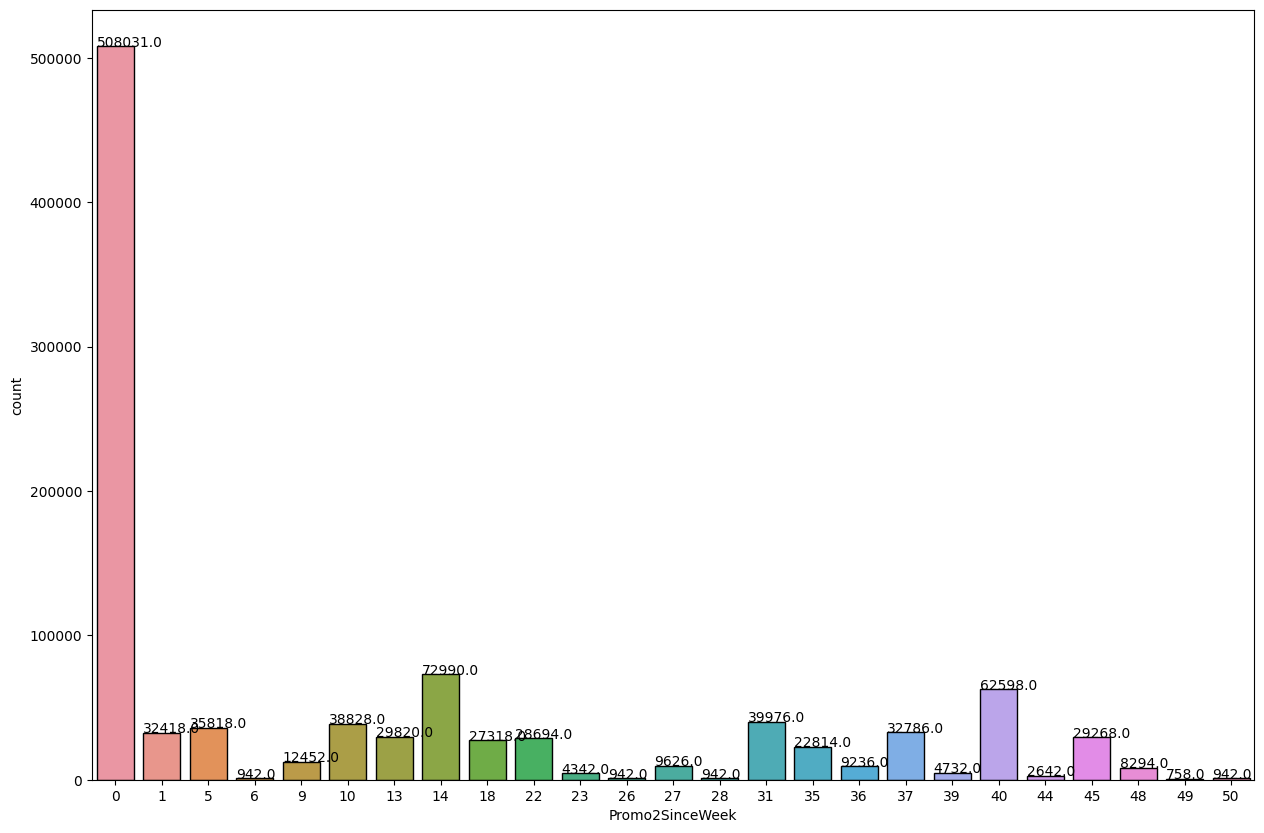

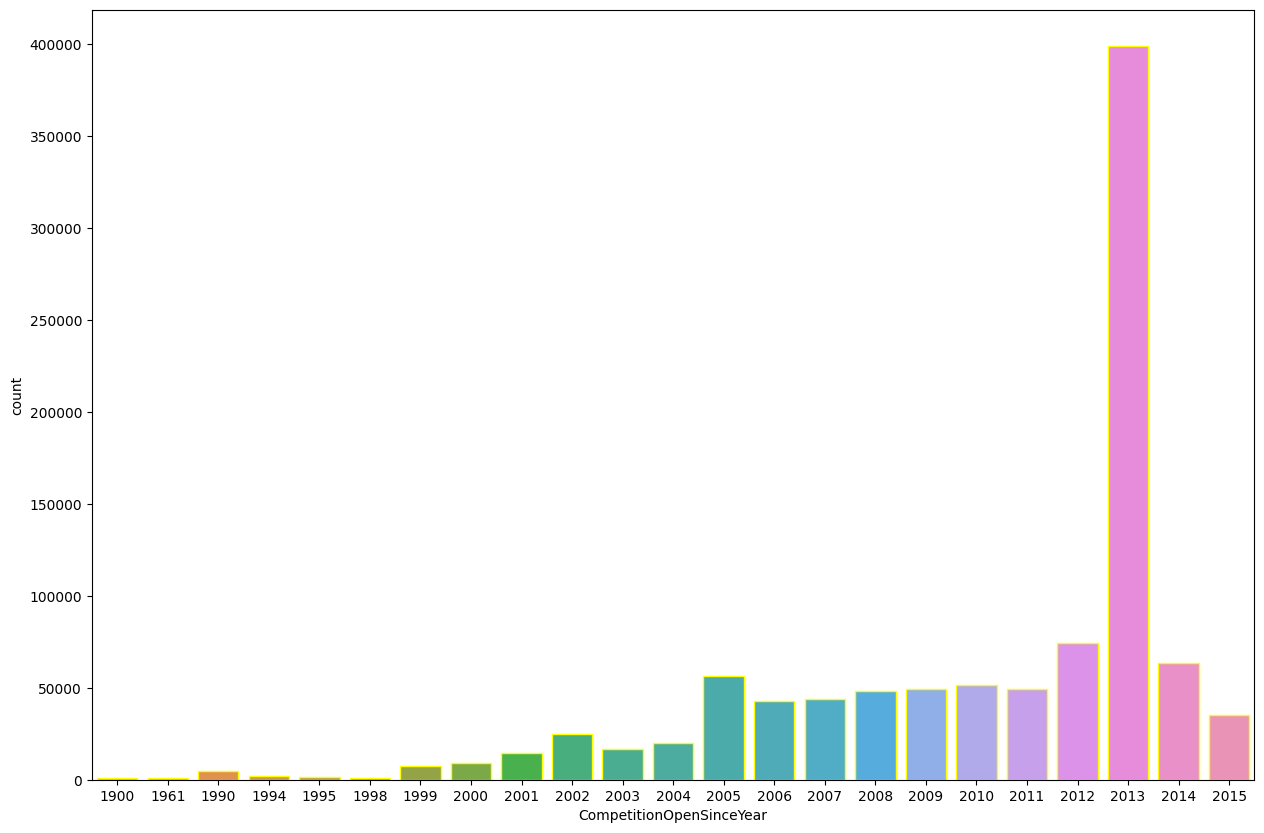

time: 1.27 s (started: 2023-06-12 14:21:33 +00:00)


In [63]:
# Chart - 4 visualization code
plt.figure(figsize = (15,10))
ax = sns.countplot(x = 'Promo2SinceWeek', data = df, edgecolor = 'black')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() , p.get_height()))

plt.figure(figsize = (15,10))
x = sns.countplot(x = 'CompetitionOpenSinceYear',data = df,edgecolor = 'yellow')
for i in x.patches:
  x.annotate(str(p.get_height()), (p.get_x() , p.get_height()))

##### 1. Why did you pick the specific chart?

In this plot it is clear show that the disrtbution of the Promo2SinceWeek and CompetitionOpenSinceYear features having mostly and rarely count on that dataset.

##### 2. What is/are the insight(s) found from the chart?

In the given chart, it's gives the information about the following features of the dataset:
* In the **Promo2SinceWeek**, 0 has the highest count in this countplot. 0 means that the stores are not taking part in promotion 2, while the remaining counts show how many stores there are and how long the retailers have been taking part.Customers may be less receptive to a second promotion since they may have already taken advantage of a similar promotion, which is one reason why retailers may not continue to participate in the promotion. Another possibility is that the retailer underinvested in informing customers about the deal, which led to lower awareness and decreased sales.
* In the **CompetitionOpenSinceYear** feature having maximum count in 2013 and minimum count in 1998. Which have gives the information about the year having count distribution where the more and less business in that dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From above graph we can infer that many stores are not continuing participating in the promo which indicates the promotions are not meeting the required targets. On the above chart gave the information about the distribution of the sales on yearly wise. 

### Bivariate Analysis

#### Chart - 1

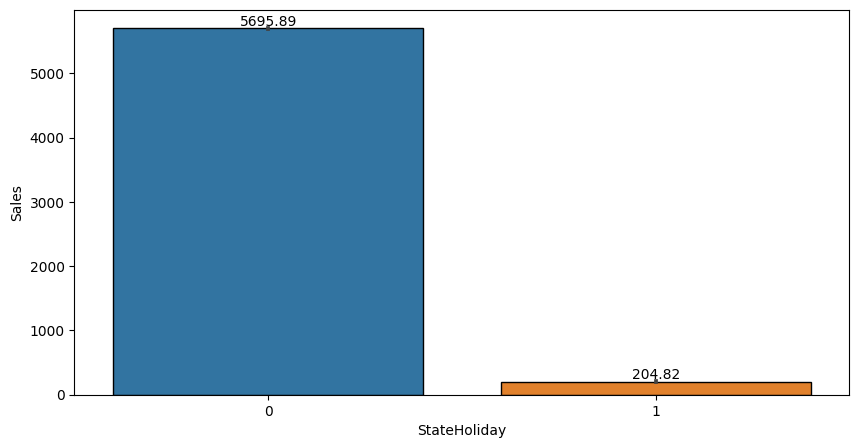

time: 16 s (started: 2023-06-12 18:43:48 +00:00)


In [174]:
# Chart - 1 visualization code
plt.figure(figsize=(10,5))
chart1 = sns.barplot(x = df['StateHoliday'],y = df['Sales'],edgecolor = 'black')
for p in chart1.patches:
    chart1.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2,
                    p.get_height()), ha = 'center',va = 'center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

This chart gives the information about the relation between sales and state holiday.We used bar plots because they are a useful tool for visualizing and understanding categorical data, and can be an effective way to communicate information to the wide audience.

##### 2. What is/are the insight(s) found from the chart?

Type 0 witness the highest sale indicating and type c witness the lowest sale indicating in the chart from that given dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

According to that information have only type 0 is witness for good sale, but remaing not good porfonmance according to our business goal. So, provide some exciting offer to attract more customers to achive our business goal.

#### Chart - 2

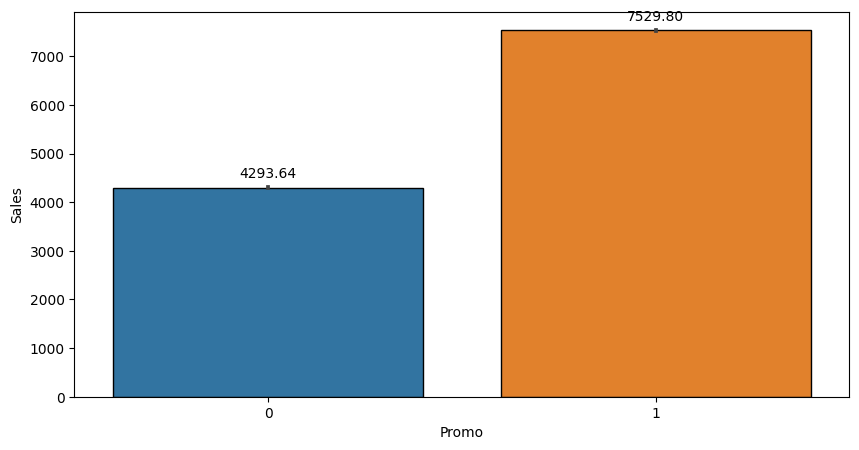

time: 11.2 s (started: 2023-06-12 18:44:04 +00:00)


In [175]:
# Chart - 2 visualization code
plt.figure(figsize=(10,5))
chart2 = sns.barplot(x= df['Promo'],y=df['Sales'],edgecolor='black')
for p in chart2.patches:
  chart2.annotate(format(p.get_height(),'.2f'),
                  (p.get_x() + p.get_width()/2,
                   p.get_height()),
                  ha = 'center',va = 'center',
                  size = 10, xytext = (0, 10),
                  textcoords='offset points')

##### 1. Why did you pick the specific chart?

This chart gives the information about the relation between sales and Promo.We used bar plots because they are a useful tool for visualizing and understanding categorical data, and can be an effective way to communicate information to the wide audience.

##### 2. What is/are the insight(s) found from the chart?

Type 1 witness the highest sale indicating and type 0 witness the lowest sale indicating in the chart from that given dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

According to that information have only type 1 is witness for good sale, but type 0 improves the porfonmance according to our business goal. So, provide some exciting offer on type 0 to attract more customers to achive our business goal.

#### Chart - 3

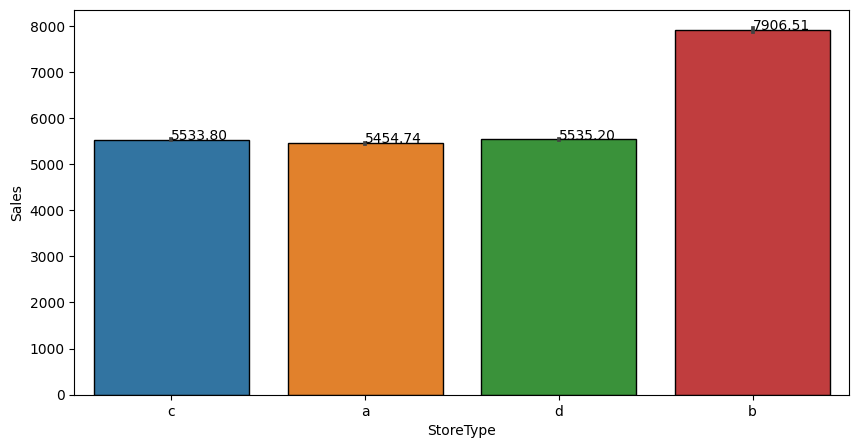

time: 12 s (started: 2023-06-12 18:44:15 +00:00)


In [176]:
# Chart - 3 visualization code
plt.figure(figsize=(10,5))
chart3 = sns.barplot(x=df['StoreType'],y=df['Sales'],edgecolor='black')
for p in chart3.patches:
    chart3.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2,
                    p.get_height()))

##### 1. Why did you pick the specific chart?

This chart gives the information about the relation between sales and Storetype.We used bar plots because they are a useful tool for visualizing and understanding categorical data, and can be an effective way to communicate information to the wide audience.

##### 2. What is/are the insight(s) found from the chart?

Type b witness the highest sale indicating and type d witness the lowest sale indicating in the chart from that given dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

According to that information have only type b is witness for good sale, but remaing also improves the porfonmance according to our business goal. So, provide some exciting offer to attract more customers to achive our business goal.

#### Chart - 4

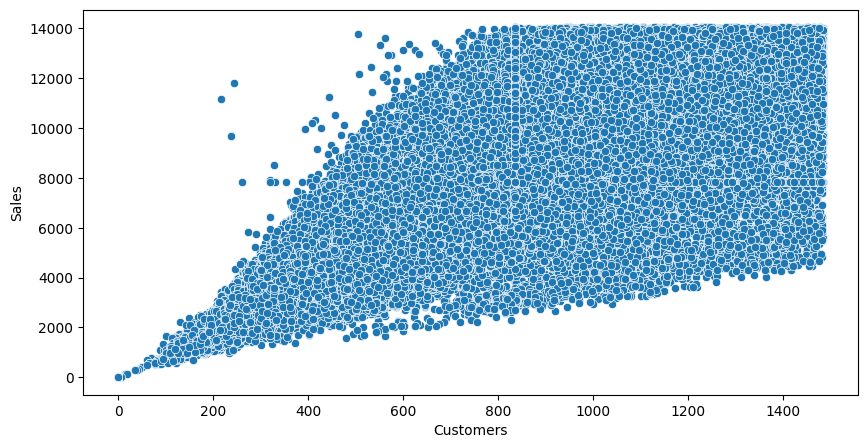

time: 1.85 s (started: 2023-06-12 18:44:27 +00:00)


In [177]:
# Chart - 4 visualization code
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Customers', y = 'Sales', data = df)
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots gives the information about relationship or trends between two variables & also usefull to identify the outliers in the dataset. On the above plots provides the infrmation about the relationship between the number of customers visiting the store and the total sales.

##### 2. What is/are the insight(s) found from the chart?

The above scatter plots show the positive correlation between sales and customers. According to plots shows the linear relationship between sales and customers and when increase the numer of visiting customers on the store then the total sales of the store increses.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Customers and sales are directly propertional to each other, When increase the number of visiting customers increase the total sales of the store. Now provide the exciting offer and promote their strategies using market campaigns to attract the more customers to increase our total sales to achieve the business goals. 

#### Chart - 5

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

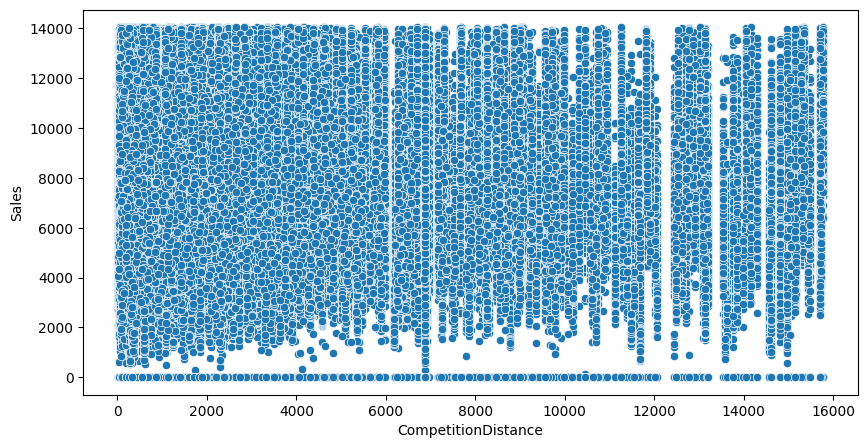

time: 3.97 s (started: 2023-06-12 18:44:29 +00:00)


In [178]:
# Chart - 5 visualization code
plt.figure(figsize=(10,5))
sns.scatterplot(x='CompetitionDistance',y='Sales',data=df)

##### 1. Why did you pick the specific chart?

Scatter plots gives the information about relationship or trends between two variables & also usefull to identify the outliers in the dataset. In the above plots most of the sales lies in the range of the 30000 meters.

##### 2. What is/are the insight(s) found from the chart?

The above scatter plots provides the information about sales and competition distance. Most of the sales lies in the range of the 30000 meters and least of the sales lies on the outside of 40000 meters. So, we can easily identify the outliers which have to present in the outside of the 50000 meters.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 Acoording to above plots we can easily identify the outliers, so provide the exciting offer and promote their strategies using market campaigns to attract the more customers to increase our total sales to achieve the business goals. 

#### Chart - 6

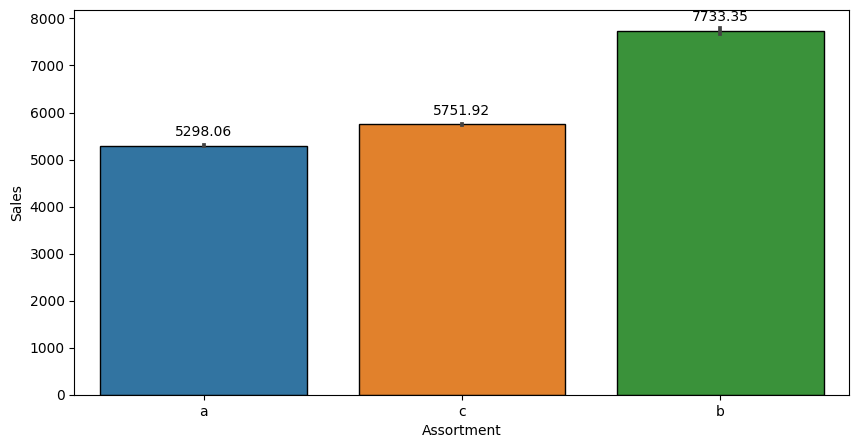

time: 12.1 s (started: 2023-06-12 18:44:33 +00:00)


In [179]:
# Chart - 6 visualization code
plt.figure(figsize=(10,5))
plots = sns.barplot(x= df['Assortment'],y=df['Sales'],edgecolor='black')
for p in plots.patches:
  plots.annotate(format(p.get_height(),'.2f'),
                 (p.get_x() + p.get_width()/2,p.get_height()),
                  ha='center', va='center',
                   size=10, xytext=(0, 10),
                   textcoords='offset points')

##### 1. Why did you pick the specific chart?

This chart gives the information about the relation between sale and assortment.We used bar plots because they are a useful tool for visualizing and understanding categorical data, and can be an effective way to communicate information to the wide audience.

##### 2. What is/are the insight(s) found from the chart?

Type b witness the highest sale indicating while type a witness the lowest sale indicating in the chart from that given dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

According to that information have only type b is witness for good sale, but also remaining type of the assortment improves the porfonmance according to our business goal. So, provide some exciting offer on remaining type of assortment to attract more customers to achive our business goal.

#### Chart - 7

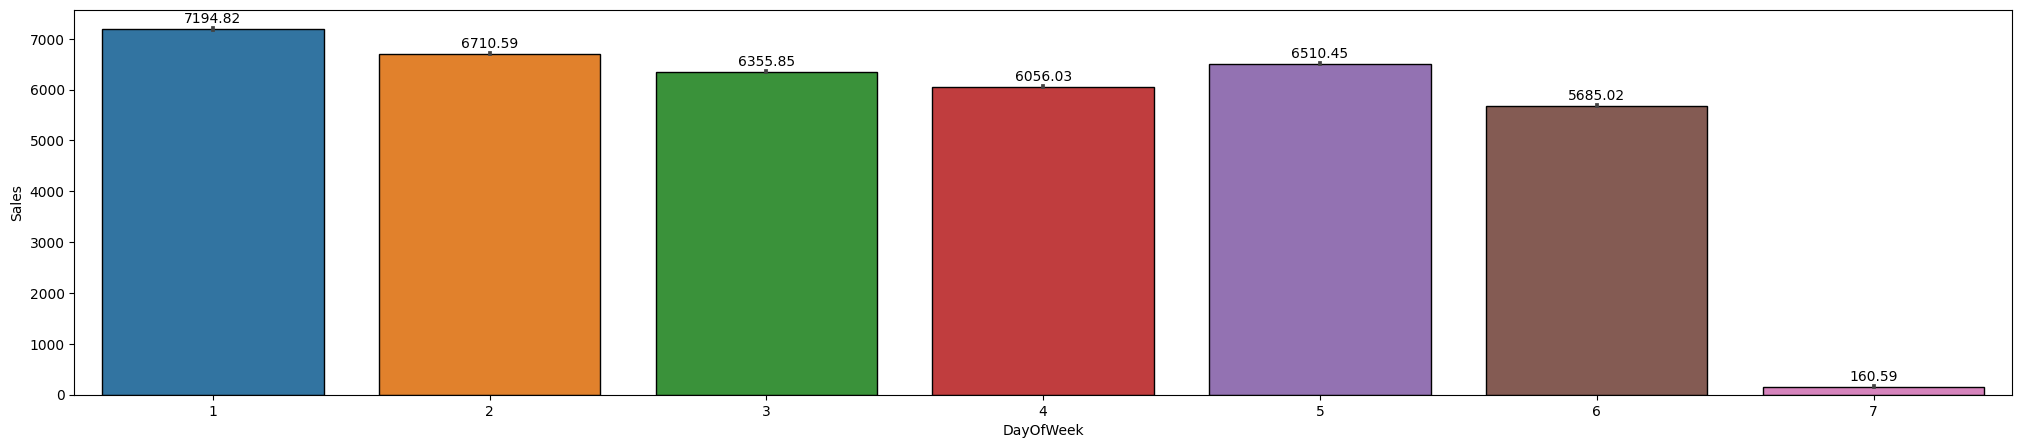

time: 9.91 s (started: 2023-06-12 18:44:45 +00:00)


In [180]:
# Chart - 7 visualization code
plt.figure(figsize=(25,5))
plots = sns.barplot(x= df['DayOfWeek'],y= df['Sales'],edgecolor= 'black')
for p in plots.patches:
  plots.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2,
                    p.get_height()),ha = 'center', va = 'center',
                  size = 10, xytext = (0,7),
                  textcoords= 'offset points')

##### 1. Why did you pick the specific chart?

This chart gives the information about the relation between sales and DayOfWeek. We used bar plots because they are a useful tool for visualizing and understanding categorical data, and can be an effective way to communicate information to the wider audience.

##### 2. What is/are the insight(s) found from the chart?

On the above chart provides the information about the total sales and DayOfWeek, which have most sales on day 1 and minimum sale on day 7.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

According to that information have only is witness for good sale for day1, but it's decreasing after every day of DayOfWeek,so we improves the porfonmance according to our business goal. So, provide some exciting offer on remaining type of assortment to attract more customers to achive our business goal.Owners need to improve their stockings and advertising approaches because usually every day after that reports a sharp decline or increase in sales. It is possible to investigate the fundamental cause of this abrupt change in more detail and come up with a workable remedy.

#### Chart - 8

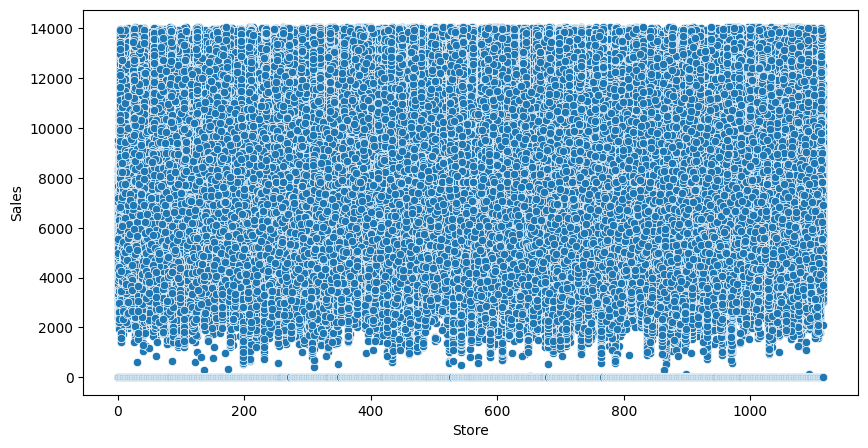

time: 2.35 s (started: 2023-06-12 18:44:55 +00:00)


In [181]:
# Chart - 8 visualization code
plt.figure(figsize= (10,5))
sns.scatterplot(x = 'Store',y= 'Sales', data = df)
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots gives the information about relationship or trends between two variables & also usefull to identify the outliers in the dataset. In the above plots most of the sales lies in the wider range.

##### 2. What is/are the insight(s) found from the chart?

The above scatter plots provides the information about sales and store. Most of the sales lies in the range of the total store. So, we can easily identify the outliers which have to present in the outside of the sale.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 Acoording to above plots we can easily identify the outliers, so provide the exciting offer and promote their strategies using market campaigns to attract the more customers to increase our total sales to achieve the business goals. 

#### Chart - 9

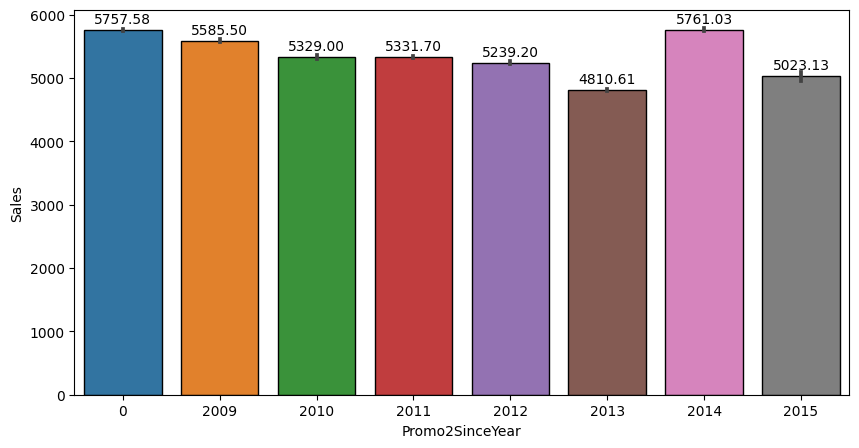

time: 10.6 s (started: 2023-06-12 18:44:57 +00:00)


In [182]:
# Chart - 9 visualization code
plt.figure(figsize= (10,5))
plots = sns.barplot(x = df['Promo2SinceYear'],y = df['Sales'], edgecolor = 'black')
for p in plots.patches:
  plots.annotate(format(p.get_height(),'0.2f'),
                 (p.get_x()  + p.get_width()/2,
                  p.get_height()),ha = 'center',va = 'center',
                size = 10, xytext = (0,8),
                textcoords= 'offset points')

##### 1. Why did you pick the specific chart?

This chart gives the information about the relation between sale and Promo2SinceYear. We used bar plots because they are a useful tool for visualizing and understanding categorical data, and can be an effective way to communicate information to the wider audience.

##### 2. What is/are the insight(s) found from the chart?

This bar graphs shows that even when the store wasn't holding consecutive promotional events, sales were still at their best levels. However, sales really took up in 2014 and are now ranked second highest. The factors could include high-quality goods, better offers, the end of contests, etc.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These results are certainly helpful because they highlight one of the most important features of subsequent promotions. It is obvious that such promos are insufficient to turn clients into buyers. The retailer must develop more creative and rewarding options.

#### Chart - 10

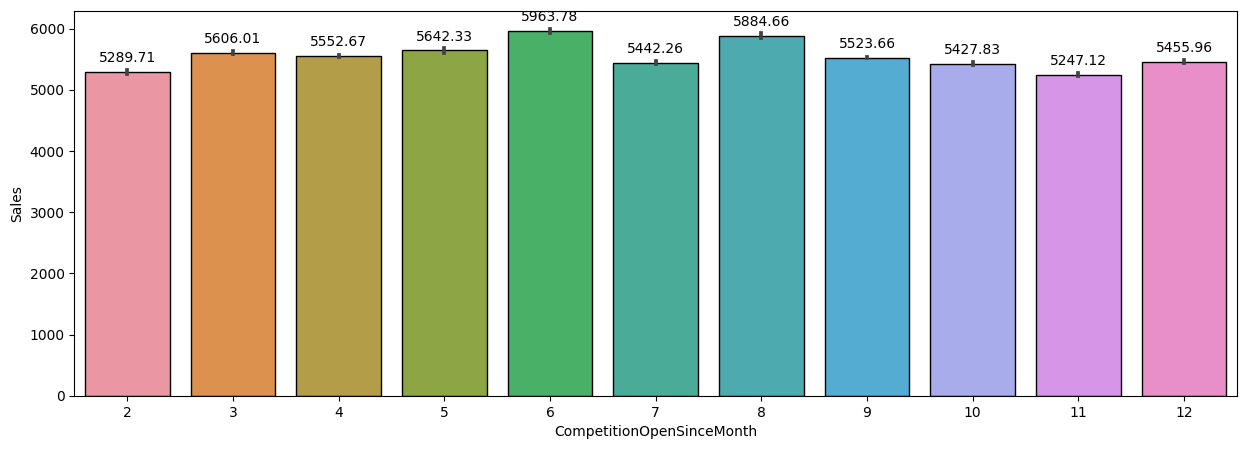

time: 10.6 s (started: 2023-06-12 18:45:08 +00:00)


In [183]:
# # Chart - 10 visualization code
plt.figure(figsize=(15,5))
plots = sns.barplot(x = df['CompetitionOpenSinceMonth'],y = df['Sales'],edgecolor = 'black')
for p in plots.patches:
  plots.annotate(format(p.get_height(),'.2f'),
                        (p.get_x() + p.get_width()/2,
                         p.get_height()),ha = 'center',va='center',
                        size = 10, xytext= (0,10),
                        textcoords = 'offset points')

##### 1. Why did you pick the specific chart?

This chart gives the information about the relation between sale and CompetitionOpenSinceMonth. We used bar plots because they are a useful tool for visualizing and understanding categorical data, and can be an effective way to communicate information to the wider audience.

##### 2. What is/are the insight(s) found from the chart?

According to that information have only is witness for maximum sale in month of 6 and minimum sale in the month of 2, but the competitionOpenSinceMonth almost total sales of the month is constant.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

According to that information have only is witness for good sale, but the competitionOpenSinceMonth almost total sales of the month is constant, So we improves the porfonmance according to our business goal. So, provide some exciting offer on remaining type of assortment to attract more customers to achive our business goal

#### Chart - 11

In [184]:
from datetime import date as dt
df['Year'] = df['Date'].dt.year

time: 29.3 ms (started: 2023-06-12 18:45:18 +00:00)


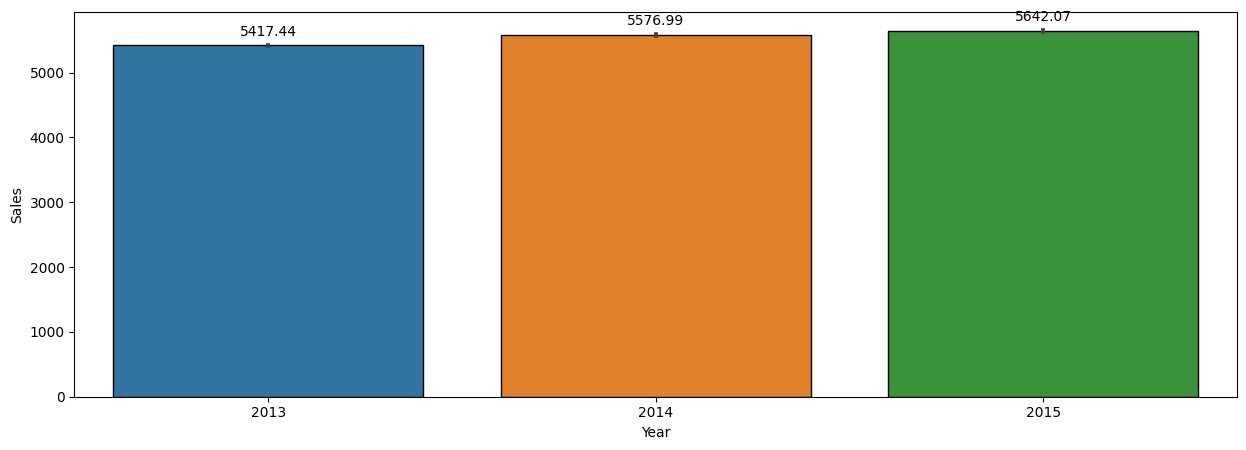

time: 11.1 s (started: 2023-06-12 18:45:18 +00:00)


In [185]:
# # Chart - 11 visualization code
plt.figure(figsize= (15,5))
plots = sns.barplot(x= df['Year'],y= df['Sales'],edgecolor= 'black')
for p in plots.patches:
  plots.annotate(format(p.get_height(),'.2f'),
                 (p.get_x()+p.get_width()/2,
                  p.get_height()),ha= 'center',va= 'center',
                 size= 10,xytext = (0,10),
                 textcoords= 'offset points')

##### 1. Why did you pick the specific chart?

This chart gives the information about the relation between sale and Year. We used bar plots because they are a useful tool for visualizing and understanding categorical data, and can be an effective way to communicate information to the wider audience.

##### 2. What is/are the insight(s) found from the chart?

According to that information have only is witness for maximum sale in year of 2015 and minimum sale in the year of 2013, but the almost total sales of the each year is constant.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. For the owners, the insights from this graph are truly quite crucial. They need to target additional clients and make some adjustments to the way they operate because the growth is not occurring at a noteworthy rate.

#### Chart - 12

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

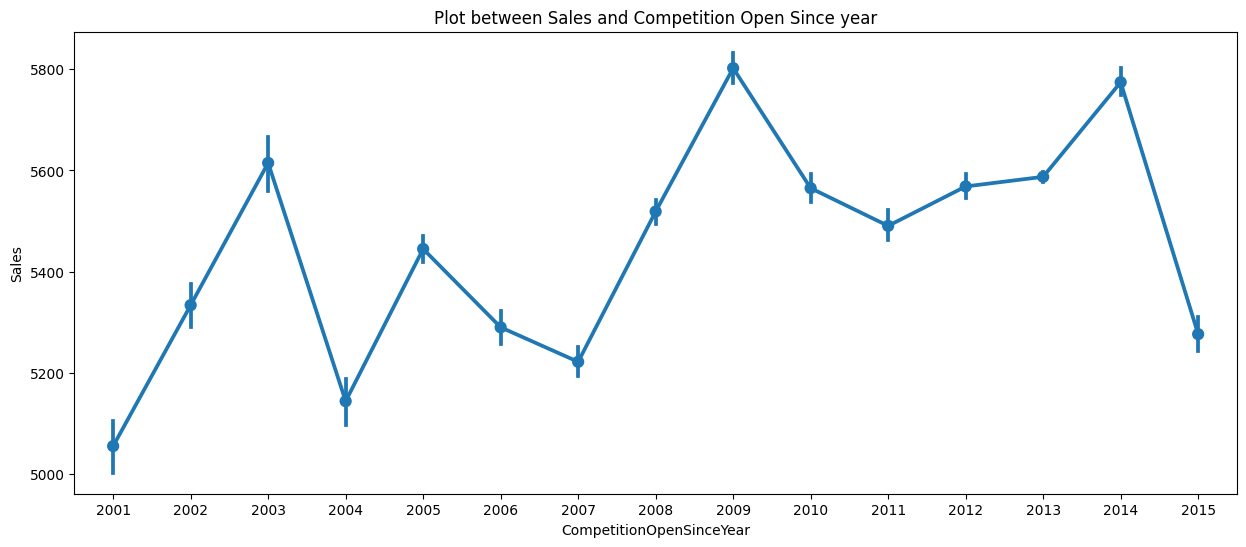

time: 10.6 s (started: 2023-06-12 18:45:29 +00:00)


In [186]:
# # Chart - 12 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=df)
plt.title('Plot between Sales and Competition Open Since year')

##### 1. Why did you pick the specific chart?

to be aware of the yearly average sales figures ever since a rival opened up shop nearby.

##### 2. What is/are the insight(s) found from the chart?

We may infer from the plot that Rossmann operated a small number of stores, which meant that there was little rivalry and that sales were strong in 1900. However, as time goes on, the number of stores grows, increasing competition, which in turn causes a drop in sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Owners need to improve their stockings and marketing strategies because usually every year after that reports a sharp decline or increase in sales. It is possible to investigate the fundamental cause of this abrupt change in more detail and come up with a suitable solution.

### Multivariate Analysis

#### Chart - 1 - Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap for Retail Sales Pridiction')

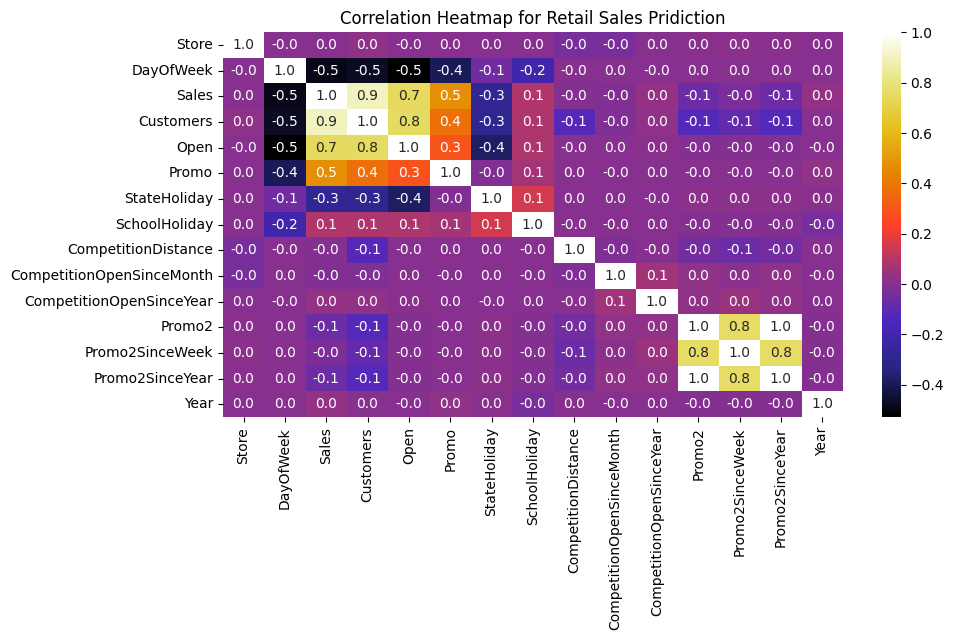

time: 1.59 s (started: 2023-06-12 18:45:40 +00:00)


In [187]:
# Correlation Heatmap visualization code
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df.corr(),annot = True,fmt='0.1f',annot_kws={'size':10},vmax =1,cmap= plt.cm.CMRmap)
plt.title('Correlation Heatmap for Retail Sales Pridiction')

##### 1. Why did you pick the specific chart?

It can give multiple visual aids in a single frame and various insights related to the data can be gained in one single look.

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

We can infer that some features like Cutomers, promo and SchoolHoliday are positively correlated with Sales. While others like DayofWeek, CompetitionDistance and promo2 are negatively correlated with Sales.Even we can state the correlation within any two independent features with the help of this chart(heatmap)

#### Chart - 2 - Pair Plot 

In [188]:
c = ['Open','Promo','StateHoliday','StoreType','Assortment','Promo2','Promo2SinceWeek','Sales']

time: 366 µs (started: 2023-06-12 18:45:42 +00:00)


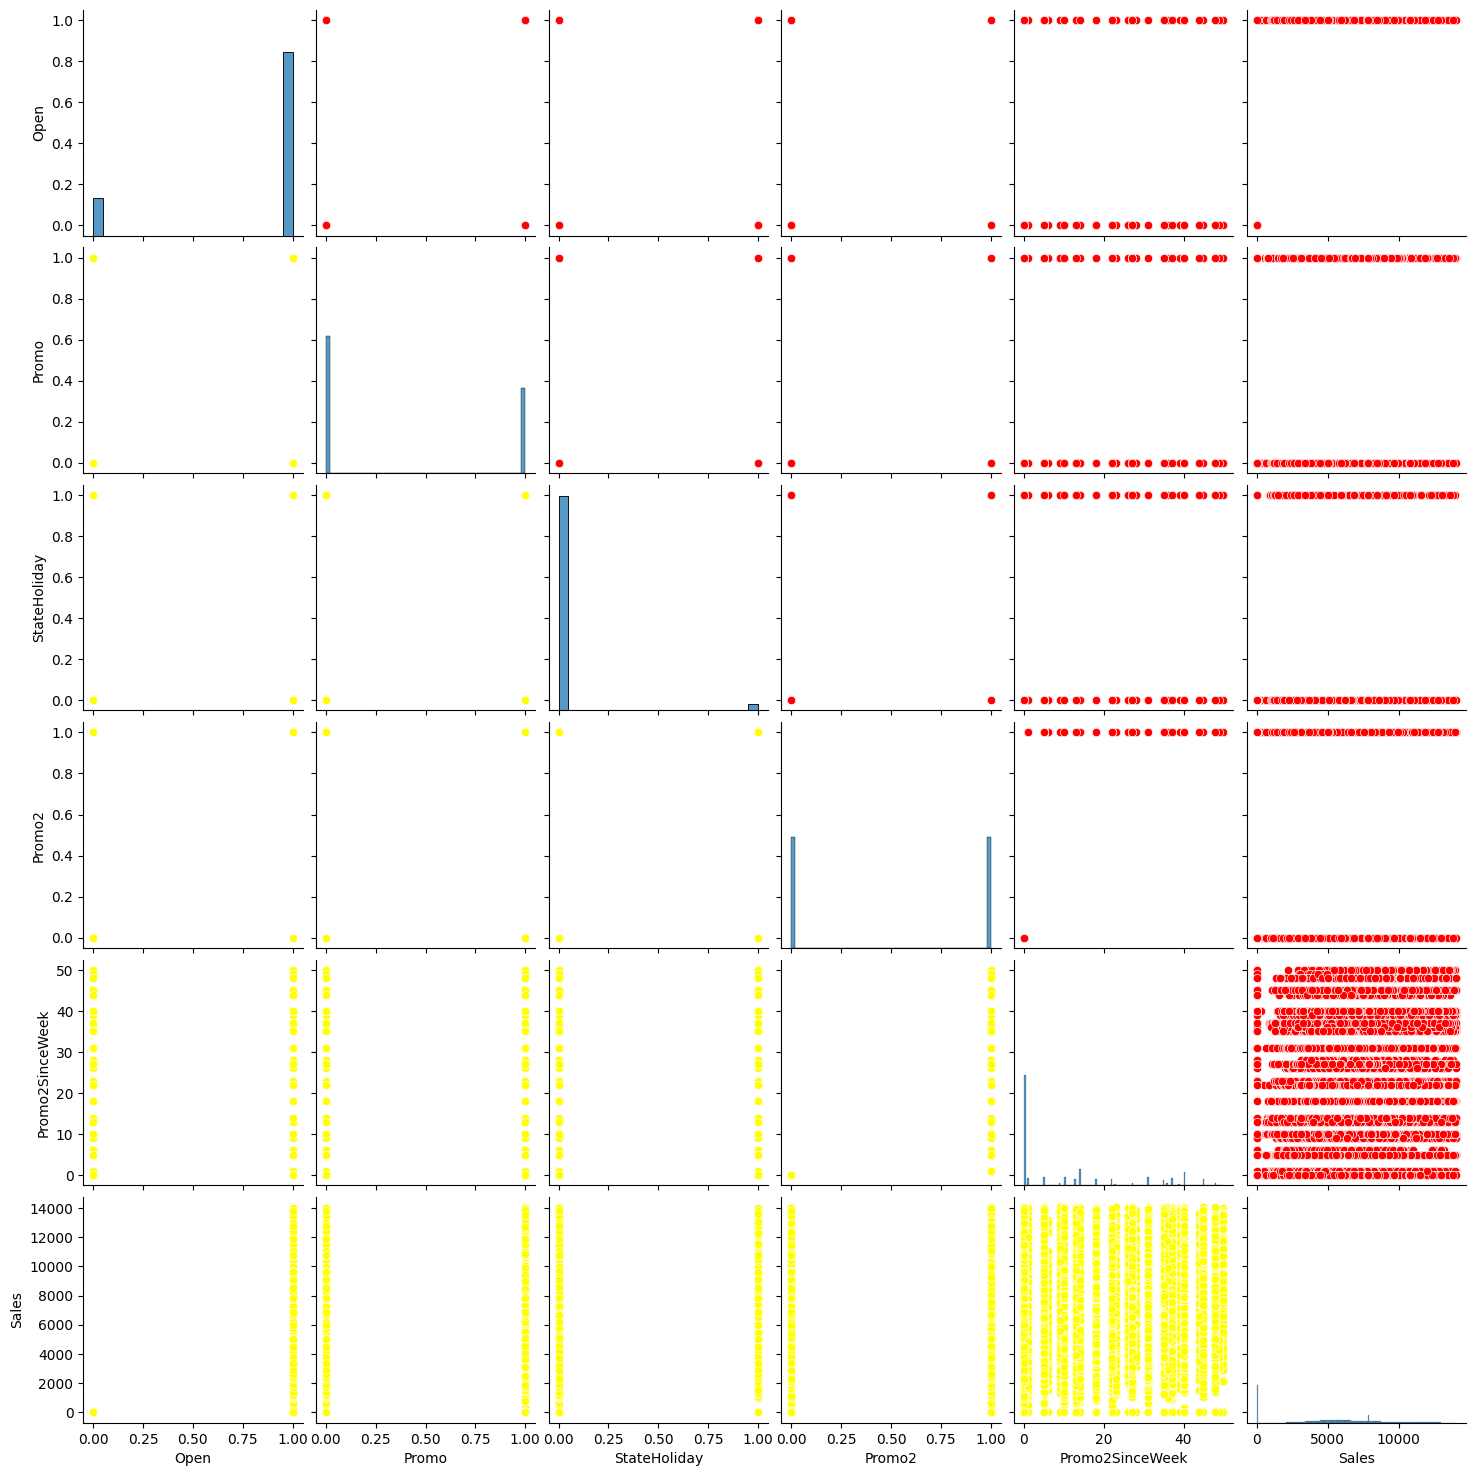

time: 3min 8s (started: 2023-06-12 18:45:42 +00:00)


In [189]:
# Pair Plot visualization code
df1 = df[c]
plots = sns.pairplot(df1)
plots.map_upper(sns.scatterplot,color= 'red')
plots.map_lower(sns.scatterplot, color= 'yellow')

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know, there are less linear relationship between variables and data poiunts aren't linearly separable.  In this whole pair plot, the importance of area code can be seen and the number of hotel with respect to different features are really insightful.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value

time: 270 µs (started: 2023-06-12 17:06:56 +00:00)


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

time: 625 µs (started: 2023-06-12 17:06:56 +00:00)


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value

time: 228 µs (started: 2023-06-12 17:06:56 +00:00)


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [45]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

time: 419 ms (started: 2023-06-12 17:06:56 +00:00)


#### What all missing value imputation techniques have you used and why did you use those techniques?

As we have already treated null values so we do not have any more missing/null/duplicate values in our dataset and our dataset is good to go.

### 2. Handling Outliers

#### Univiarte Outliers treatment

In [46]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

* Here 3 types of the data present in the dataset, so we can devided into data into three category:
1. Numeric data
2. Contineous columns dataset
3. Categrecal columns dataset

In [47]:
# assigning continous variable features in new variables so that it makes sense while visulatizing through box plots
continous_features= ["DayOfWeek", "Sales", "Customers", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear"]
numeric_features= ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear']
categorical_features= ["Date", "StoreType", "Assortment", "PromoInterval"]
print("Numeric_features: ",numeric_features)
print("Categorical_features: ",categorical_features)
print("Continous_features: ",continous_features)

Numeric_features:  ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']
Categorical_features:  ['Date', 'StoreType', 'Assortment', 'PromoInterval']
Continous_features:  ['DayOfWeek', 'Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']
time: 769 µs (started: 2023-06-12 17:06:57 +00:00)


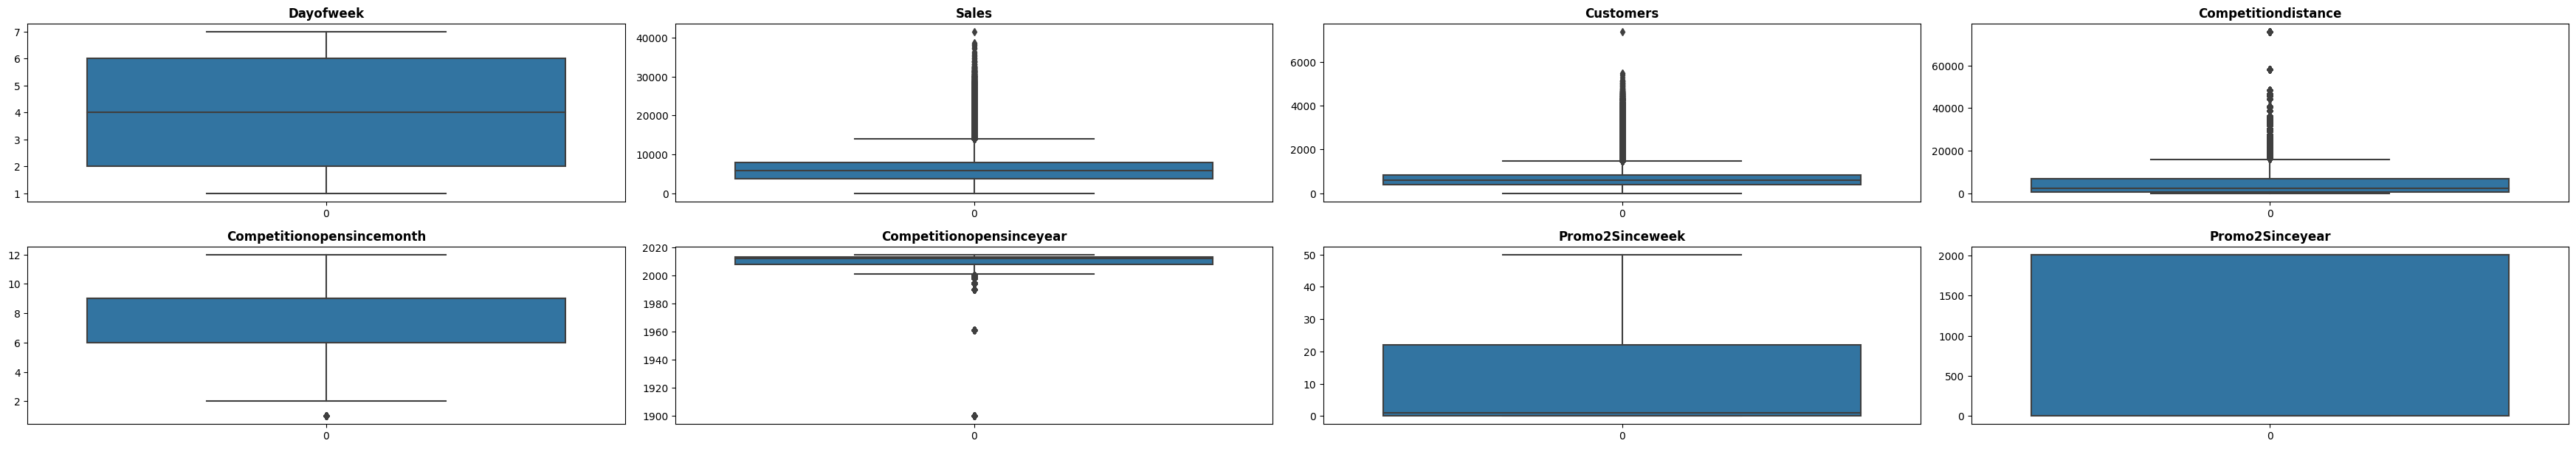

time: 2.59 s (started: 2023-06-12 17:06:57 +00:00)


In [48]:
# Check outliers by using boxplot Outliers of continous features
plt.figure(figsize= (35,15))
for index,column in enumerate(continous_features):
  plt.subplot(5,4,index+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight= 'bold')
  plt.tight_layout()

From the above box plot it is clearly shiw that the following feature Sales,Customers, CompetitionDistance, CompetitionSinceMonth, CompetitionSinceYear contain some outliers as they are contenuous in nature.

In [49]:
# Handling Outliers & Outlier treatments
def detect_outlier(data):
  data = sorted(data)
  q1 = np.percentile(data,25)
  q2 = np.percentile(data,50)
  q3 = np.percentile(data,75)
  print(f'q1:{q1},\n,q2:{q2},\n,q3:{q3}')
  #  iqr = Inter quartile range
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  print(f'Lower Bound:{lower_bound},\n,Upper Bound:{upper_bound},\n,Inter Quartile Range(IQR):{iqr}')
  outliers = [i for i in data if i < lower_bound or i > upper_bound]
  length_of_outliers = len(outliers)
  print('Length of outliers:',length_of_outliers)
  percentage_of_outliers = length_of_outliers*100/len(data)
  print('Percentage of outliers:',round(percentage_of_outliers,2))

time: 951 µs (started: 2023-06-12 17:07:00 +00:00)


In [50]:
# Calculation of inter quartile range, lower bound, upper bound, length of outliers and percentage of outliers of the contineous features dataset
for features in continous_features:
  print(features)
  detect_outlier(df[features])
  print('\n')

DayOfWeek
q1:2.0,
,q2:4.0,
,q3:6.0
Lower Bound:-4.0,
,Upper Bound:12.0,
,Inter Quartile Range(IQR):4.0
Length of outliers: 0
Percentage of outliers: 0.0


Sales
q1:3727.0,
,q2:5744.0,
,q3:7856.0
Lower Bound:-2466.5,
,Upper Bound:14049.5,
,Inter Quartile Range(IQR):4129.0
Length of outliers: 26694
Percentage of outliers: 2.62


Customers
q1:405.0,
,q2:609.0,
,q3:837.0
Lower Bound:-243.0,
,Upper Bound:1485.0,
,Inter Quartile Range(IQR):432.0
Length of outliers: 38095
Percentage of outliers: 3.75


CompetitionDistance
q1:710.0,
,q2:2325.0,
,q3:6880.0
Lower Bound:-8545.0,
,Upper Bound:16135.0,
,Inter Quartile Range(IQR):6170.0
Length of outliers: 99160
Percentage of outliers: 9.75


CompetitionOpenSinceMonth
q1:6.0,
,q2:9.0,
,q3:9.0
Lower Bound:1.5,
,Upper Bound:13.5,
,Inter Quartile Range(IQR):3.0
Length of outliers: 12452
Percentage of outliers: 1.22


CompetitionOpenSinceYear
q1:2008.0,
,q2:2012.0,
,q3:2013.0
Lower Bound:2000.5,
,Upper Bound:2020.5,
,Inter Quartile Range(IQR):5.0
Length

On the above code, we have to found that percentace of outliers on the following features: \
* Percentage of outliers present in the **Sales** feature : 2.62%
* Percentage of outliers present in the **Customer** feature : 3.75%
* Percentage of outliers present in the **CompetitionDistance** feature : 9.75%
* Percentage of outliers present in the **CompetitionSinceMonth** feature: 1.22%
* Percentage of outliers present in the **CompetitionSinceYear** feature : 2.71%

Now we have to define the function who is responsible to treatment of the outliers:

In [51]:
# Define the treatment of the outliers
def outliers_iqr_treatment(data):
  # Calculation of first and third quartile
  q1 = np.percentile(data,25)
  q3 = np.percentile(data,75)
  # Defining the interquartile range(IQR)
  iqr = q3 - q1
  # Identify the outliers
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = [i for i in data if i < lower_bound or i > upper_bound]
  # Treatment of the Outliers
  treated_data = [q1 if i < lower_bound else q3 if i > upper_bound else i for i in data]
  treated_data_int = [int(i) for i in treated_data]
  return treated_data_int

time: 717 µs (started: 2023-06-12 17:07:11 +00:00)


In [52]:
#Passing all the feature one by one from the list of continous_value_feature in our above defined function for outlier treatment
for feature in continous_features:
  df[feature]= outliers_iqr_treatment(df[feature])

time: 30.2 s (started: 2023-06-12 17:07:11 +00:00)


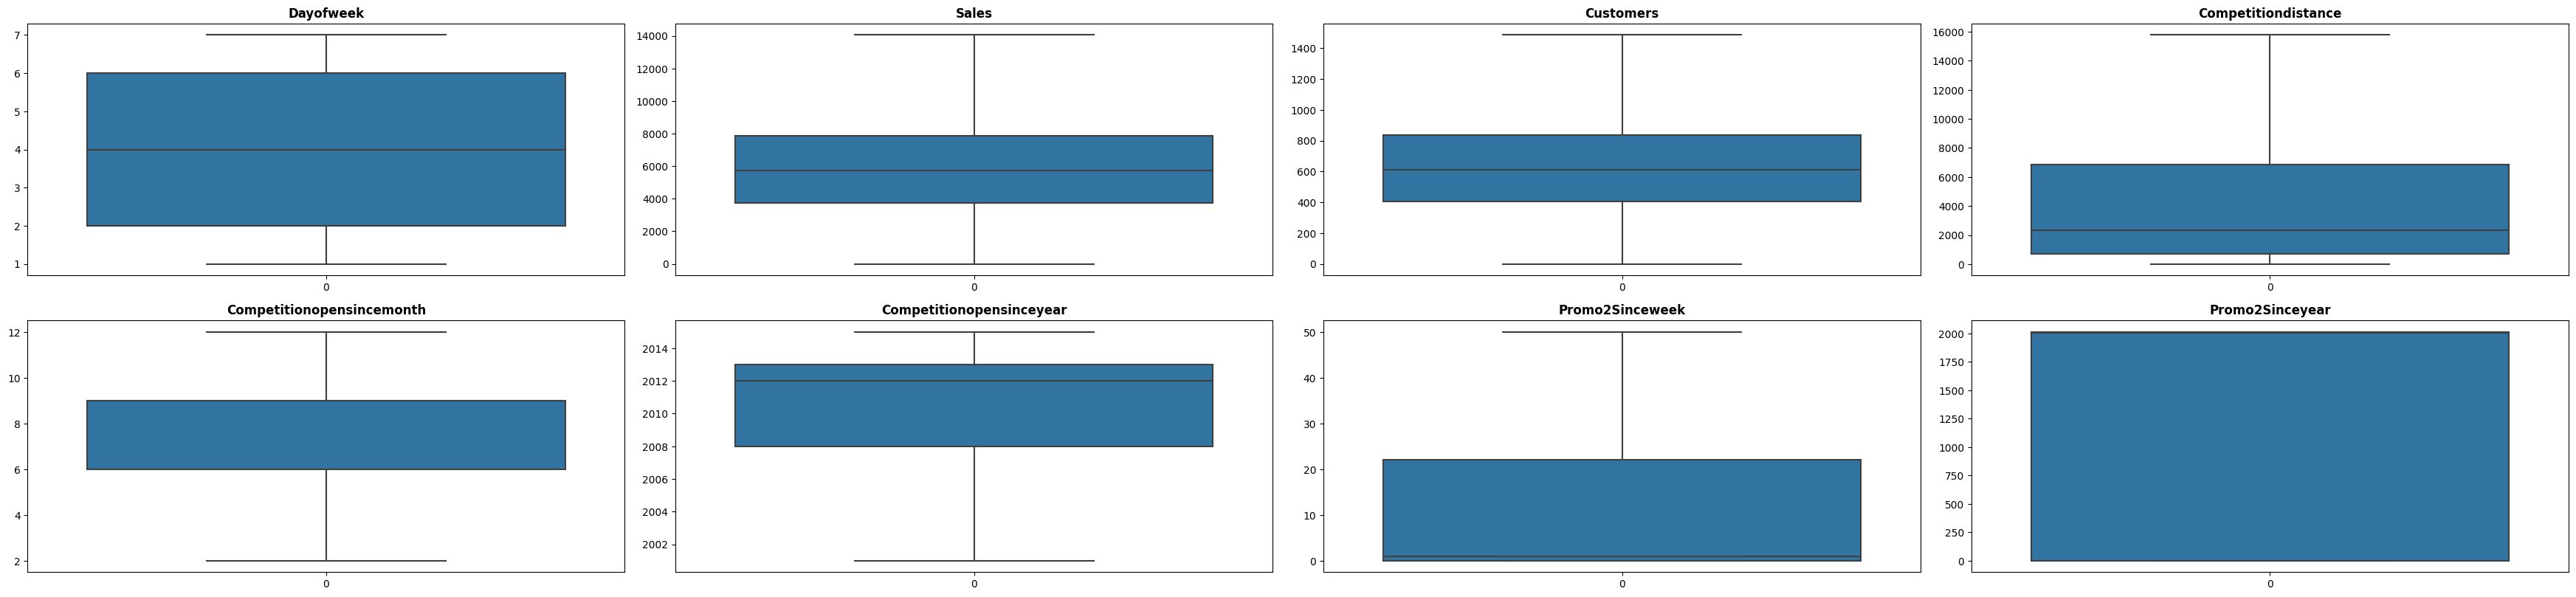

time: 6.07 s (started: 2023-06-12 17:07:41 +00:00)


In [53]:
#Replotting the box plots and rechecking the percentage of outliers still available(if any) in the list of continous_value_feature.
plt.figure(figsize= (35,16))
for index,column in enumerate(continous_features):
  plt.subplot(4,4,index+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight = 'bold')
  plt.tight_layout()

In [54]:
# Cheaking the outlier and percentage of outliers after treatment of the outliers
for i in continous_features:
  print(i)
  detect_outlier(df[i])
  print('\n')

DayOfWeek
q1:2.0,
,q2:4.0,
,q3:6.0
Lower Bound:-4.0,
,Upper Bound:12.0,
,Inter Quartile Range(IQR):4.0
Length of outliers: 0
Percentage of outliers: 0.0


Sales
q1:3727.0,
,q2:5744.0,
,q3:7856.0
Lower Bound:-2466.5,
,Upper Bound:14049.5,
,Inter Quartile Range(IQR):4129.0
Length of outliers: 0
Percentage of outliers: 0.0


Customers
q1:405.0,
,q2:609.0,
,q3:837.0
Lower Bound:-243.0,
,Upper Bound:1485.0,
,Inter Quartile Range(IQR):432.0
Length of outliers: 0
Percentage of outliers: 0.0


CompetitionDistance
q1:710.0,
,q2:2325.0,
,q3:6880.0
Lower Bound:-8545.0,
,Upper Bound:16135.0,
,Inter Quartile Range(IQR):6170.0
Length of outliers: 0
Percentage of outliers: 0.0


CompetitionOpenSinceMonth
q1:6.0,
,q2:9.0,
,q3:9.0
Lower Bound:1.5,
,Upper Bound:13.5,
,Inter Quartile Range(IQR):3.0
Length of outliers: 0
Percentage of outliers: 0.0


CompetitionOpenSinceYear
q1:2008.0,
,q2:2012.0,
,q3:2013.0
Lower Bound:2000.5,
,Upper Bound:2020.5,
,Inter Quartile Range(IQR):5.0
Length of outliers: 0
Perc

* Hence we have to got finally percentage of outlier of the all feature is zero.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Since, the outliers present in some of the continous features i.e "Sales", "Customers", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear" having the percentage 2.62%, 3.75% ,9.75%, 1.22%, 2.71% respectively.

We have defined the two seperate funtions one is for "outlier detection" and the other is for "outlier treatment using IQR" and passed all the observations of continous features through it. We have successfully capped out extreme left outliers(<25%) and extreme right outliers(>75%) in the 25th and 75th quartile value.

#### Bivariate Outlers treatment

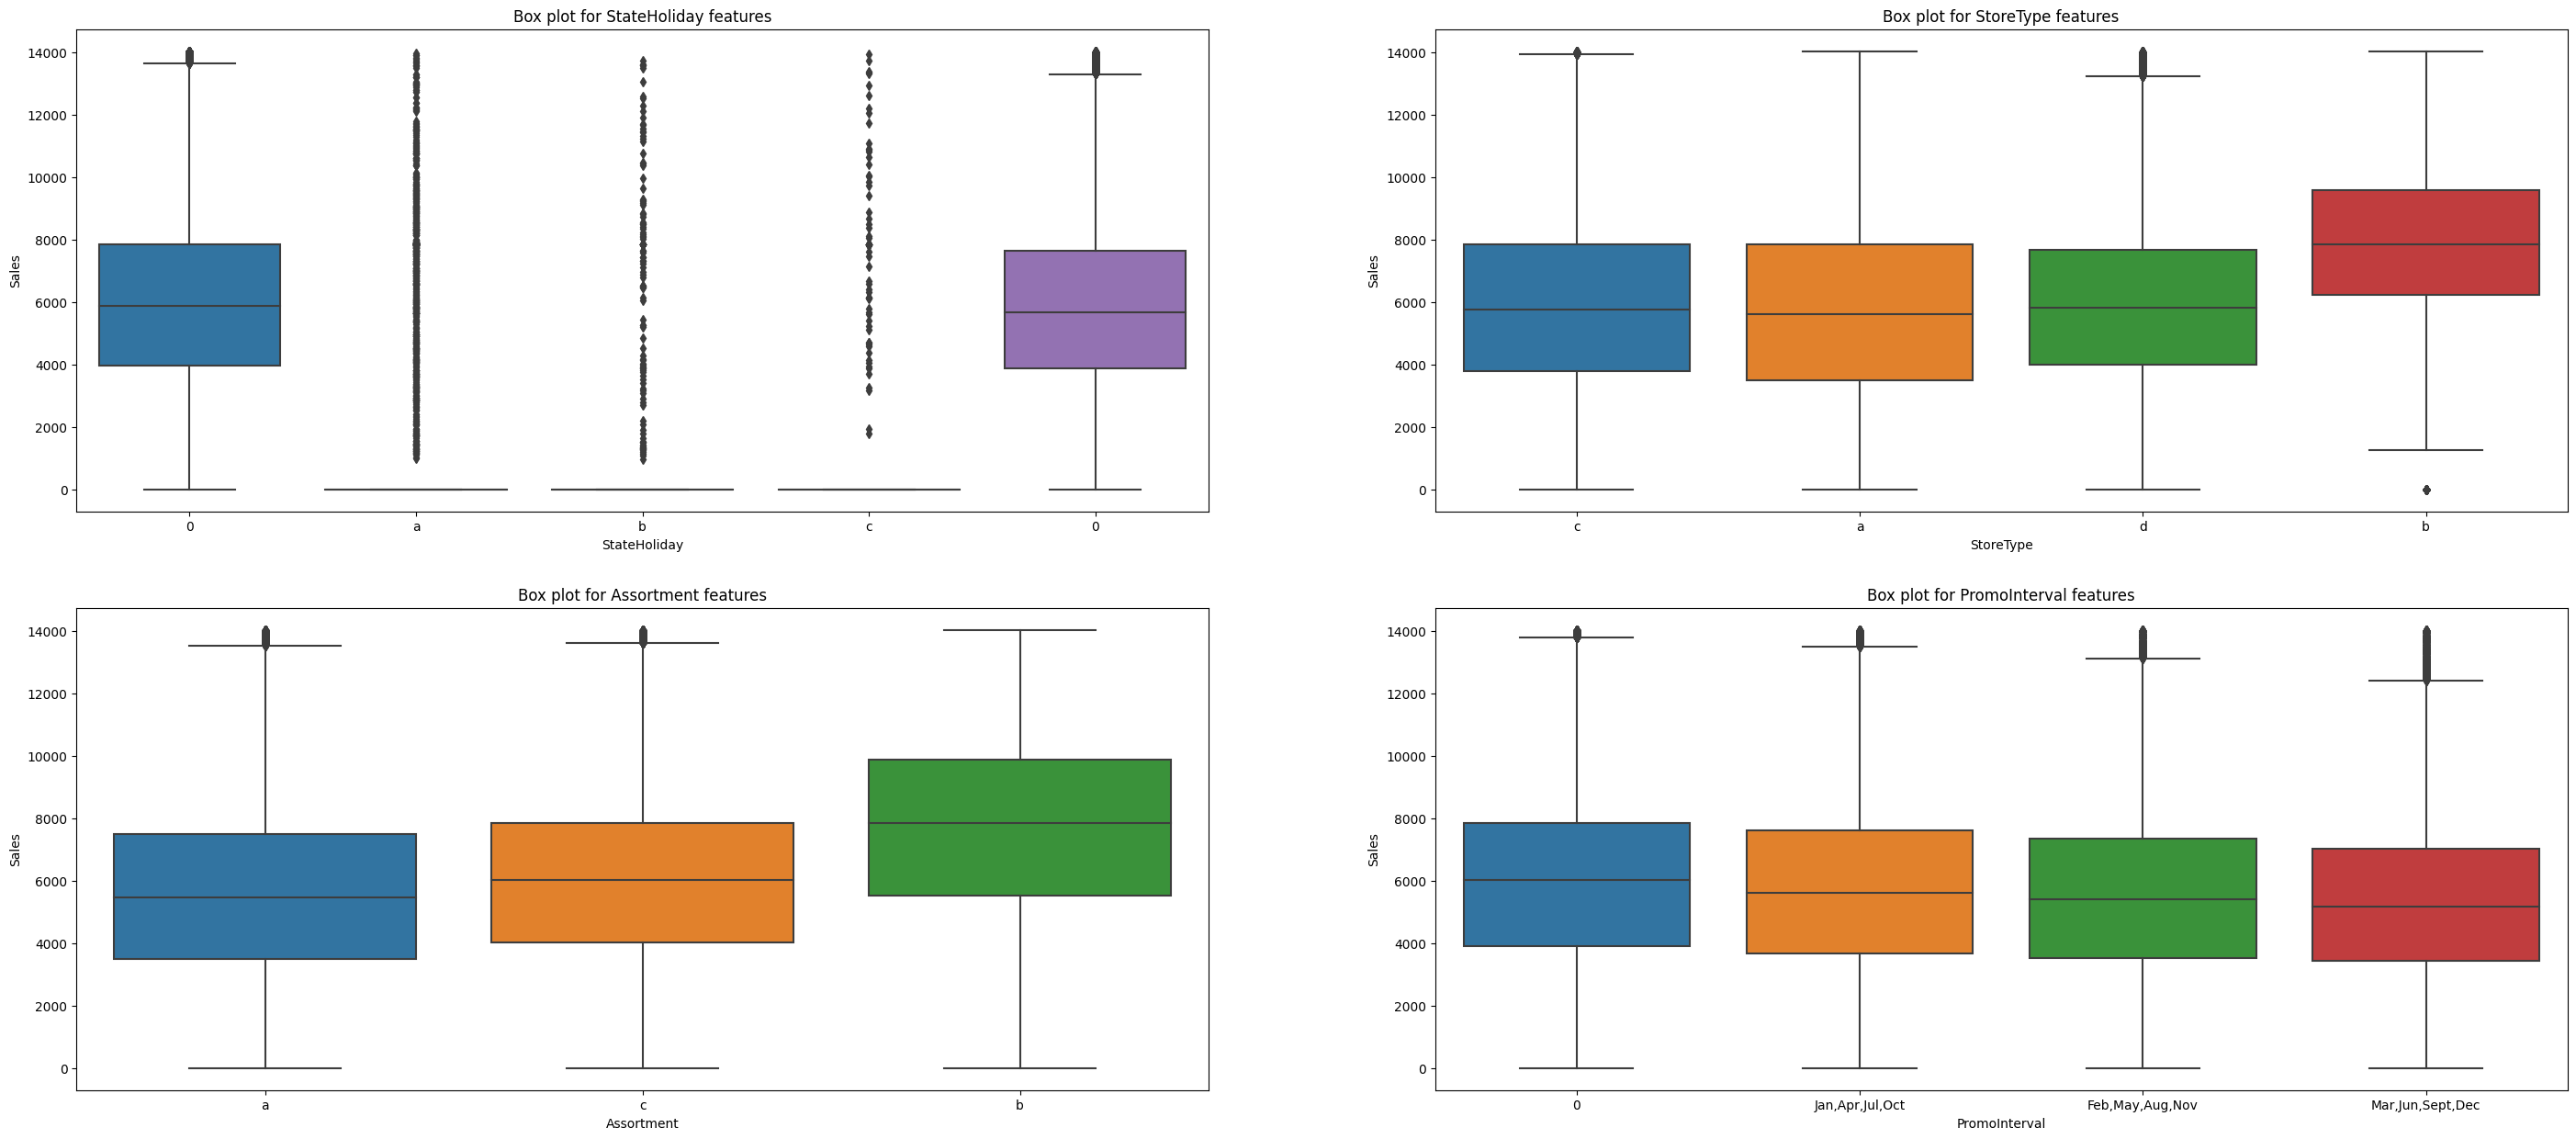

time: 2.08 s (started: 2023-06-12 17:07:57 +00:00)


In [55]:
# Store the object data type into new list
object_datatype_features = ['StateHoliday','StoreType','Assortment','PromoInterval']
# Checking the outliers into each features
plt.figure(figsize = (35,15))
for index, column in enumerate(object_datatype_features):
  plt.subplot(2,2,index + 1)
  sns.boxplot(x = df[column],y = df['Sales'])
  plt.title(f'Box plot for {column} features')

In [56]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the category of object dtype features
for feature in object_datatype_features:
  print(f"Feature: {feature}")
  for index,column in enumerate(df[feature].unique().tolist()):
    print(f"{index+1}: Category: {column}")
    detect_outlier(df[df[feature]==column]["Sales"])
    print("\n")

Feature: StateHoliday
1: Category: 0
q1:3982.0,
,q2:5878.0,
,q3:7856.0
Lower Bound:-1829.0,
,Upper Bound:13667.0,
,Inter Quartile Range(IQR):3874.0
Length of outliers: 3112
Percentage of outliers: 0.36


2: Category: a
q1:0.0,
,q2:0.0,
,q3:0.0
Lower Bound:0.0,
,Upper Bound:0.0,
,Inter Quartile Range(IQR):0.0
Length of outliers: 694
Percentage of outliers: 3.43


3: Category: b
q1:0.0,
,q2:0.0,
,q3:0.0
Lower Bound:0.0,
,Upper Bound:0.0,
,Inter Quartile Range(IQR):0.0
Length of outliers: 145
Percentage of outliers: 2.17


4: Category: c
q1:0.0,
,q2:0.0,
,q3:0.0
Lower Bound:0.0,
,Upper Bound:0.0,
,Inter Quartile Range(IQR):0.0
Length of outliers: 71
Percentage of outliers: 1.73


5: Category: 0
q1:3874.0,
,q2:5674.0,
,q3:7650.25
Lower Bound:-1790.375,
,Upper Bound:13314.625,
,Inter Quartile Range(IQR):3776.25
Length of outliers: 773
Percentage of outliers: 0.59


Feature: StoreType
1: Category: c
q1:3789.0,
,q2:5766.0,
,q3:7849.0
Lower Bound:-2301.0,
,Upper Bound:13939.0,
,Inter Quartile 

* On the above plot we have to see that some outliers present in the dataset, but iplemention of the ML Model and ML algorithm it can easily handle without any dataloss.

### 3. Categorical Encoding

In [57]:
# Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [58]:
# Create the object datatype list
object_datatype_features

['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

time: 3.42 ms (started: 2023-06-12 17:08:06 +00:00)


In [59]:
# Checking uniqe value of each object datatype which have to esential encoding of the categorical data
for i in object_datatype_features:
  print(i)
  print('The unique value are:',df[i].unique())
  print('The total number of unique value in',i,':',df[i].nunique())
  print('\n')

StateHoliday
The unique value are: ['0' 'a' 'b' 'c' 0]
The total number of unique value in StateHoliday : 5


StoreType
The unique value are: ['c' 'a' 'd' 'b']
The total number of unique value in StoreType : 4


Assortment
The unique value are: ['a' 'c' 'b']
The total number of unique value in Assortment : 3


PromoInterval
The unique value are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
The total number of unique value in PromoInterval : 4


time: 329 ms (started: 2023-06-12 17:08:06 +00:00)


On the above information we have to clearly point that in StateHoliday having two type of zero present in the dataset one is string and other is integer, so we have to convert the string zero to integer zero.

In [60]:
# replacing "0" to 0 and a=b=c=1 for our simplicity as they resembles that there is holiday
df["StateHoliday"].replace({"0":0, "a":1, "b":1, "c":1}, inplace=True)

time: 493 ms (started: 2023-06-12 17:08:07 +00:00)


In [61]:
# Checking uniqe value of each object datatype which have to esential encoding of the categorical data
for i in object_datatype_features:
  print(i)
  print('The unique value are:',df[i].unique())
  print('The total number of unique value in',i,':',df[i].nunique())
  print('\n')

StateHoliday
The unique value are: [0 1]
The total number of unique value in StateHoliday : 2


StoreType
The unique value are: ['c' 'a' 'd' 'b']
The total number of unique value in StoreType : 4


Assortment
The unique value are: ['a' 'c' 'b']
The total number of unique value in Assortment : 3


PromoInterval
The unique value are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
The total number of unique value in PromoInterval : 4


time: 271 ms (started: 2023-06-12 17:08:07 +00:00)


Since we have several encoding techniques but the major ones are:
1. Ordinal encoding: When the features are ordinal in nature and have some rank between them.
2. Nominal encoding: When the features have equal weightage and are nominal in nature.

As our all the categorical columns are nominal in nature(do not have any rank or order) so will use One-Hot Encoding (Type of Nominal encoding) in our senario:

In [62]:
# Create a copy of dataset to avoid the mistake in original dataset
dataset = df.copy()

time: 64.6 ms (started: 2023-06-12 17:08:07 +00:00)


In [63]:
# Encode your categorical columns by dropping the first category
dataset= pd.get_dummies(df, dtype=int, drop_first=True)

time: 392 ms (started: 2023-06-12 17:08:07 +00:00)


In [64]:
# code to see all the features
pd.set_option('display.max_columns', None)

time: 466 µs (started: 2023-06-12 17:08:08 +00:00)


We can use the above code to create binary dummy variable using ONE-HOT ENCODING for each of the feature but we will face the issue of "multicollinearity" or "dummy variable trap" as the information given by the one feature can be explained by the other features and this results in the high "VIF". So its better to drop the redundant feature (one category among all other category) here only.

We can do this easily by passing the argument "drop_first = True" in get_dummies without doing it manually, thanks to python code development team to make our tasks easier.

In [65]:
# let's see the dataset
dataset

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995        837     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

         StateHoliday  SchoolHoliday  CompetitionDistance  \
0                   0              1                 1270   
1                   0              1                  570   
2                   0              1                14130   
3                   0              1                  620   
4                   0              1                 6880   
...               ...            ...                  ...   
1017204             1              1                 1900   
1017205             1              1                 1880   
1017206             1              1                 9260   
1017207             1              1                  870   
1017208             1              1                 5350   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                                9                      2008       0   
1                               11                      2007       1   
2                               12                      2006       1   
3                                9                      2009       0   
4                                4                      2015       0   
...                            ...                       ...     ...   
1017204                          6                      2014       1   
1017205                          4                      2006       0   
1017206                          9                      2013       0   
1017207                          9                      2013       0   
1017208                          9                      2013       1   

         Promo2SinceWeek  Promo2SinceYear  StoreType_b  StoreType_c  \
0                      0                0            0            1   
1                     13             2010            0            0   
2                     14             2011            0            0   
3                      0                0            0            1   
4                      0                0            0            0   
...                  ...              ...          ...          ...   
1017204               31             2013            0            0   
1017205                0                0            0            1   
1017206                0                0            0            0   
1017207                0                0            0            0   
1017208               22             2012            0            0   

         StoreType_d  Assortment_b  Assortment_c  \
0                  0             0             0   
1                  0             0             0   
2                  0             0             0   
3                  0             0             1   
4                  0             0             0   
...              ...           ...           ...   
1017204            0             0             0   
1017205            0             0             1   
1017206            0             0             1   
1017207            0             0             1   
1017208            1             0             1   

         PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0      

time: 24.4 ms (started: 2023-06-12 17:08:08 +00:00)


In [66]:
# Information of copy dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   DayOfWeek                       1017209 non-null  int64         
 2   Date                            1017209 non-null  datetime64[ns]
 3   Sales                           1017209 non-null  int64         
 4   Customers                       1017209 non-null  int64         
 5   Open                            1017209 non-null  int64         
 6   Promo                           1017209 non-null  int64         
 7   StateHoliday                    1017209 non-null  int64         
 8   SchoolHoliday                   1017209 non-null  int64         
 9   CompetitionDistance             1017209 non-null  int64         
 10  CompetitionOpenSinceMonth       1017209 no

#### What all categorical encoding techniques have you used & why did you use those techniques?

* In order to make our categorical features of the object type compatible to be fed into multiple ML algorithms in the future, we employed the one-hot encoding technique to convert their dummies into int types.

* Since there are only 3 to 4 distinct orderless categories among all the categorical features, there are fewer of them. Thus, using Nominal encoding rather than Ordinal encoding is recommended.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [67]:
# Expand Contraction
# Not applicable for our project

time: 218 µs (started: 2023-06-12 17:08:08 +00:00)


#### 2. Lower Casing

In [68]:
# Lower Casing
# Not applicable for our project

time: 269 µs (started: 2023-06-12 17:08:08 +00:00)


#### 3. Removing Punctuations

In [69]:
# Remove Punctuations
# Not applicable for our project

time: 257 µs (started: 2023-06-12 17:08:08 +00:00)


#### 4. Removing URLs & Removing words and digits contain digits.

In [70]:
# Remove URLs & Remove words and digits contain digits
# Not applicable for our project

time: 235 µs (started: 2023-06-12 17:08:08 +00:00)


#### 5. Removing Stopwords & Removing White spaces

In [71]:
# Remove Stopwords
# Not applicable for our project

time: 291 µs (started: 2023-06-12 17:08:08 +00:00)


In [72]:
# Remove White spaces
# Not applicable for our project

time: 291 µs (started: 2023-06-12 17:08:08 +00:00)


#### 6. Rephrase Text

In [73]:
# Rephrase Text
# Not applicable for our project

time: 287 µs (started: 2023-06-12 17:08:08 +00:00)


#### 7. Tokenization

In [74]:
# Tokenization
# Not applicable for our project

time: 260 µs (started: 2023-06-12 17:08:08 +00:00)


#### 8. Text Normalization

In [75]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Not applicable for our project

time: 286 µs (started: 2023-06-12 17:08:08 +00:00)


##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [76]:
# POS Taging
# Not applicable for our project

time: 257 µs (started: 2023-06-12 17:08:08 +00:00)


#### 10. Text Vectorization

In [77]:
# Vectorizing Text
# Not applicable for our project

time: 254 µs (started: 2023-06-12 17:08:08 +00:00)


##### Which text vectorization technique have you used and why?

Not applicable for our projectAnswer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [78]:
# Manipulate Features to minimize feature correlation and create new features
# Checking the first five dataset to handle this
dataset.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      2          5 2015-07-31   6064        625     1      1             0   
2      3          5 2015-07-31   8314        821     1      1             0   
3      4          5 2015-07-31  13995        837     1      1             0   
4      5          5 2015-07-31   4822        559     1      1             0   

   SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
0              1                 1270                          9   
1              1                  570                         11   
2              1                14130                         12   
3              1                  620                          9   
4              1                 6880                          4   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                      2008       0                0                0   
1                      2007       1               13             2010   
2                      2006       1               14             2011   
3                      2009       0                0                0   
4                      2015       0                0                0   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  \
0            0            1            0             0             0   
1            0            0            0             0             0   
2            0            0            0             0             0   
3            0            1            0             0             1   
4            0            0            0             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              1   
2                              0                              1   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0

time: 23.3 ms (started: 2023-06-12 17:08:08 +00:00)


In [79]:
# Extract the year, month, day, and week from Date features
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Week'] = dataset['Date'].dt.week
dataset['Day'] = dataset['Date'].dt.day

time: 447 ms (started: 2023-06-12 17:08:08 +00:00)


We have to derive two feature from the dataset which is:\
1. **CompetitionDuration :** It gives the information about the duration of the two store competition and gives the CompetitionDuration in months from that dataset.
2. **PromoDuration :** It gives the information about the duration of the store which is involve in promotion and duration compling in months from that dataset.

In [80]:
# Calculation of CompetitionDuration
dataset['CompetitionDuration'] = (dataset['Year'] - dataset['CompetitionOpenSinceYear'])*12 + (dataset['Month'] - dataset['CompetitionOpenSinceMonth'])
dataset["CompetitionDuration"] = dataset["CompetitionDuration"].map(lambda x: int(0) if x < 0 else int(x)).fillna(0)

time: 263 ms (started: 2023-06-12 17:08:09 +00:00)


In [81]:
# Calculation of PromoDuration
dataset['PromoDuration'] = (dataset['Year'] - dataset['Promo2SinceYear'])*12 + (dataset['Week'] - dataset['Promo2SinceWeek'])*(7*12/365)
dataset['PromoDuration'] = dataset['PromoDuration'].map(lambda x: int(0) if x < 0 else int(x)).fillna(0)

time: 315 ms (started: 2023-06-12 17:08:09 +00:00)


In [82]:
# After manipulation check the top 5 data
dataset.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      2          5 2015-07-31   6064        625     1      1             0   
2      3          5 2015-07-31   8314        821     1      1             0   
3      4          5 2015-07-31  13995        837     1      1             0   
4      5          5 2015-07-31   4822        559     1      1             0   

   SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
0              1                 1270                          9   
1              1                  570                         11   
2              1                14130                         12   
3              1                  620                          9   
4              1                 6880                          4   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                      2008       0                0                0   
1                      2007       1               13             2010   
2                      2006       1               14             2011   
3                      2009       0                0                0   
4                      2015       0                0                0   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  \
0            0            1            0             0             0   
1            0            0            0             0             0   
2            0            0            0             0             0   
3            0            1            0             0             1   
4            0            0            0             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              1   
2                              0                              1   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  Year  Month  Week  Day  \
0                               0  2015      7    31   31   
1                               0  2015      7    31   31   
2                               0  2015      7    31   31   
3                               0  2015      7    31   31   
4                               0  2015      7    31   31   

   CompetitionDuration  PromoDuration  
0                   82          24187  
1                   92             64  
2                  103             51  
3                   70          24187  
4                    3          24187

time: 13.3 ms (started: 2023-06-12 17:08:09 +00:00)


We have noticed that some of the observations in "Open" are 0 that means store are closed. This maybe due to store refurbishment. So there is very high possibility that our model create biasness towards zero sales(since store is closed there won't be any sale). We have mutually decided to drop those observations where store is closed so that we can tackle the real world senario without any biasness.

In [83]:
# Dropping the observations where the stores are closed and Sales are 0.
dataset = dataset.drop(dataset[((dataset.Open == 0))].index)
dataset = dataset.drop(dataset[(dataset.Sales == 0)].index)

time: 220 ms (started: 2023-06-12 17:08:09 +00:00)


In [84]:
dataset.shape

(844338, 29)

time: 3.36 ms (started: 2023-06-12 17:08:09 +00:00)


Now we have the observations where "Open"=1 OR "Store is open". Its wont show any corelation with any other feature. So, its better to drop that feature here only.

In [85]:
# Dropping Open feature from dataset
dataset.drop(columns=["Open"], inplace=True)

time: 40.1 ms (started: 2023-06-12 17:08:09 +00:00)


#### 2. Feature Selection

In [86]:
# Find the dataset informanation 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Store                           844338 non-null  int64         
 1   DayOfWeek                       844338 non-null  int64         
 2   Date                            844338 non-null  datetime64[ns]
 3   Sales                           844338 non-null  int64         
 4   Customers                       844338 non-null  int64         
 5   Promo                           844338 non-null  int64         
 6   StateHoliday                    844338 non-null  int64         
 7   SchoolHoliday                   844338 non-null  int64         
 8   CompetitionDistance             844338 non-null  int64         
 9   CompetitionOpenSinceMonth       844338 non-null  int64         
 10  CompetitionOpenSinceYear        844338 non-null  int64 

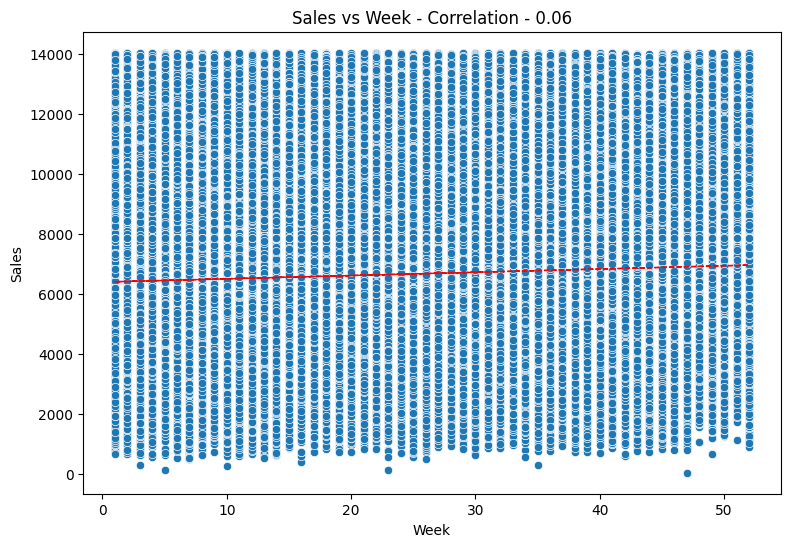

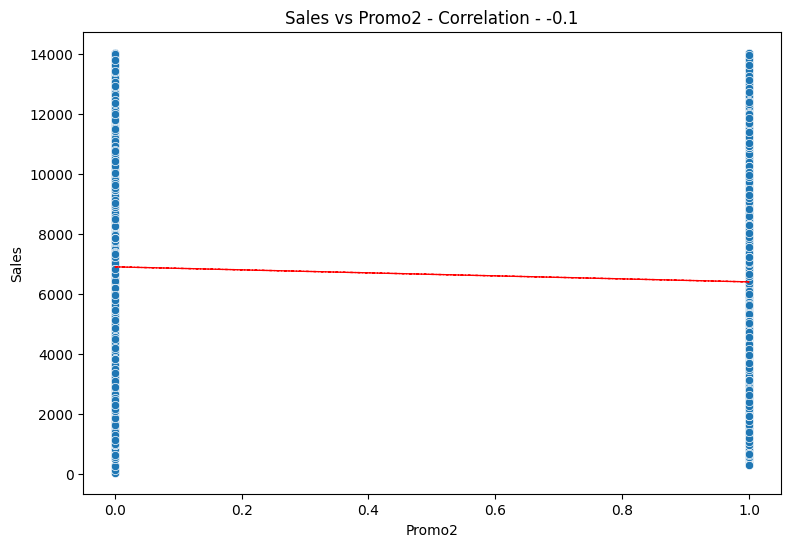

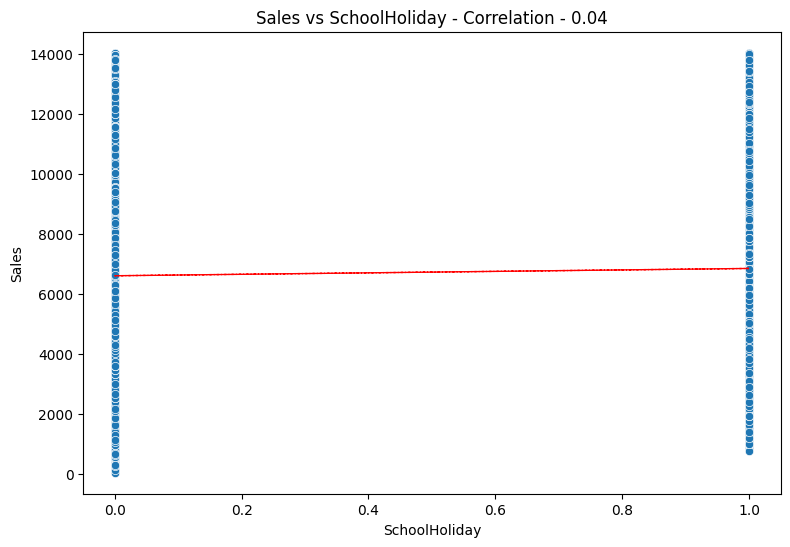

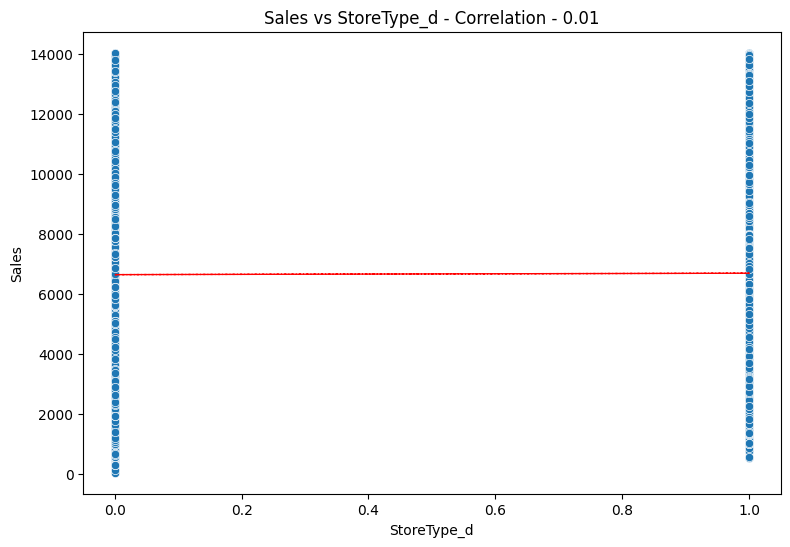

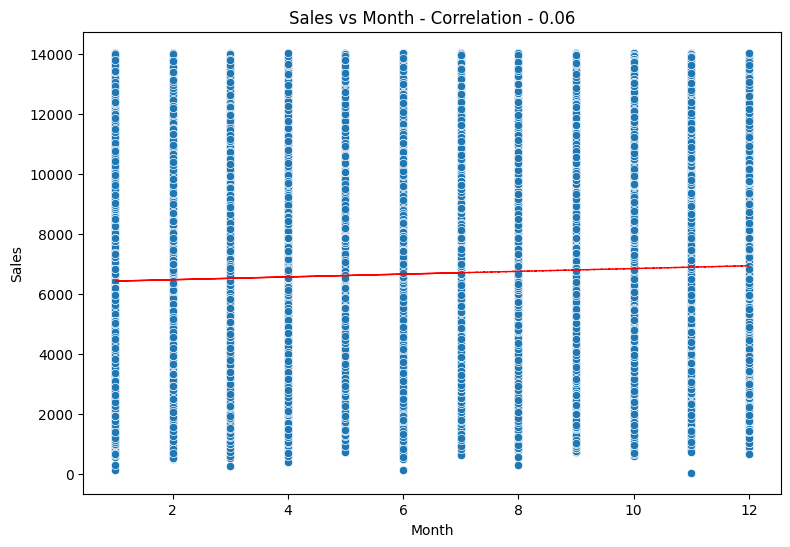

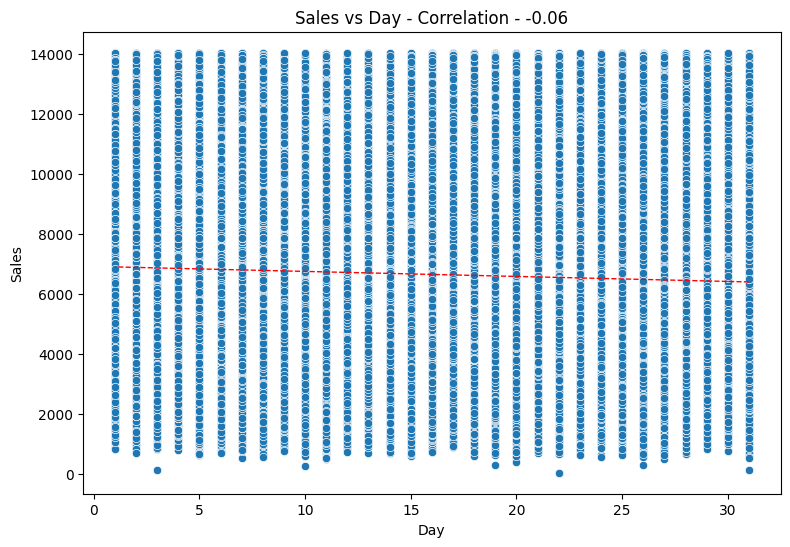

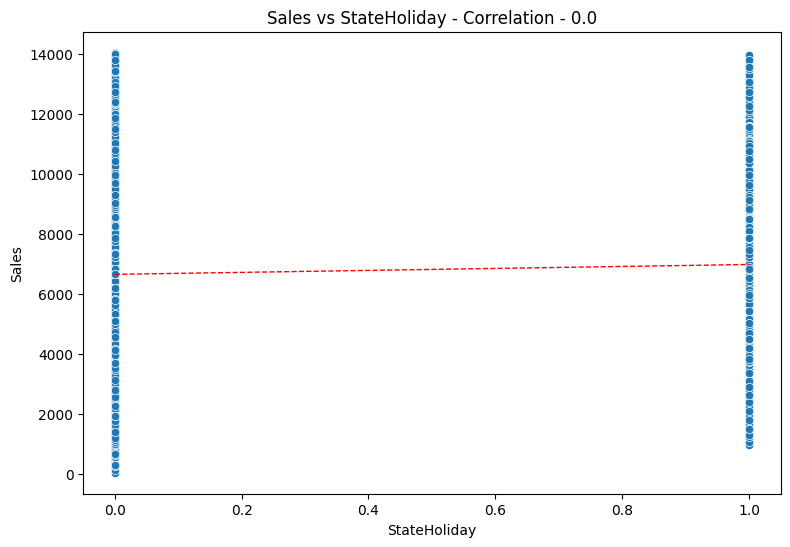

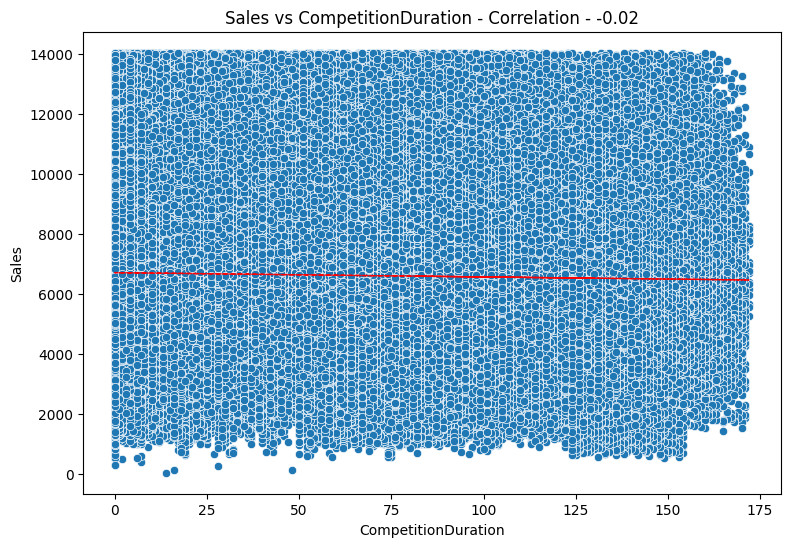

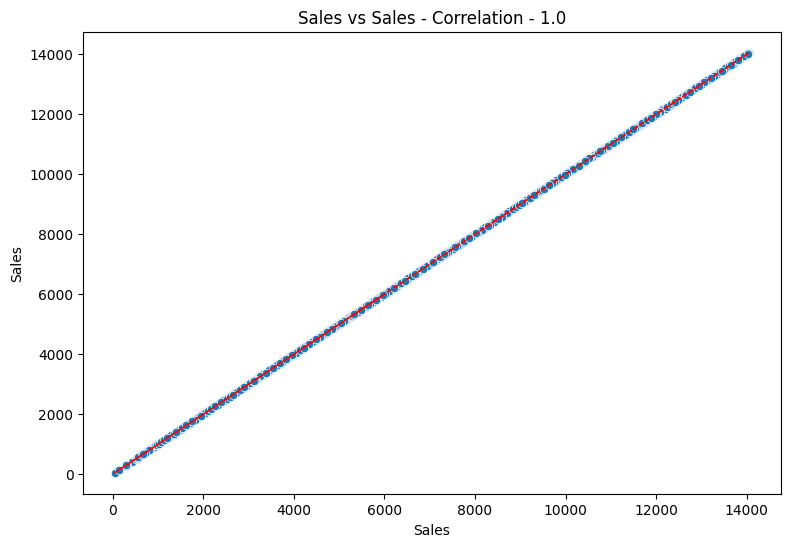

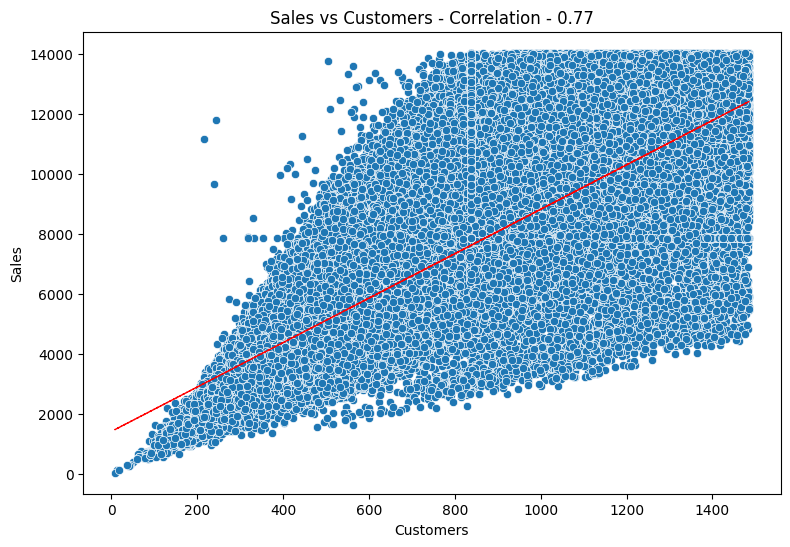

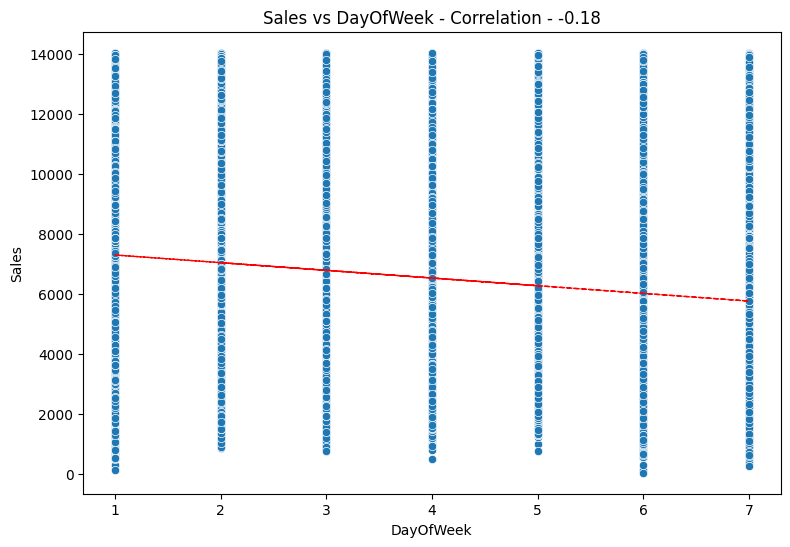

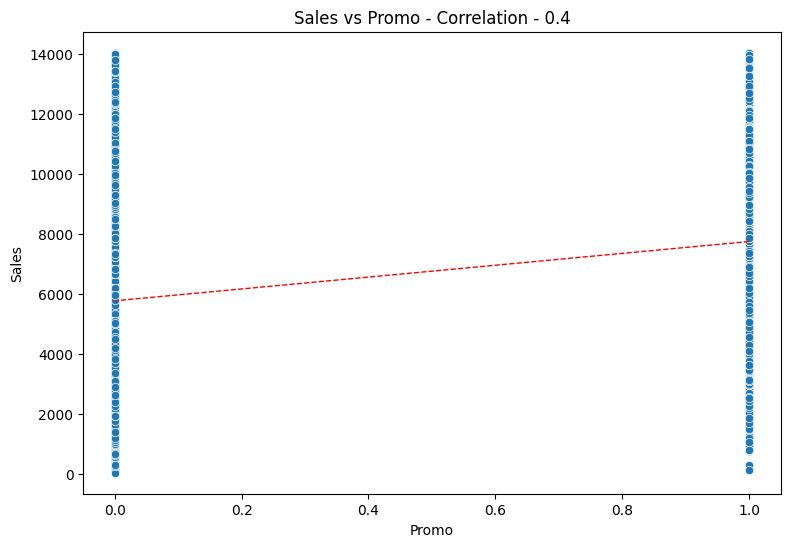

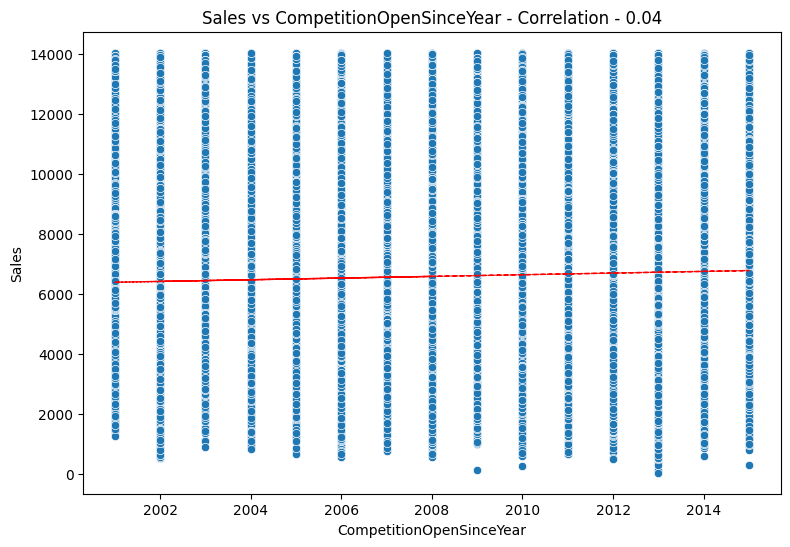

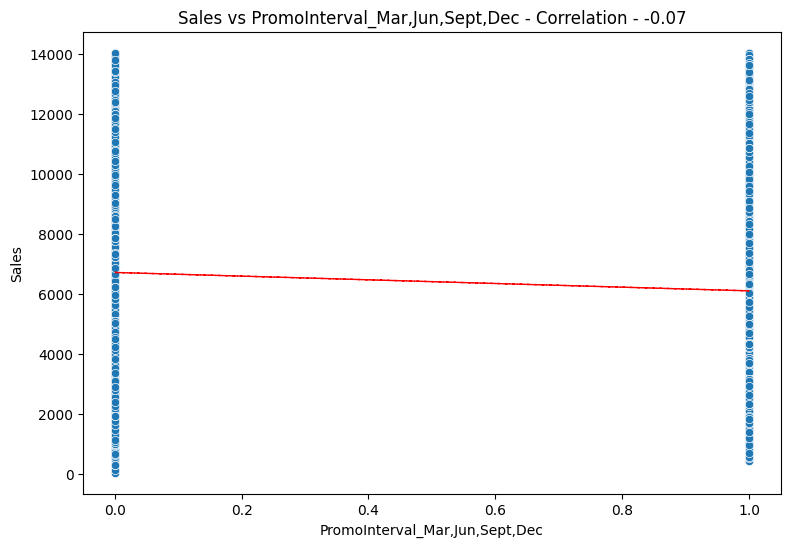

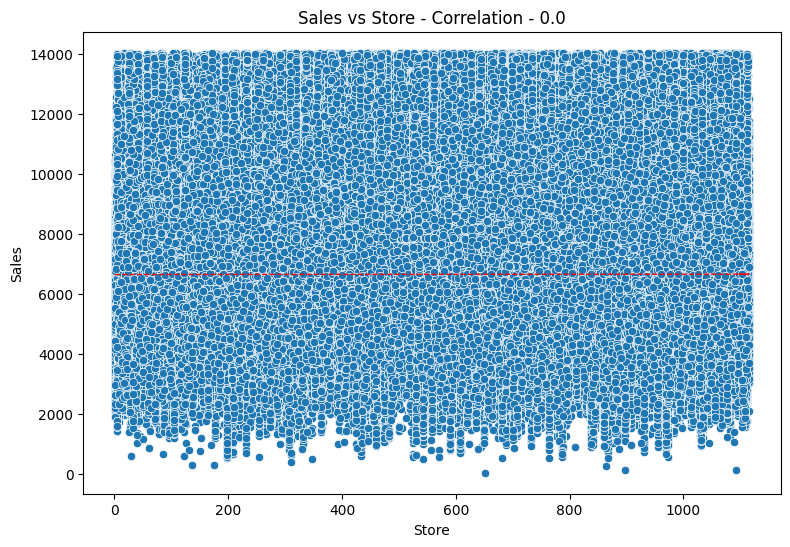

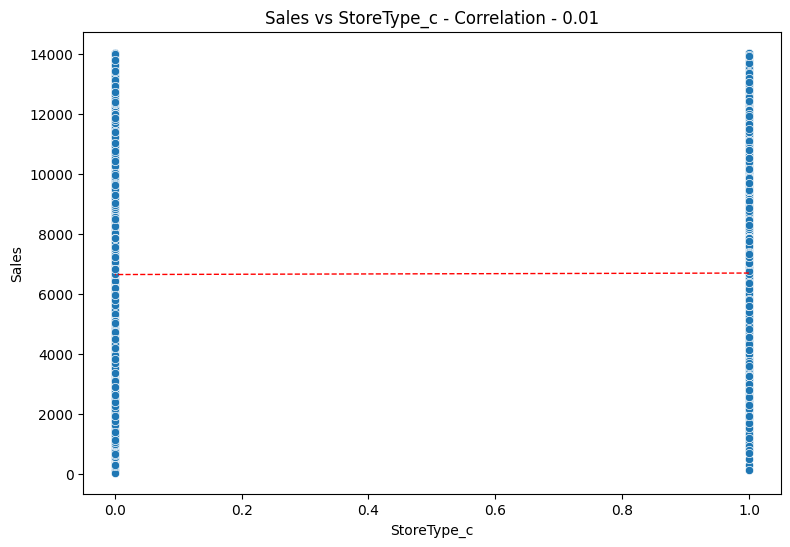

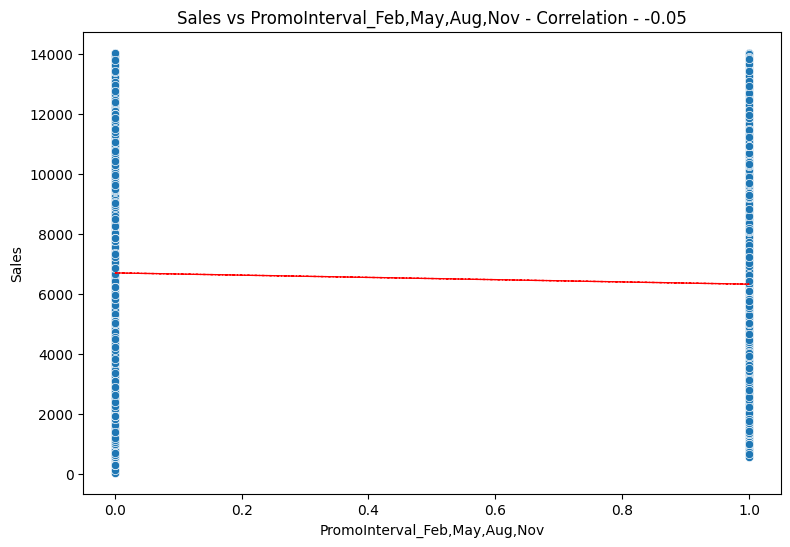

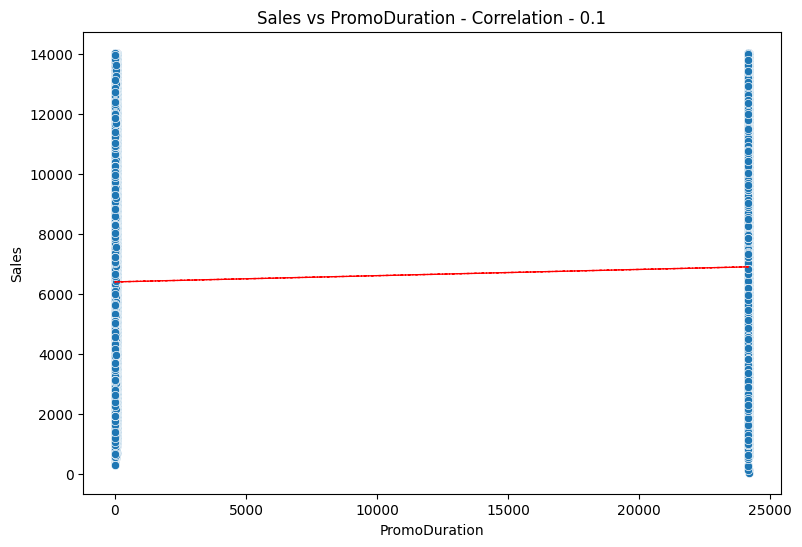

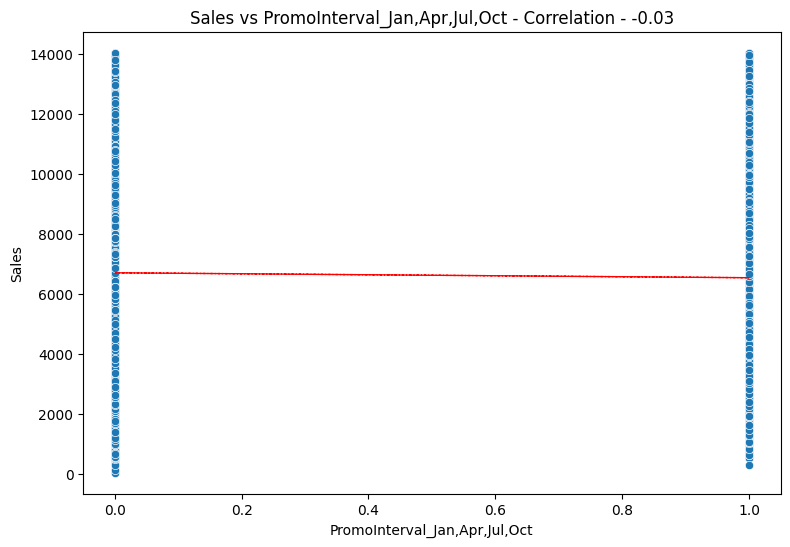

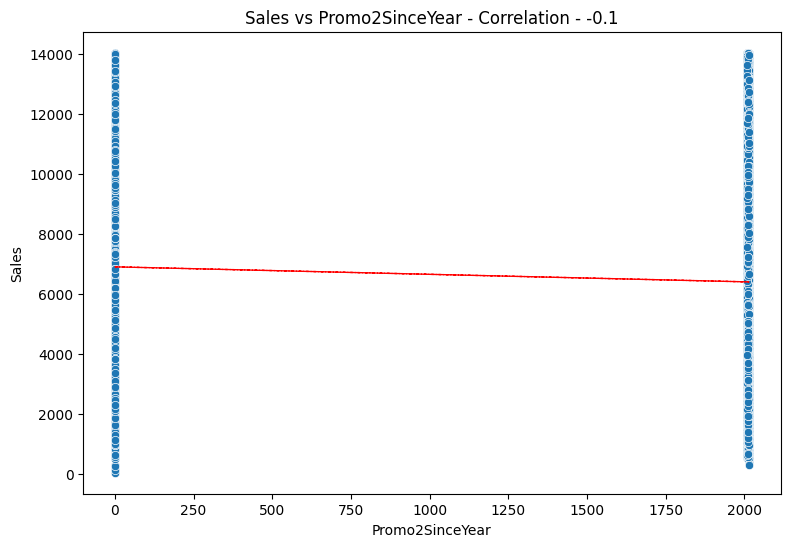

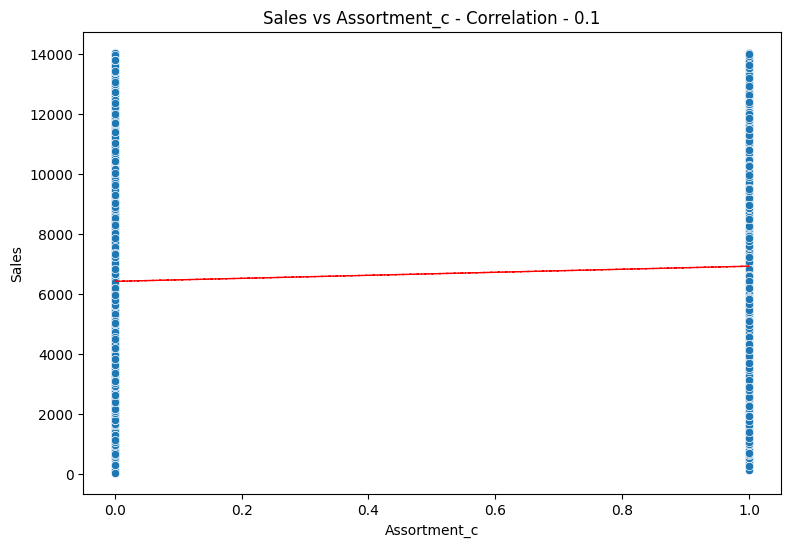

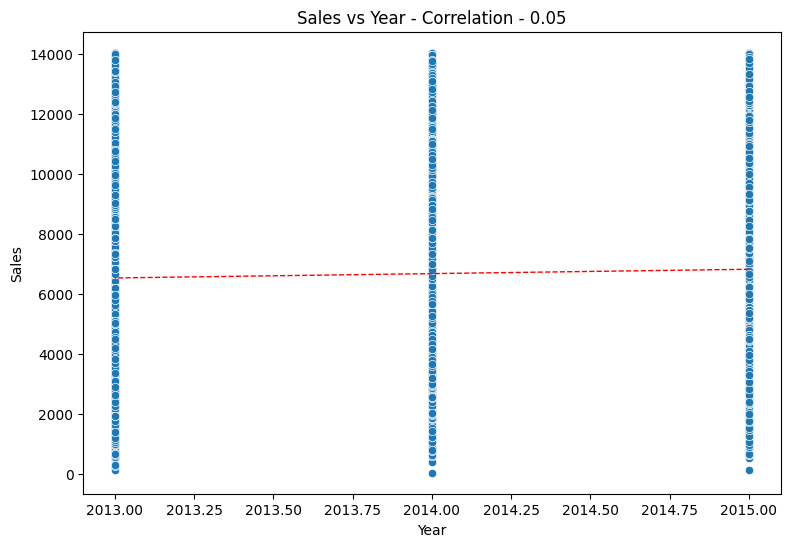

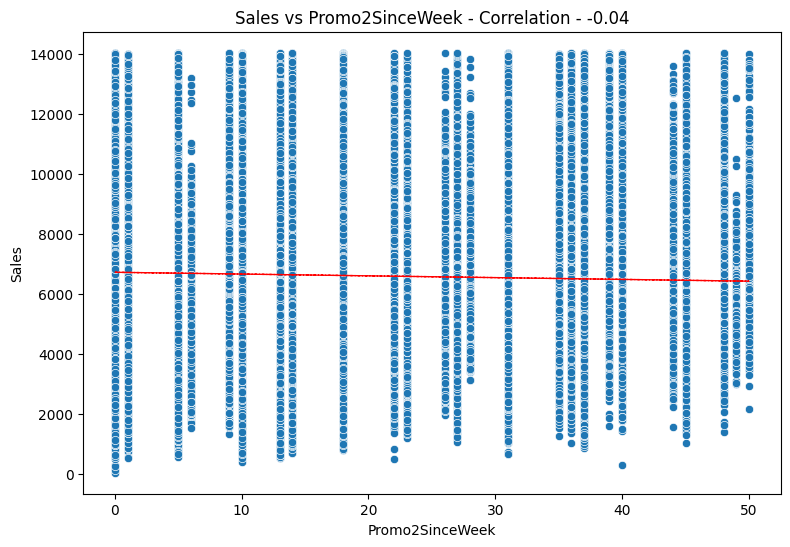

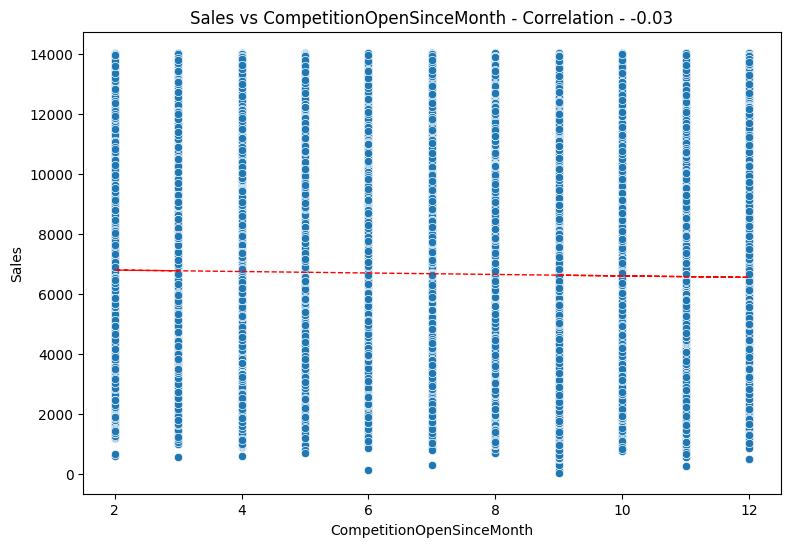

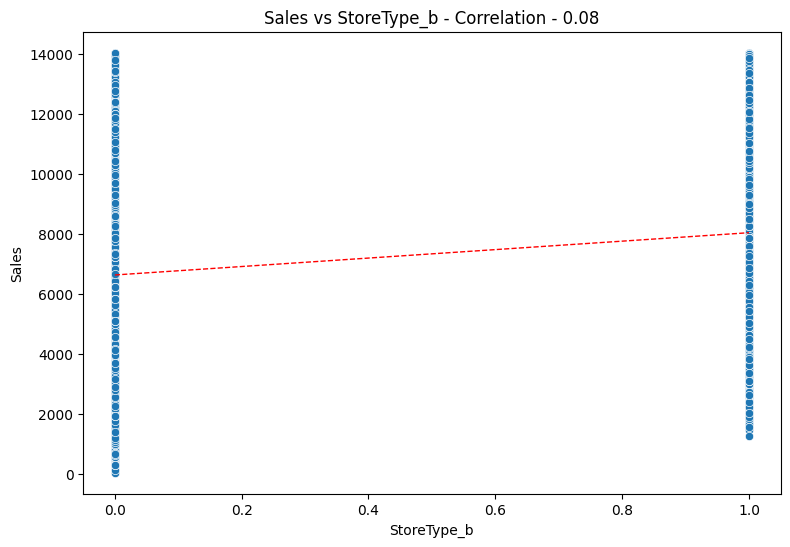

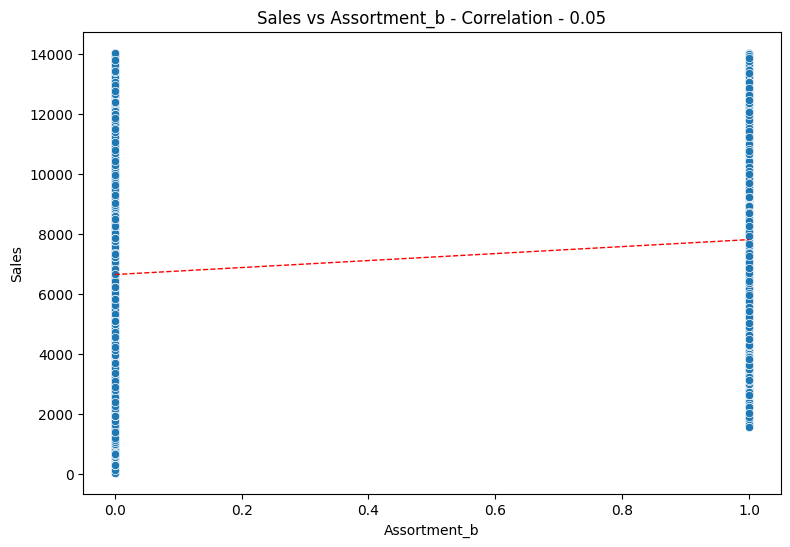

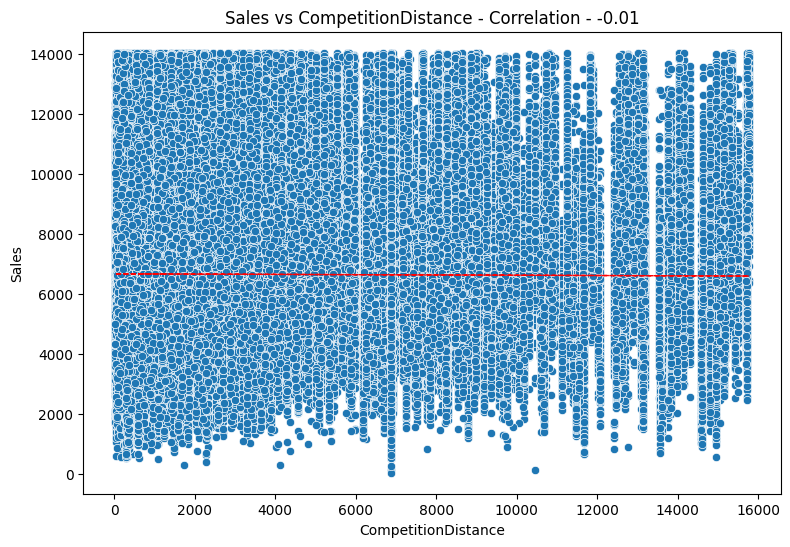

time: 1min 17s (started: 2023-06-12 17:08:09 +00:00)


In [87]:
# Let's see how to relation between sales and other features
for col in list(set(dataset.columns.tolist()) - {'Date'}):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Sales']
    correlation = feature.corr(label)
    sns.scatterplot(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    plt.title('Sales vs '+col+' - Correlation - ' + str(round(correlation,2)))
    z = np.polyfit(dataset[col], dataset['Sales'], 1)
    y_hat = np.poly1d(z)(dataset[col])
    plt.plot(dataset[col], y_hat, "r--", lw=1)
    plt.show()

<Axes: >

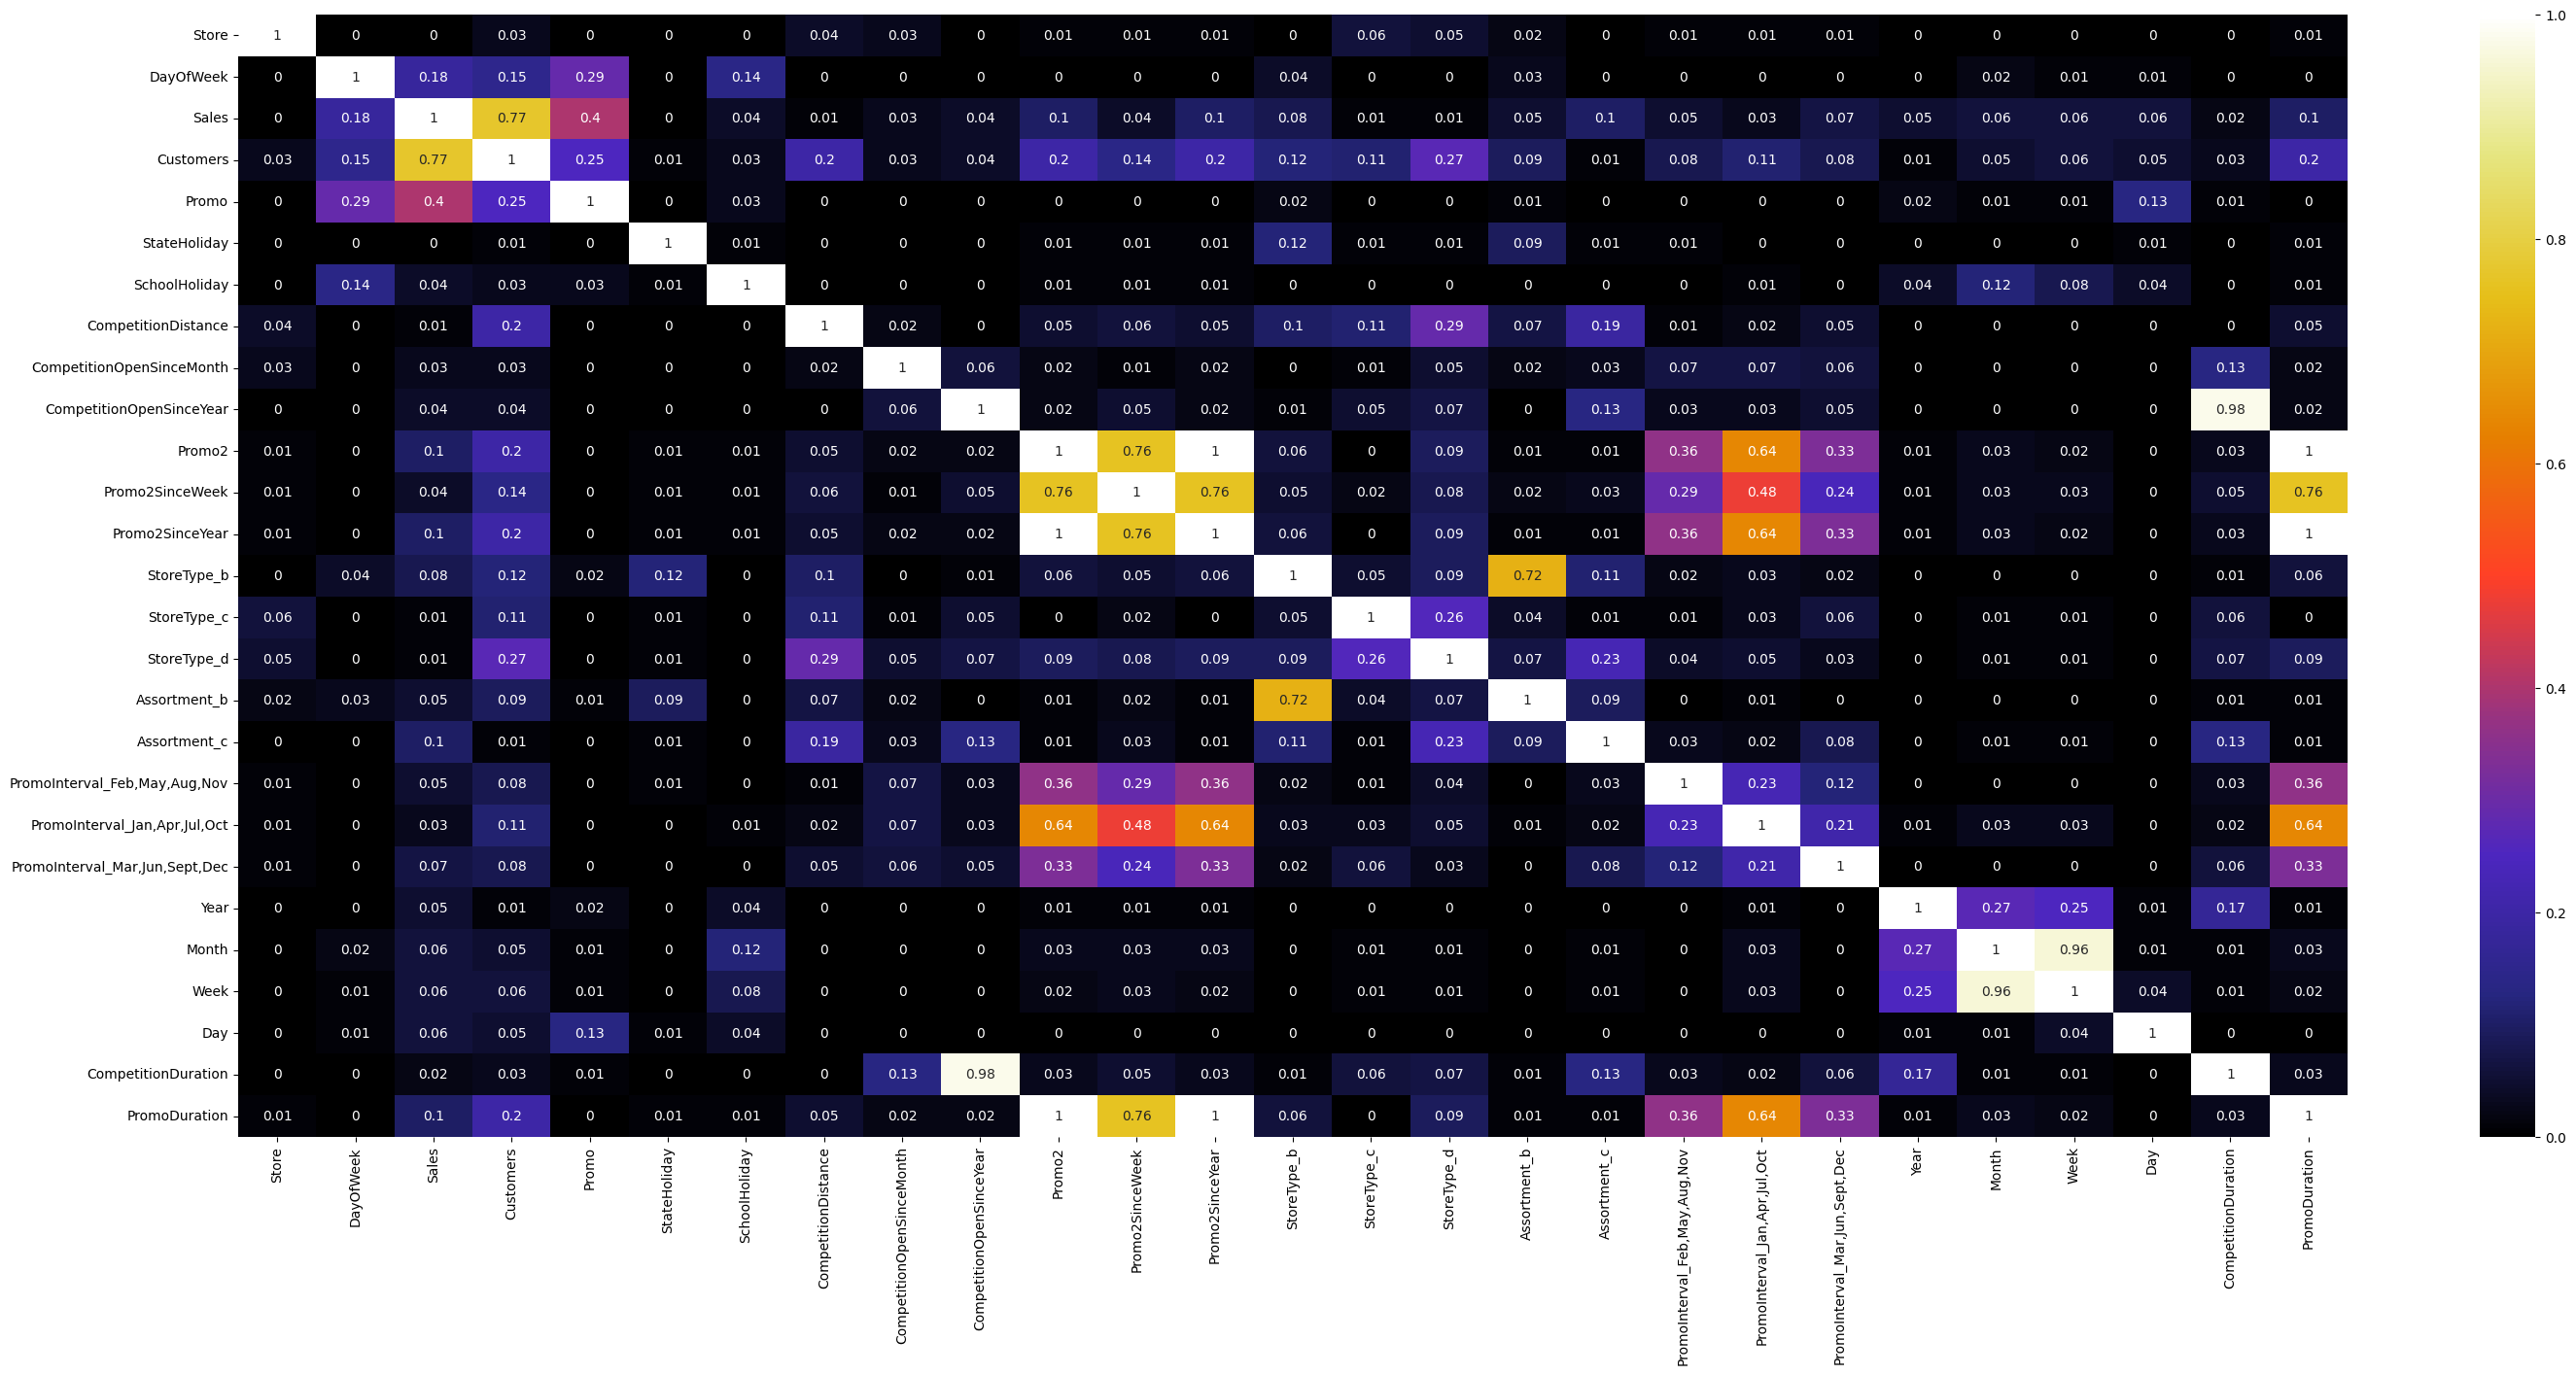

time: 6.75 s (started: 2023-06-12 17:09:27 +00:00)


In [88]:
# Select your features wisely to avoid overfitting
plt.figure(figsize = (35,15))
sns.heatmap(abs(round(dataset.corr(),2)), annot = True, cmap= plt.cm.CMRmap)

Now we have to need that those features contain our final dataset which have highly impacting our dependent variable i.e. Sales. Using Variance Inflation Factor(VIF) determine the multicolinearity of the feature and finally select the feature of the final dataset.

In [89]:
# Defining the function variance_inflation_factor
def vif_function(data):
  vif = pd.DataFrame()
  vif['var'] = data.columns
  vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
  return vif

time: 616 µs (started: 2023-06-12 17:09:34 +00:00)


Calculating VIF(Variance Inflation Factor) by excluding:
1. **Sales :** As it is target variable
2. **Store  :** As it is StoreID and not giving any information

\



We have extracted new features "CompetitionDuration" and "PromoDuration" from features "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Month", "Year", "Week". So we can exclude them while calculating VIF.

In [90]:
# calculating the vif by excluding some features
vif_function(dataset[[i for i in dataset.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Month", "Year","Week","PromoDuration"]]])

var       VIF
0                        DayOfWeek  4.206330
1                        Customers  6.239244
2                            Promo  2.065353
3                     StateHoliday  1.015326
4                    SchoolHoliday  1.247010
5              CompetitionDistance  2.180408
6                           Promo2       inf
7                      StoreType_b  2.192540
8                      StoreType_c  1.264521
9                      StoreType_d  1.775522
10                    Assortment_b  2.121971
11                    Assortment_c  2.078224
12   PromoInterval_Feb,May,Aug,Nov       inf
13   PromoInterval_Jan,Apr,Jul,Oct       inf
14  PromoInterval_Mar,Jun,Sept,Dec       inf
15                             Day  3.774729
16             CompetitionDuration  1.835973

time: 27.6 s (started: 2023-06-12 17:09:34 +00:00)


Since, "Promo2","PromoInterval_Jan,Apr,Jul,Oct", "PromoInterval_Feb,May,Aug,Nov", "PromoInterval_Mar,Jun,Sept,Dec" are having high VIF values and "PromoInterval_Jan,Apr,Jul,Oct" is having least corelation with "Sales". So, let's exclude "PromoInterval_Jan,Apr,Jul,Oct"

In [91]:
# calculating the vif by excluding some features
vif_function(dataset[[i for i in dataset.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Month", "Year","Week", "PromoInterval_Jan,Apr,Jul,Oct"]]])

var        VIF
0                        DayOfWeek   5.807732
1                        Customers  11.134758
2                            Promo   2.124296
3                     StateHoliday   1.015455
4                    SchoolHoliday   1.267227
5              CompetitionDistance   2.332419
6                           Promo2  14.015600
7                      StoreType_b   2.193098
8                      StoreType_c   1.269850
9                      StoreType_d   1.848912
10                    Assortment_b   2.122659
11                    Assortment_c   2.096792
12   PromoInterval_Feb,May,Aug,Nov   1.407585
13  PromoInterval_Mar,Jun,Sept,Dec   1.354153
14                             Day   4.408253
15             CompetitionDuration   1.936088
16                   PromoDuration  14.750779

time: 32.6 s (started: 2023-06-12 17:10:01 +00:00)


In [92]:
# calculating the vif by excluding some features
vif_function(dataset[[i for i in dataset.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Month", "Year","Week", "PromoInterval_Jan,Apr,Jul,Oct","Assortment_b","PromoDuration"]]])

var       VIF
0                        DayOfWeek  4.205970
1                        Customers  6.239018
2                            Promo  2.065252
3                     StateHoliday  1.015180
4                    SchoolHoliday  1.246997
5              CompetitionDistance  2.180243
6                           Promo2  2.632483
7                      StoreType_b  1.076987
8                      StoreType_c  1.264516
9                      StoreType_d  1.775513
10                    Assortment_c  2.077269
11   PromoInterval_Feb,May,Aug,Nov  1.407065
12  PromoInterval_Mar,Jun,Sept,Dec  1.353186
13                             Day  3.774549
14             CompetitionDuration  1.835972

time: 19.8 s (started: 2023-06-12 17:10:34 +00:00)


In [93]:
# New Dataframe which will be our final dataframe
final_dataset = dataset[["DayOfWeek", "Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day","CompetitionDuration","Sales"]]

time: 11.9 ms (started: 2023-06-12 17:10:54 +00:00)


In [94]:
# Informanation of the final dataset
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   DayOfWeek                       844338 non-null  int64
 1   Customers                       844338 non-null  int64
 2   Promo                           844338 non-null  int64
 3   StateHoliday                    844338 non-null  int64
 4   SchoolHoliday                   844338 non-null  int64
 5   CompetitionDistance             844338 non-null  int64
 6   Promo2                          844338 non-null  int64
 7   StoreType_b                     844338 non-null  int64
 8   StoreType_c                     844338 non-null  int64
 9   StoreType_d                     844338 non-null  int64
 10  Assortment_c                    844338 non-null  int64
 11  PromoInterval_Feb,May,Aug,Nov   844338 non-null  int64
 12  PromoInterval_Mar,Jun,Sept,Dec  844338 non-

time: 41.1 ms (started: 2023-06-12 17:10:54 +00:00)


##### What all feature selection methods have you used  and why?

To see how each attribute relates to the target variable, we plotted the seaborn's scatterplot and seaborn's heatmap and noted the correlations shown below:
1. **Positive Correlation**: Customers, Open, Promo, SchoolHoliday, CompetitionOpenSinceYear, Assortment_b, Assortment_c, Month, Year, Week, PromoDuration.
2. **Negative Correlation**: DayOfWeek, StateHoliday, ComptitionDistance, CompetitionOpenSinceMonth, Promo2, Promo2SinceWeek,Promo2SinceYear, 'PromoInterval_Feb,May,Aug,Nov, 'PromoInterval_Jan,Apr,Jul,Oct, PromoInterval_Mar,Jun,Sept,Dec, Day, CompetitionDuration.
3. **No Corelation**: Store, StoreType_c, StoreType_d

In order to remove some of the features that were causing noise during model implementation, we employed the **Filter method** in conjunction with a correlation heatmap and a VIF (varying inflation factor).Additionally, we have eliminated multicolinearity and chosen characteristics that depend heavily on our objective variable.

##### Which all features you found important and why?

We have selected "DayOfWeek","Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day","CompetitionDuration" as our final features as they are highly corelated with the target variable (Sales) and no two features are providing the same information.



### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [95]:
# Checking the variable
for i in final_dataset.columns:
  print(f'The number of unique counts in {i} is: {final_dataset[i].nunique()}')

The number of unique counts in DayOfWeek is: 7
The number of unique counts in Customers is: 1421
The number of unique counts in Promo is: 2
The number of unique counts in StateHoliday is: 2
The number of unique counts in SchoolHoliday is: 2
The number of unique counts in CompetitionDistance is: 555
The number of unique counts in Promo2 is: 2
The number of unique counts in StoreType_b is: 2
The number of unique counts in StoreType_c is: 2
The number of unique counts in StoreType_d is: 2
The number of unique counts in Assortment_c is: 2
The number of unique counts in PromoInterval_Feb,May,Aug,Nov is: 2
The number of unique counts in PromoInterval_Mar,Jun,Sept,Dec is: 2
The number of unique counts in Day is: 31
The number of unique counts in CompetitionDuration is: 173
The number of unique counts in Sales is: 13193
time: 71.4 ms (started: 2023-06-12 17:10:54 +00:00)


Before applying the transformation


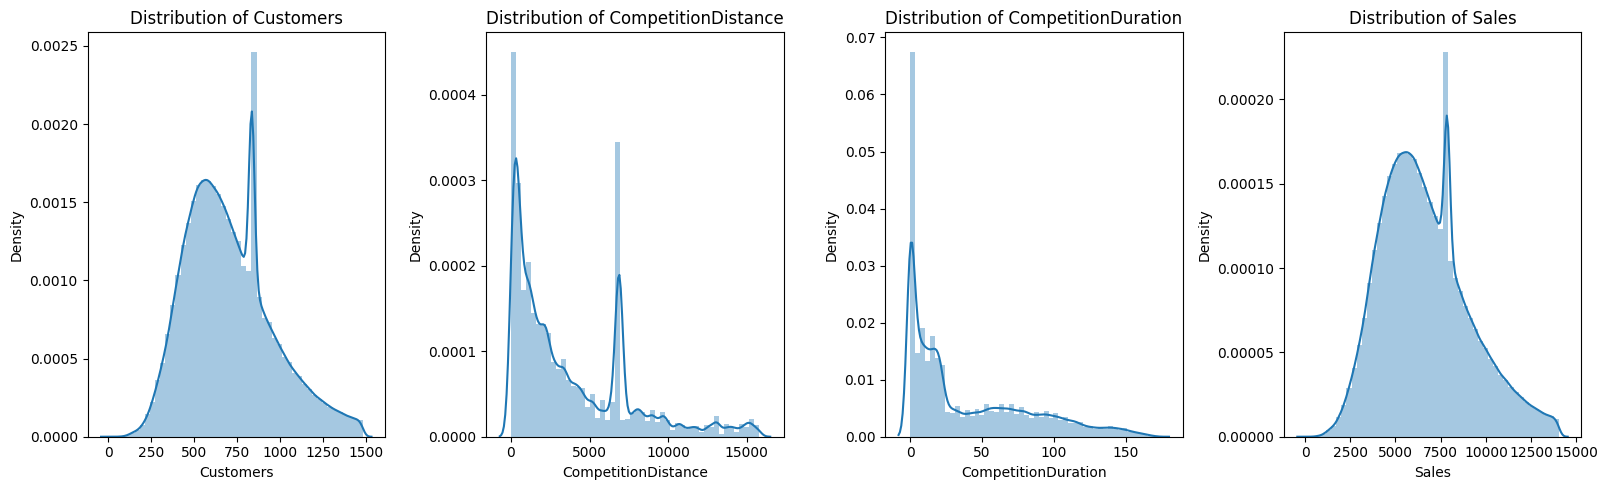

time: 21 s (started: 2023-06-12 17:10:54 +00:00)


In [96]:
# define the continuous feature (which unique value greater than 100)
continuous_features = ['Customers','CompetitionDistance','CompetitionDuration','Sales']
# Checking the distribution of each continuous feature
plt.figure(figsize= (20,5))
print('Before applying the transformation')
for index,column in enumerate(continuous_features):
  plt.subplot(1,5,index+1)
  sns.distplot(final_dataset[column])
  plt.title(f'Distribution of {column}')
  plt.tight_layout()

It is clearly show that the above plot is approxmetly normally distributed, So we have to apply those transform which get the normally distributed data so it is one of the most underlying assumption of the linear model such as Linear Regression.

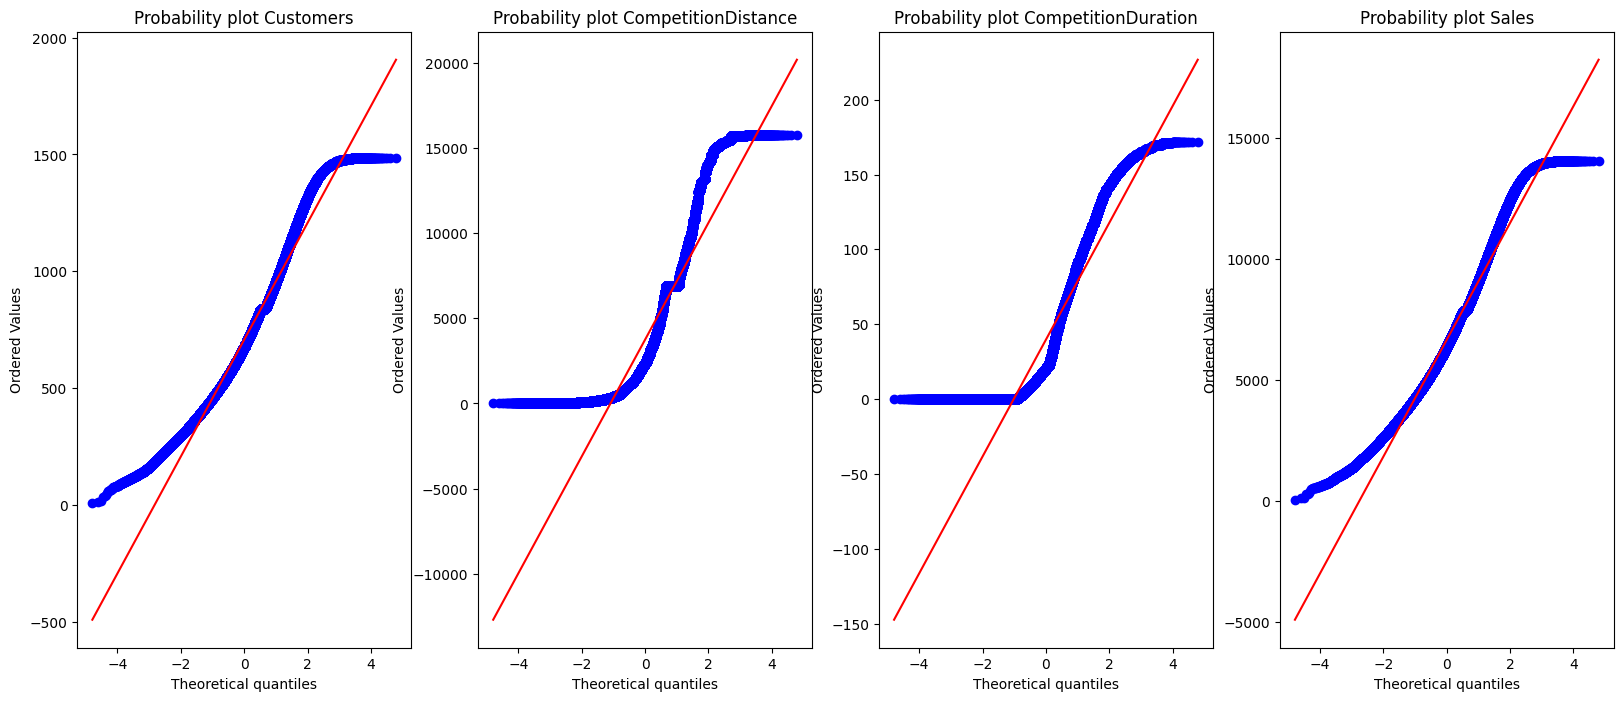

time: 9.41 s (started: 2023-06-12 17:11:15 +00:00)


In [97]:
# Import liberary for statics
import scipy.stats as stat
import pylab
# Q-Q ploting before transforming
plt.figure(figsize= (25,8))
for index,column in enumerate(continuous_features):
  plt.subplot(1,5,index+1)
  stat.probplot(final_dataset[column],dist= 'norm',plot= pylab)
  plt.title(f'Probability plot {column}')
plt.show()

As it is clear from above plots that our continous numeric features are not following perfectly normal distribution trend. So, now we will try various transformations techniques to get gaussian distributed curve.

In [98]:
# Copy the final dataset into test dataset
test_dataset1 = final_dataset.copy()
test_dataset2 = final_dataset.copy()
test_dataset3 = final_dataset.copy()
test_dataset4 = final_dataset.copy()
test_dataset5 = final_dataset.copy()

time: 86.2 ms (started: 2023-06-12 17:11:24 +00:00)


#### 1.Logrithmic Transform

In [99]:
# Transform Your data on the above continuous features
test_dataset1['Sales'] = np.log(test_dataset1['Sales'] + 1)
test_dataset1['CompetitionDuration'] = np.log(test_dataset1['CompetitionDuration'] + 1)
test_dataset1['Customers'] = np.log(test_dataset1['Customers'] + 1)
test_dataset1['CompetitionDistance'] = np.log(test_dataset1['CompetitionDistance'] + 1)

time: 96.8 ms (started: 2023-06-12 17:11:24 +00:00)


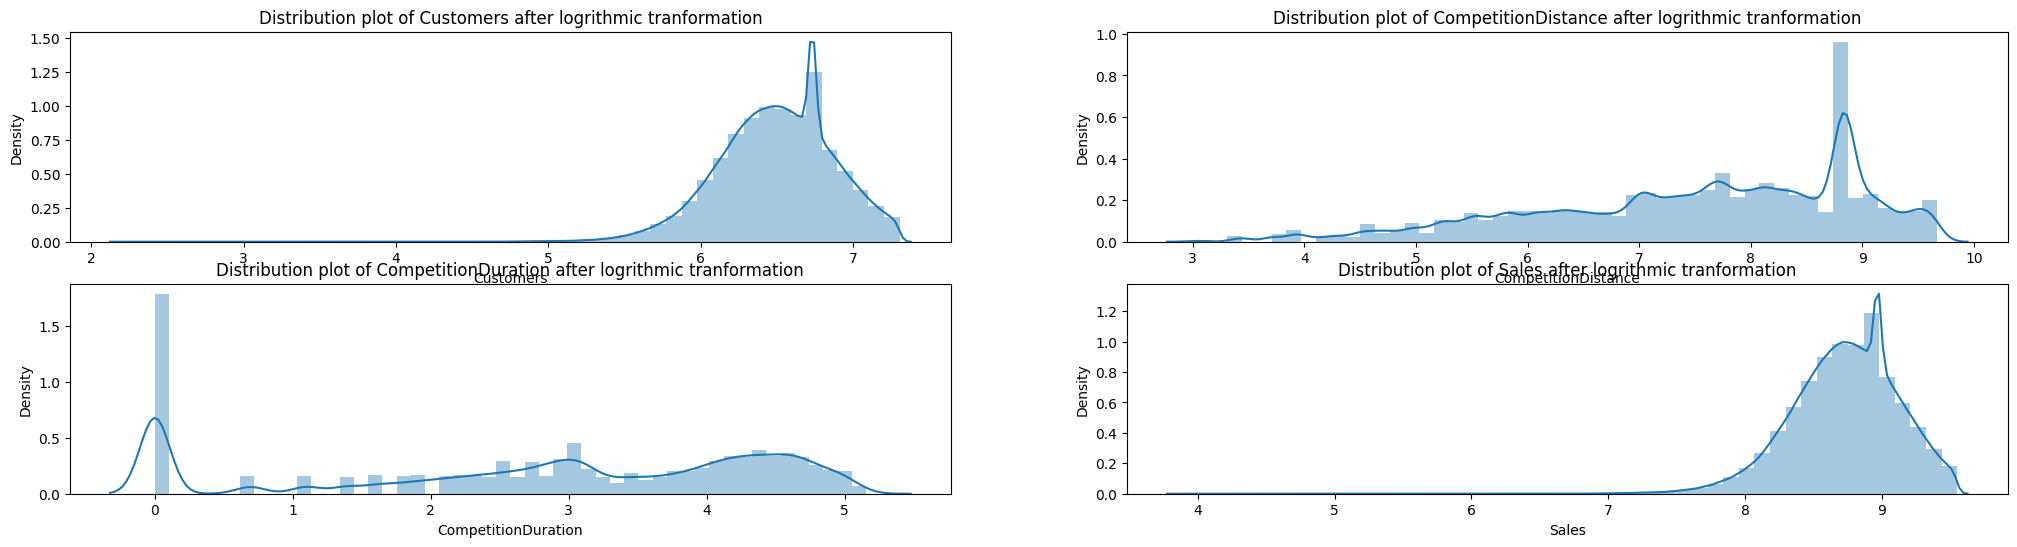

time: 15.9 s (started: 2023-06-12 17:11:25 +00:00)


In [100]:
 # Checking the distribution of each continous variable by excluding 0 from our final dataframe
 plt.figure(figsize= (25,6))
 for index,column in enumerate(continuous_features):
  plt.subplot(2,2,index+1)
  sns.distplot(test_dataset1[column])
  plt.title(f'Distribution plot of {column} after logrithmic tranformation')

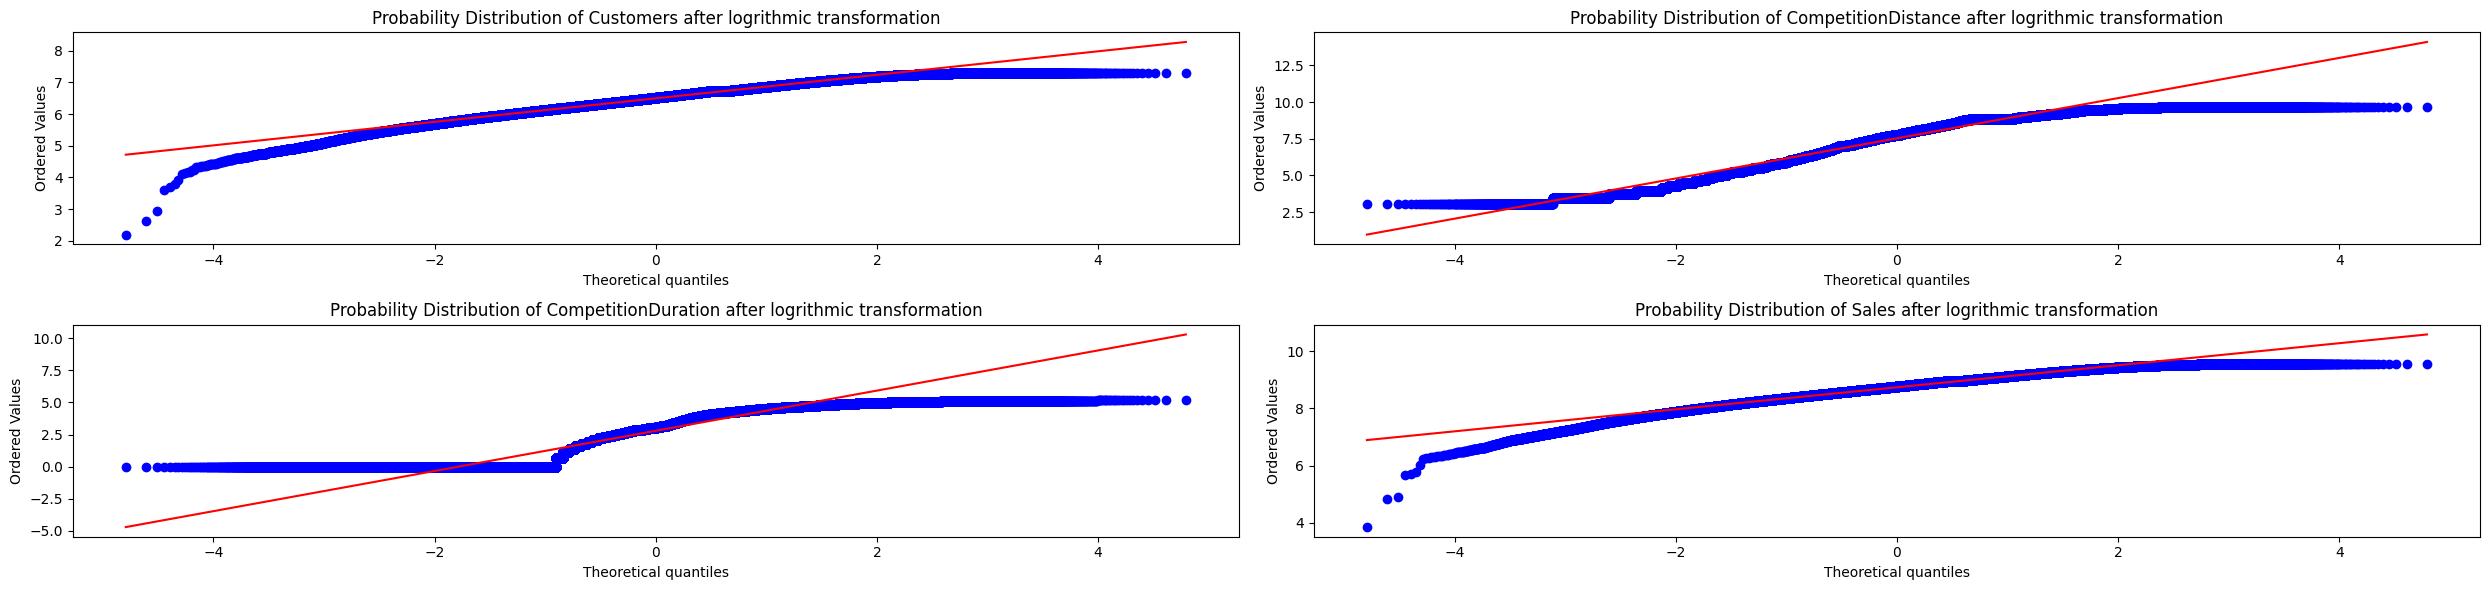

time: 14.5 s (started: 2023-06-12 17:11:41 +00:00)


In [101]:
 # Checking the distribution of each continous variable by excluding 0 from our final dataframe
 plt.figure(figsize= (25,6))
 for index,column in enumerate(continuous_features):
  plt.subplot(2,2,index+1)
  stat.probplot(test_dataset1[column],dist= 'norm',plot= pylab)
  plt.title(f'Probability Distribution of {column} after logrithmic transformation')
  plt.tight_layout()

#### 2.Exponent Transformation

In [102]:
# Transform Your data on the above continuous features
test_dataset2['Sales'] = (test_dataset2['Sales'] +1)**(test_dataset2['Sales'] +2)
test_dataset2['CompetitionDuration'] = (test_dataset2['CompetitionDuration']+1)**(test_dataset2['CompetitionDuration']+1)
test_dataset2['Customers'] = (test_dataset2['Customers']+1)**(test_dataset2['Customers']+1)
test_dataset2['CompetitionDistance'] = (test_dataset2['CompetitionDistance']+1)**(test_dataset2['CompetitionDistance']+1)

time: 130 ms (started: 2023-06-12 17:11:55 +00:00)


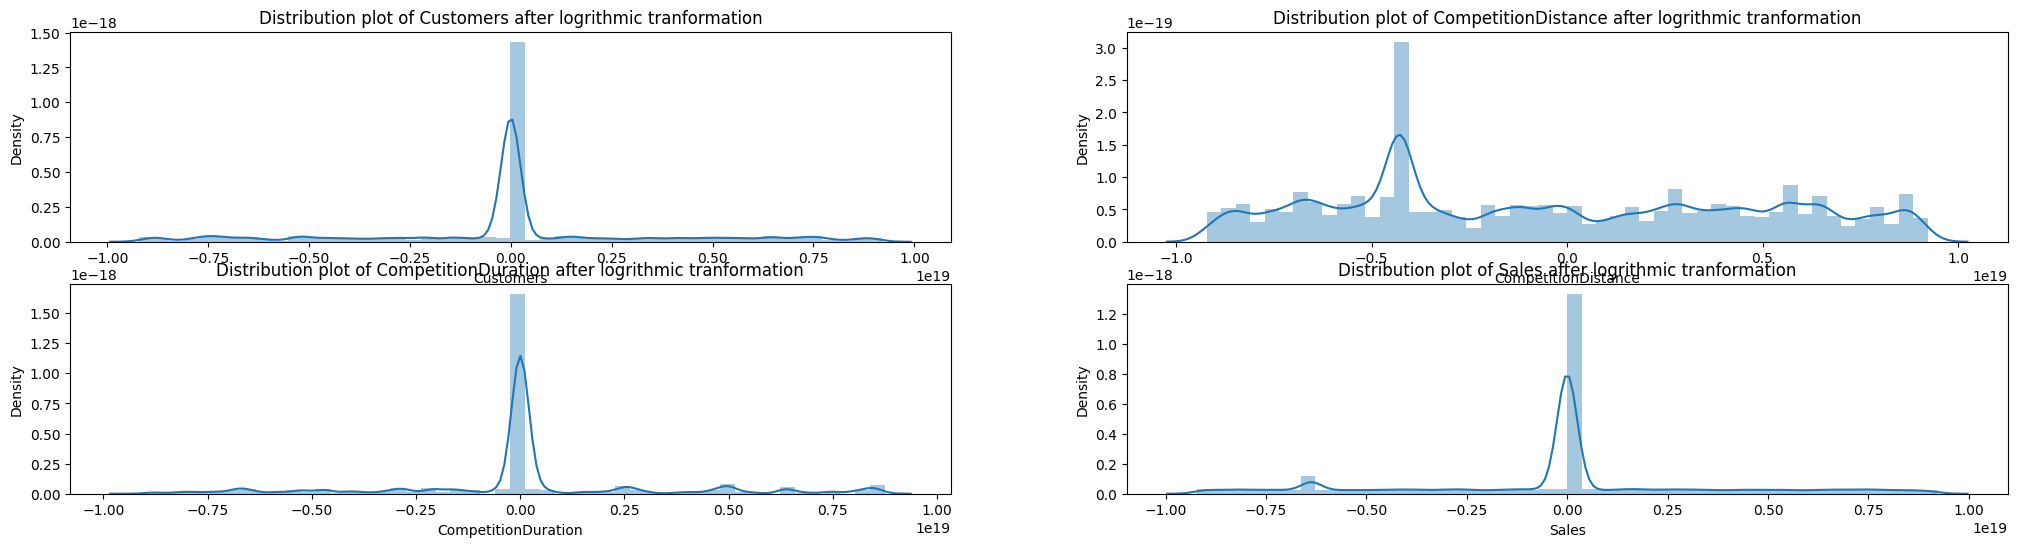

time: 14.6 s (started: 2023-06-12 17:11:55 +00:00)


In [103]:
 # Checking the distribution of each continous variable by excluding 0 from our final dataframe
 plt.figure(figsize= (25,6))
 for index,column in enumerate(continuous_features):
  plt.subplot(2,2,index+1)
  sns.distplot(test_dataset2[column])
  plt.title(f'Distribution plot of {column} after logrithmic tranformation')

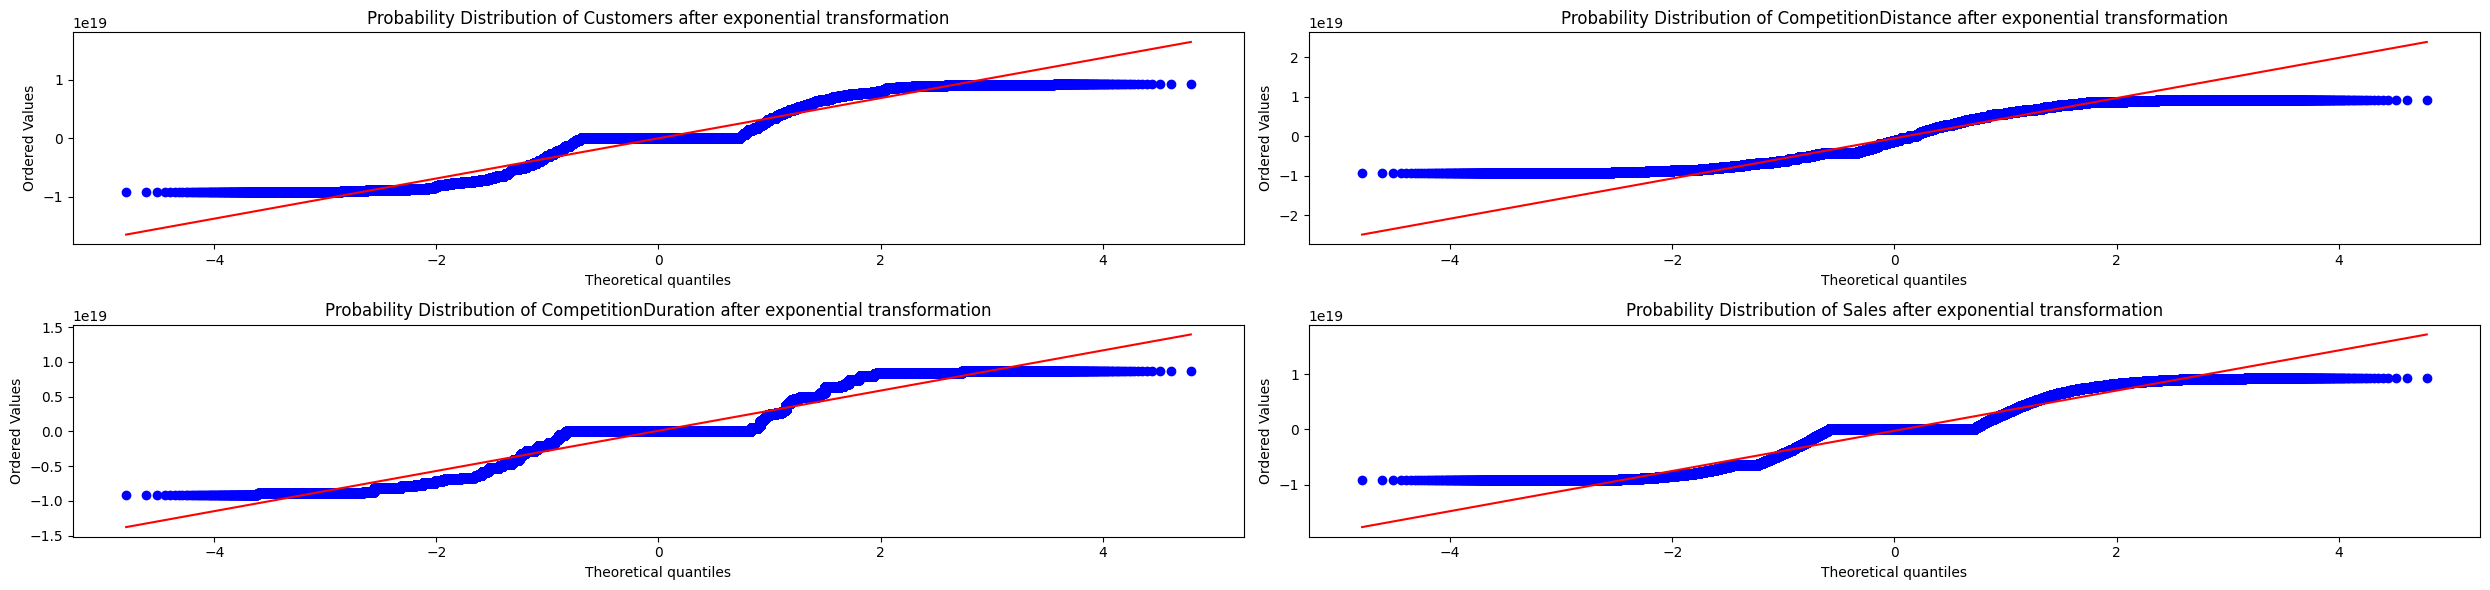

time: 12.4 s (started: 2023-06-12 17:12:10 +00:00)


In [104]:
 # Checking the distribution of each continous variable by excluding 0 from our final dataframe
 plt.figure(figsize= (25,6))
 for index,column in enumerate(continuous_features):
  plt.subplot(2,2,index+1)
  stat.probplot(test_dataset2[column],dist= 'norm',plot= pylab)
  plt.title(f'Probability Distribution of {column} after exponential transformation')
  plt.tight_layout()

#### 3. Square Root Transformation

In [105]:
# Transform Your data on the above continuous features
test_dataset3['Sales'] = (test_dataset3['Sales'])** 0.5
test_dataset3['CompetitionDuration'] = (test_dataset3['CompetitionDuration'])**0.5
test_dataset3['Customers'] = (test_dataset3['Customers'] + 1)**0.5
test_dataset3['CompetitionDistance'] = (test_dataset3['CompetitionDistance'])**0.5

time: 114 ms (started: 2023-06-12 17:12:22 +00:00)


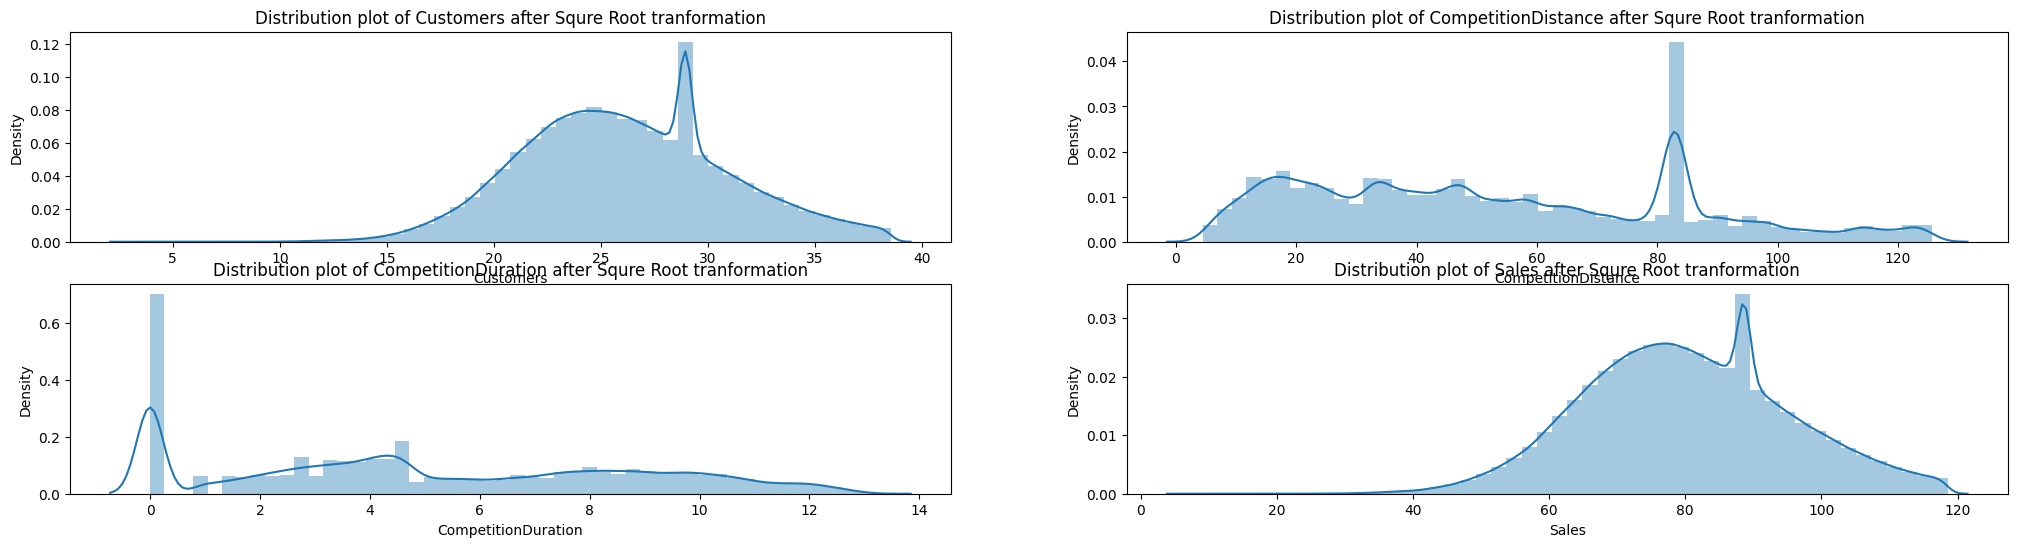

time: 13.5 s (started: 2023-06-12 17:12:22 +00:00)


In [106]:
 # Checking the distribution of each continous variable by excluding 0 from our final dataframe
 plt.figure(figsize= (25,6))
 for index,column in enumerate(continuous_features):
  plt.subplot(2,2,index+1)
  sns.distplot(test_dataset3[column])
  plt.title(f'Distribution plot of {column} after Squre Root tranformation')

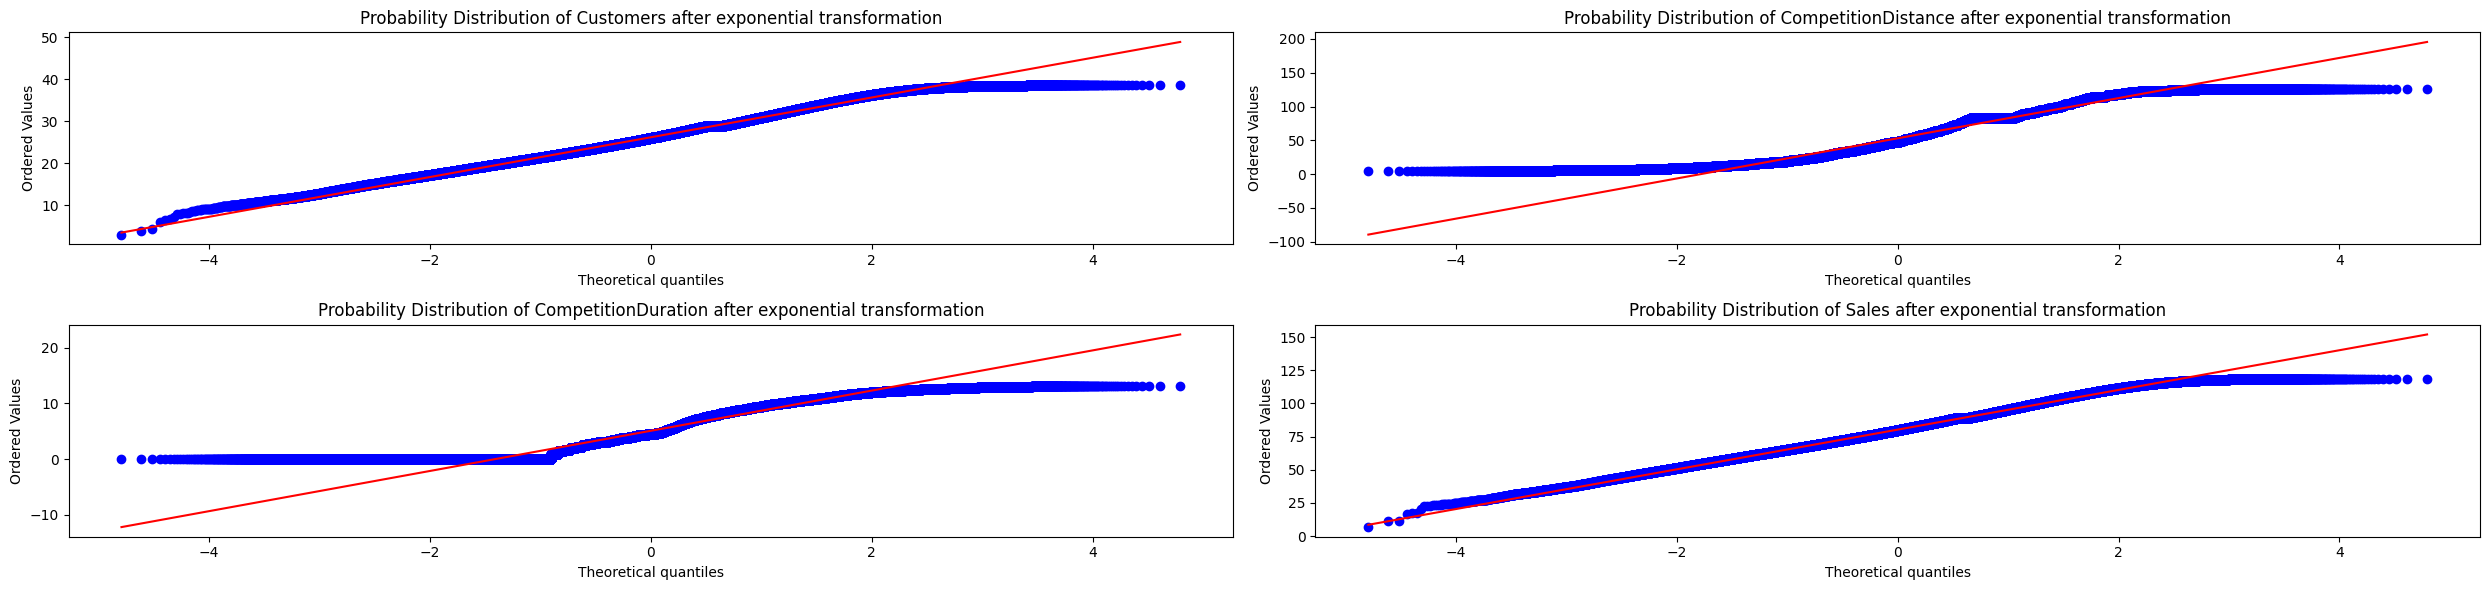

time: 15.4 s (started: 2023-06-12 17:12:36 +00:00)


In [107]:
 # Checking the distribution of each continous variable by excluding 0 from our final dataframe
 plt.figure(figsize= (25,6))
 for index,column in enumerate(continuous_features):
  plt.subplot(2,2,index+1)
  stat.probplot(test_dataset3[column],dist= 'norm',plot= pylab)
  plt.title(f'Probability Distribution of {column} after exponential transformation')
  plt.tight_layout()

#### 4.Reciprocal Transformation

In [108]:
# Transform Your data on the above continuous features
test_dataset4['Sales'] =1/(test_dataset4['Sales'] +1)
test_dataset4['CompetitionDuration'] = 1/(test_dataset4['CompetitionDuration']+1)
test_dataset4['Customers'] = 1/(test_dataset4['Customers'] + 1)
test_dataset4['CompetitionDistance'] = 1/(test_dataset4['CompetitionDistance']+1)

time: 53.3 ms (started: 2023-06-12 17:12:51 +00:00)


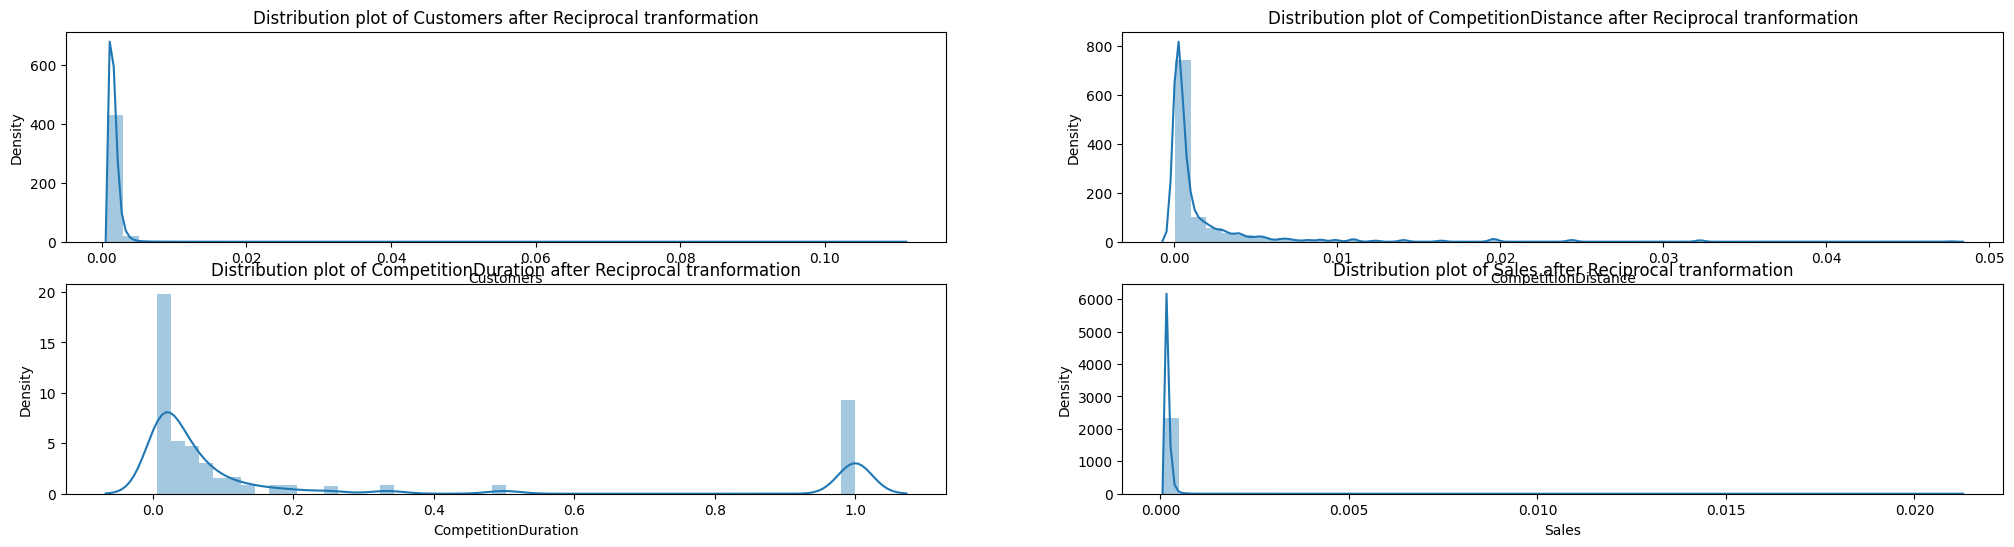

time: 28.7 s (started: 2023-06-12 17:12:51 +00:00)


In [109]:
1 # Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize= (25,6))
for index,column in enumerate(continuous_features):
  plt.subplot(2,2,index+1)
  sns.distplot(test_dataset4[column])
  plt.title(f'Distribution plot of {column} after Reciprocal tranformation')

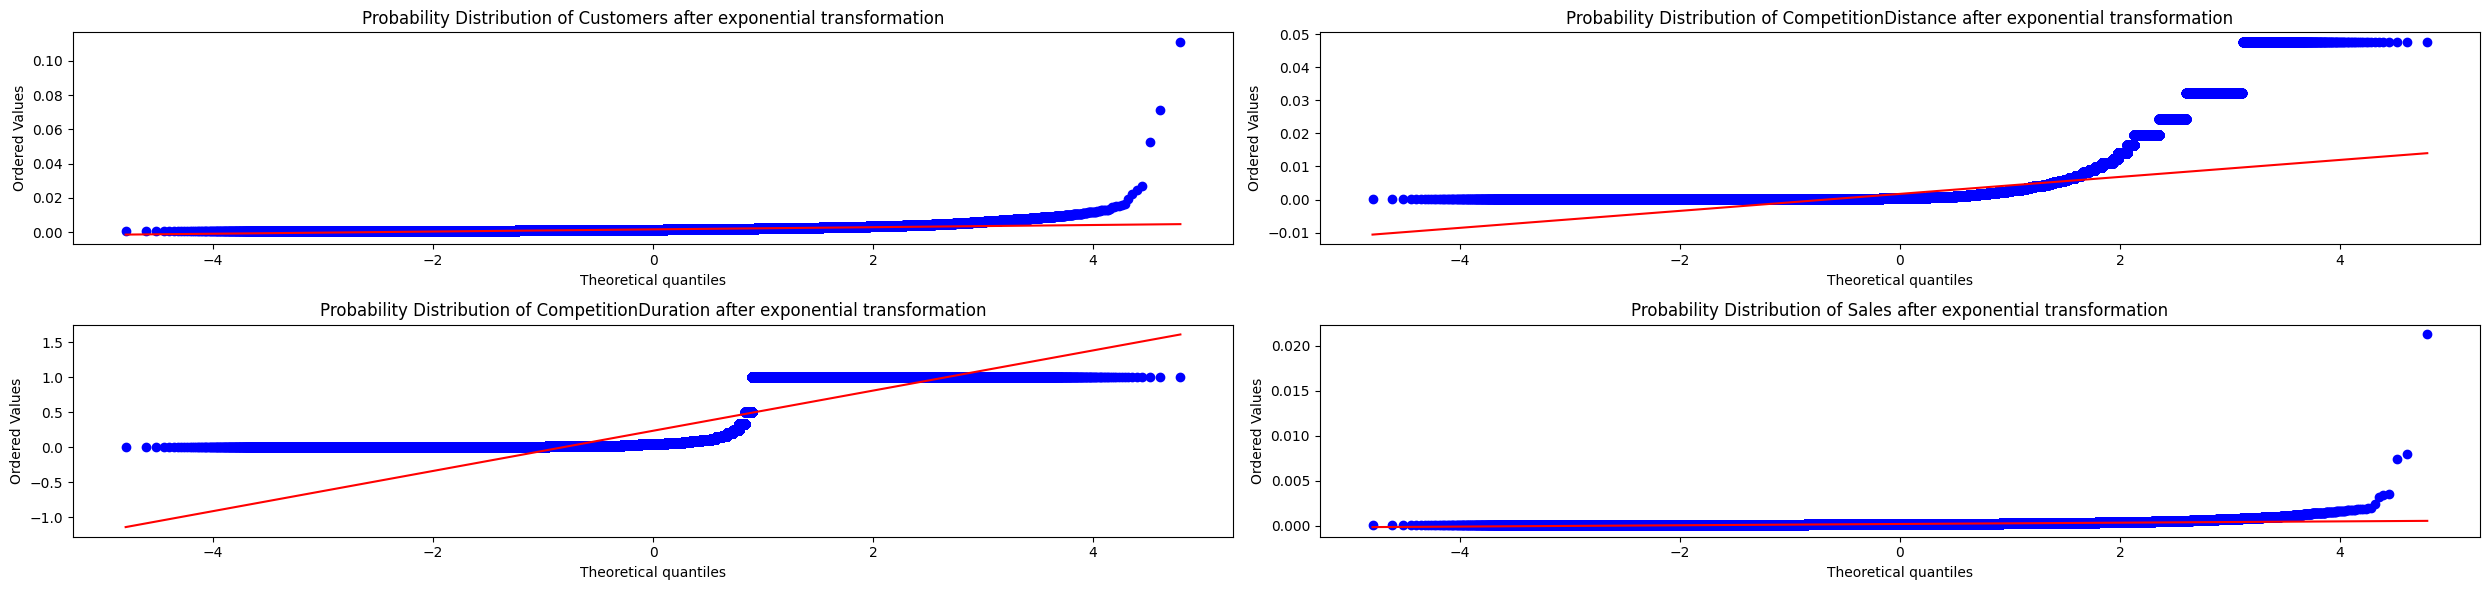

time: 20.8 s (started: 2023-06-12 17:13:20 +00:00)


In [110]:
 # Checking the distribution of each continous variable by excluding 0 from our final dataframe
 plt.figure(figsize= (25,6))
 for index,column in enumerate(continuous_features):
  plt.subplot(2,2,index+1)
  stat.probplot(test_dataset4[column],dist= 'norm',plot= pylab)
  plt.title(f'Probability Distribution of {column} after exponential transformation')
  plt.tight_layout()

#### 5. Box-cox Transformation

In [111]:
test_dataset5['Sales'] = (test_dataset5['Sales']*(10 **test_dataset5['Sales'])-1)/(test_dataset5['Sales']+1)
test_dataset5['Customers'] = (test_dataset5['Customers']*(10 **test_dataset5['Customers'])-1)/(test_dataset5['Customers']+1)
test_dataset5['CompetitionDistance'] = (test_dataset5['CompetitionDistance']*(10 **test_dataset5['CompetitionDistance'])-1)/(test_dataset5['CompetitionDistance']+1)
test_dataset5['CompetitionDuration'] = (test_dataset5['CompetitionDuration']*(10 **test_dataset5['CompetitionDuration'])-1)/(test_dataset5['CompetitionDuration']+1)

time: 212 ms (started: 2023-06-12 17:13:41 +00:00)


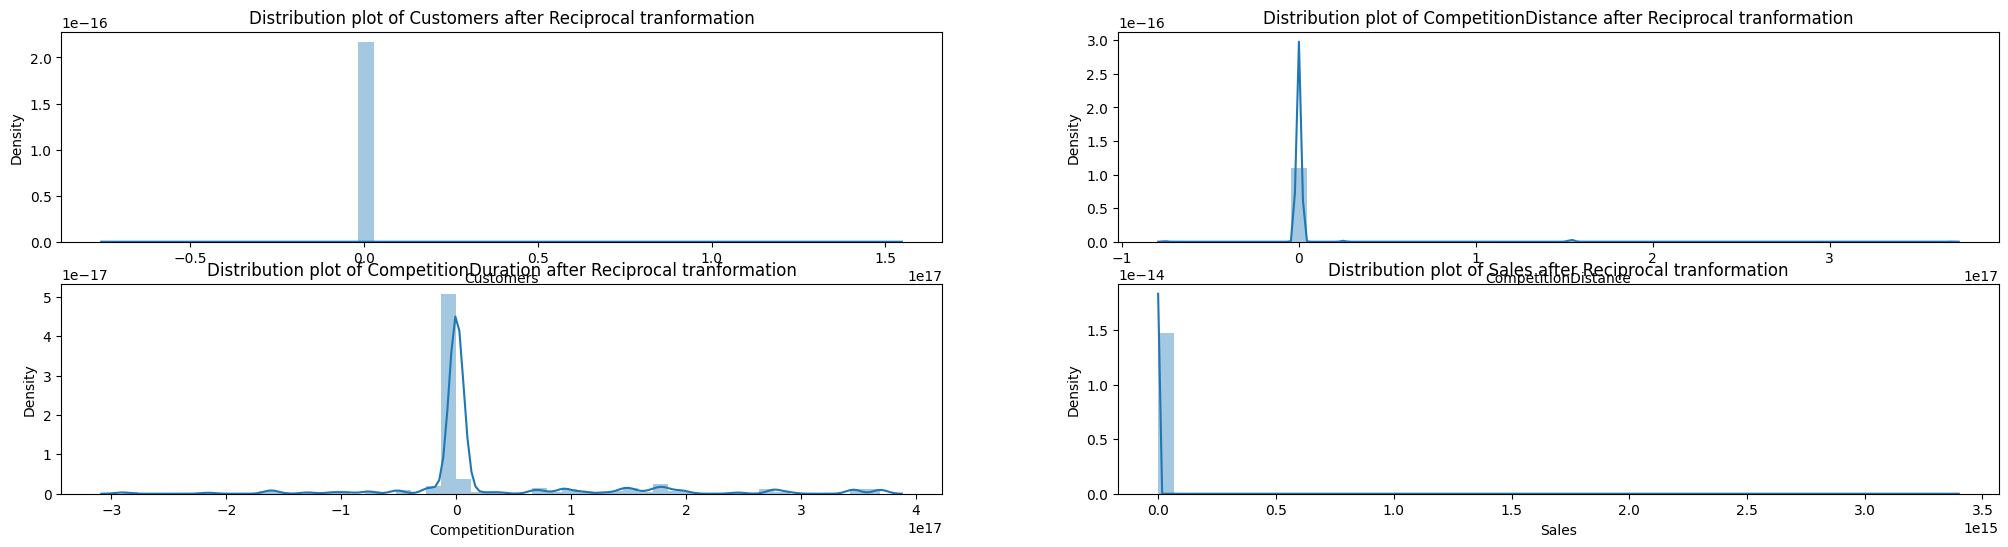

time: 22.5 s (started: 2023-06-12 17:13:41 +00:00)


In [112]:
 # Checking the distribution of each continous variable by excluding 0 from our final dataframe
 plt.figure(figsize= (25,6))
 for index,column in enumerate(continuous_features):
  plt.subplot(2,2,index+1)
  sns.distplot(test_dataset5[column])
  plt.title(f'Distribution plot of {column} after Reciprocal tranformation')

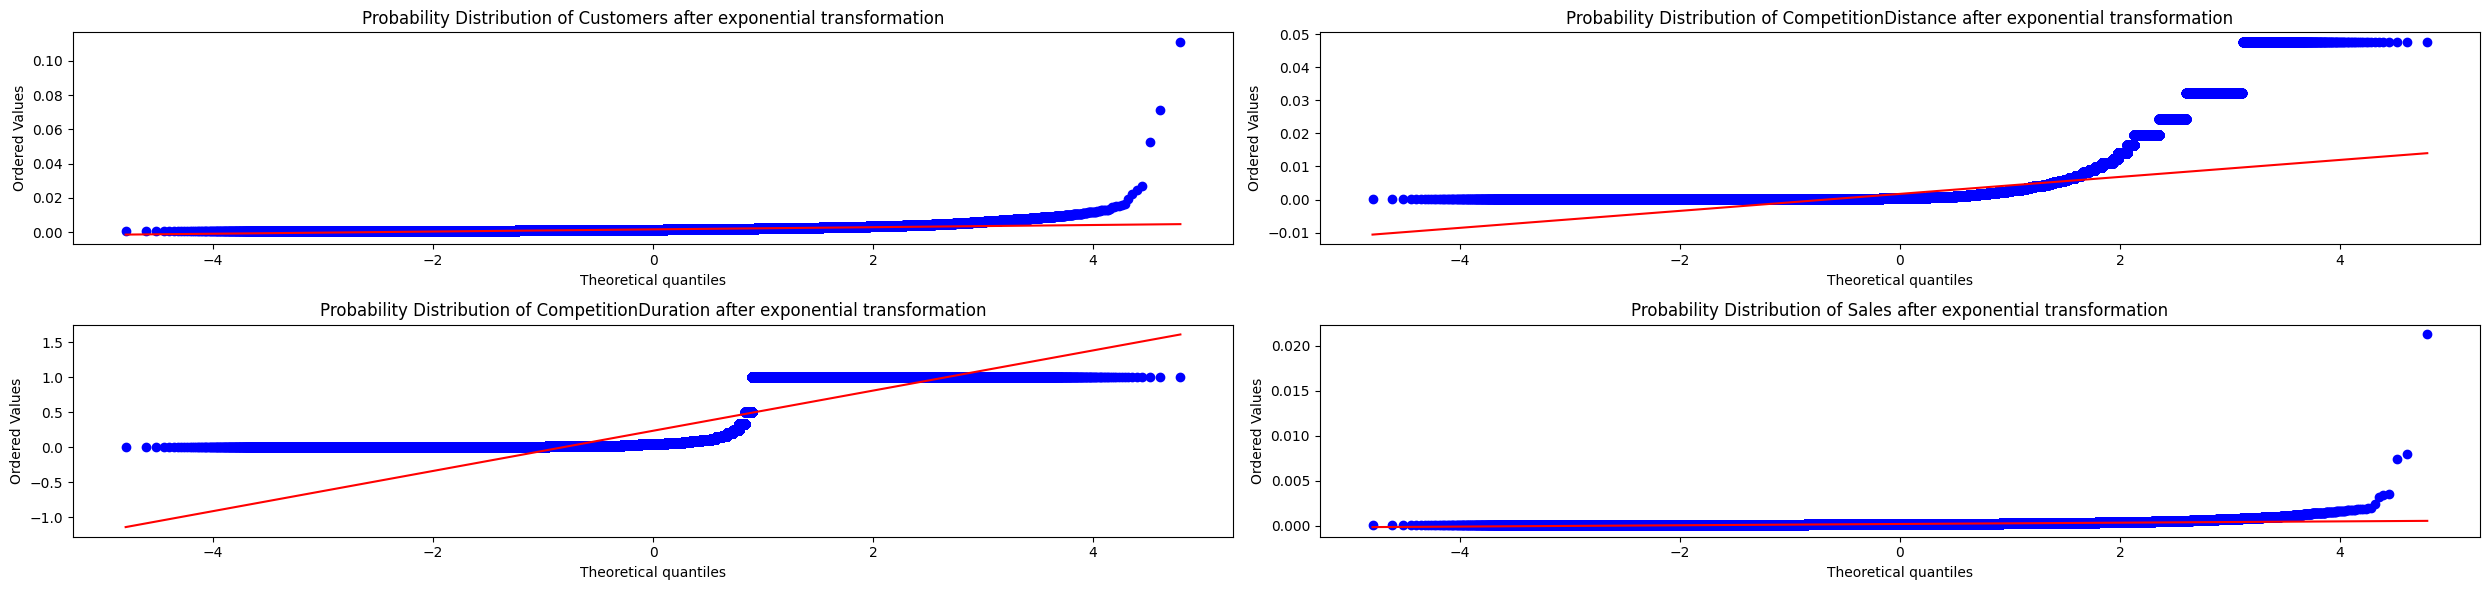

time: 16.1 s (started: 2023-06-12 17:14:04 +00:00)


In [113]:
# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize= (25,6))
for index,column in enumerate(continuous_features):
  plt.subplot(2,2,index+1)
  stat.probplot(test_dataset4[column],dist= 'norm',plot= pylab)
  plt.title(f'Probability Distribution of {column} after exponential transformation')
  plt.tight_layout()

From the above plots it is clear that:
1. Feature "Sales" needs square root transformation
2. Feature "Customers" needs square root transformation
3. Feature "CompetitionDistance" needs square root transformation
4. Feature "CompetitionDuration" no transformation needed

In [114]:
# Applying transformation on the above considered columns
## Square root transformation
final_dataset['Sales']=(final_dataset['Sales'])**1/2
final_dataset['Customers']=(final_dataset['Customers']+1)**1/2
final_dataset['CompetitionDistance']=(final_dataset['CompetitionDistance']+1)**1/2

time: 92.2 ms (started: 2023-06-12 17:14:20 +00:00)


### 6. Data Scaling

Split the final dataset into independent variables and dependent variables or target variable

In [115]:
# Separating "x" and "y" variables
x= final_dataset[["DayOfWeek", "Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day","CompetitionDuration"]]
y= final_dataset[['Sales']]
print(x.shape)
print(y.shape)

(844338, 15)
(844338, 1)
time: 32.6 ms (started: 2023-06-12 17:14:20 +00:00)


In [116]:
# Scaling your data
# Import Scaling liberary
from sklearn.preprocessing import StandardScaler

time: 382 µs (started: 2023-06-12 17:14:20 +00:00)


In [117]:
scaler = StandardScaler()

time: 411 µs (started: 2023-06-12 17:14:20 +00:00)


In [118]:
# fit and transform
x = scaler.fit_transform(x)

time: 211 ms (started: 2023-06-12 17:14:20 +00:00)


In [119]:
x.shape

(844338, 15)

time: 7.03 ms (started: 2023-06-12 17:14:20 +00:00)


##### Which method have you used to scale you data and why?

To scale our data, we used the StandardScaler liberary of the Sklearn toolkit.  We need to know this since features on various scales can result in poor performance or a slow convergence. The features' standardisation also facilitates the comparison of various characteristics and the observation of a feature's impact on the target variable ("Sales") by comparing the size of the feature's coefficient. Additionally, we'll use a linear regression model, which makes the statistical assumption that the data are normally distributed. Standardisation can assist enforce this model.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Need not required for this project

In [120]:
# DImensionality Reduction (If needed)
# Need not required for this project

time: 309 µs (started: 2023-06-12 17:14:20 +00:00)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Need not required for this project

### 8. Data Splitting

In [121]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Import the train test split liberary
from sklearn.model_selection import train_test_split

time: 381 µs (started: 2023-06-12 17:14:20 +00:00)


In [122]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20, random_state= 0)

time: 317 ms (started: 2023-06-12 17:14:20 +00:00)


In [123]:
# Shape of the train and test dataset
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((675470, 15), (168868, 15), (675470, 1), (168868, 1))

time: 3.79 ms (started: 2023-06-12 17:14:20 +00:00)


##### What data splitting ratio have you used and why? 

Since our dataset is large set of data having nearly 10lakh obsevations. So, We have assigned 80% data into train set and 20% into the test set with random_state=0 so that we do not get different observations in every split.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Not needed for that project

In [124]:
# Handling Imbalanced Dataset (If needed)
# Not Needed

time: 568 µs (started: 2023-06-12 17:14:20 +00:00)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Not Needed

## ***7. ML Model Implementation***

### ML Model - 1 (Linear Regression)

In [125]:
# Import Linear Regression liberary
from sklearn.linear_model import LinearRegression

time: 33.1 ms (started: 2023-06-12 17:15:22 +00:00)


In [126]:
# ML Model - 1 Implementation
regressor = LinearRegression()

# Fit the Algorithm
regressor.fit(x_train,y_train)

LinearRegression()

time: 273 ms (started: 2023-06-12 17:15:22 +00:00)


In [127]:
regressor.intercept_

array([3330.2107569])

time: 2.72 ms (started: 2023-06-12 17:15:22 +00:00)


In [128]:
# Linear Regression Coefficient
regressor.coef_

array([[ -6.25781621, 963.69451916, 245.04862582,  -2.07085763,
         10.01345958, 107.32501356,  77.42879058,  25.16771835,
        -26.30768427, 212.31490198,  73.80022708, -23.22312898,
        -43.38158705,   1.91697035,  21.74161025]])

time: 6.24 ms (started: 2023-06-12 17:15:22 +00:00)


In [129]:
# Predict on the model
y_train_regression_predict = regressor.predict(x_train)
y_test_regression_predict = regressor.predict(x_test)

time: 20.1 ms (started: 2023-06-12 17:15:22 +00:00)


In [130]:
regressor.intercept_

array([3330.2107569])

time: 4.87 ms (started: 2023-06-12 17:15:22 +00:00)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [131]:
# Import liberary
from sklearn.metrics import r2_score
from sklearn.metrics  import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

time: 454 µs (started: 2023-06-12 17:15:22 +00:00)


In [132]:
# Visualizing evaluation Metric Score chart
# Calculation of r2_Score
r2_train = r2_score(y_train,y_train_regression_predict)
r2_test = r2_score(y_test,y_test_regression_predict)
print('r2_score of the training data:',round(r2_train,2))
print('r2_score of the test data:',round(r2_test,2))
print('\n')
# Calculation of Adjusted r2 Score of training data
n_train = len(x_train)
p_train = x_train.shape[1]
n_test = len(x_test)
p_test = x_test.shape[1]
adjusted_r2_score_train = 1-(1-r2_train)*(n_train-1)/(n_train-p_train-1)
adjusted_r2_score_test = 1-(1-r2_test)*(n_test-1)/(n_test-p_test-1)
print('Adjusted r2 score of the training data:',round(adjusted_r2_score_train,2)) 
print('Adjusted r2 score of the training data:',round(adjusted_r2_score_test,2)) 
print('\n')
# Calculation of Mean Squared Error
mse_train = mean_squared_error(y_train,y_train_regression_predict)
mse_test = mean_squared_error(y_test,y_test_regression_predict)
print('Mean Squared Error of the training data:',round(mse_train,2))
print('Mean Squared Error of the test data:',round(mse_test,2))
print('\n')
# calculation of Root Mean Squared Error
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Root Mean Squared Error of the training data:',round(rmse_train,2))
print('Root Mean Squared Error of the test data:',round(rmse_test,2))
print('\n')
# Calculation of Mean Absolute Error
mae_train = mean_absolute_error(y_train,y_train_regression_predict)
mae_test = mean_absolute_error(y_test,y_test_regression_predict)
print('Mean Absolute Error of the training data:',round(mae_train,2))
print('Mean Absolute Error of the test data:',round(mae_test,2))
print('\n')
# Calculation of Mean Absolute Error
mape_train = 100 * mean_absolute_percentage_error(y_train,y_train_regression_predict)
mape_test = 100 * mean_absolute_percentage_error(y_test,y_test_regression_predict)
print('Mean Absolute Percentage Error of the training data:',round(mape_train,2),'%')
print('Mean Absolute Percentage Error of the test data:',round(mape_test,2),'%')
print('\n')
# Calculation of Accuracy Score
accuracy_train = 100 - mape_train
accuracy_test = 100 - mape_test
print('Accuracy Score of the training data:',round(accuracy_train,2),'%')
print('Accuracy Score of the test data:',round(accuracy_test,2),'%')
print('\n')


r2_score of the training data: 0.7
r2_score of the test data: 0.7


Adjusted r2 score of the training data: 0.7
Adjusted r2 score of the training data: 0.7


Mean Squared Error of the training data: 452630.64
Mean Squared Error of the test data: 452708.13


Root Mean Squared Error of the training data: 672.78
Root Mean Squared Error of the test data: 672.84


Mean Absolute Error of the training data: 474.72
Mean Absolute Error of the test data: 474.42


Mean Absolute Percentage Error of the training data: 14.73 %
Mean Absolute Percentage Error of the test data: 14.75 %


Accuracy Score of the training data: 85.27 %
Accuracy Score of the test data: 85.25 %


time: 38.6 ms (started: 2023-06-12 17:15:22 +00:00)


Sales   -0.68
dtype: float64 
 -62.17


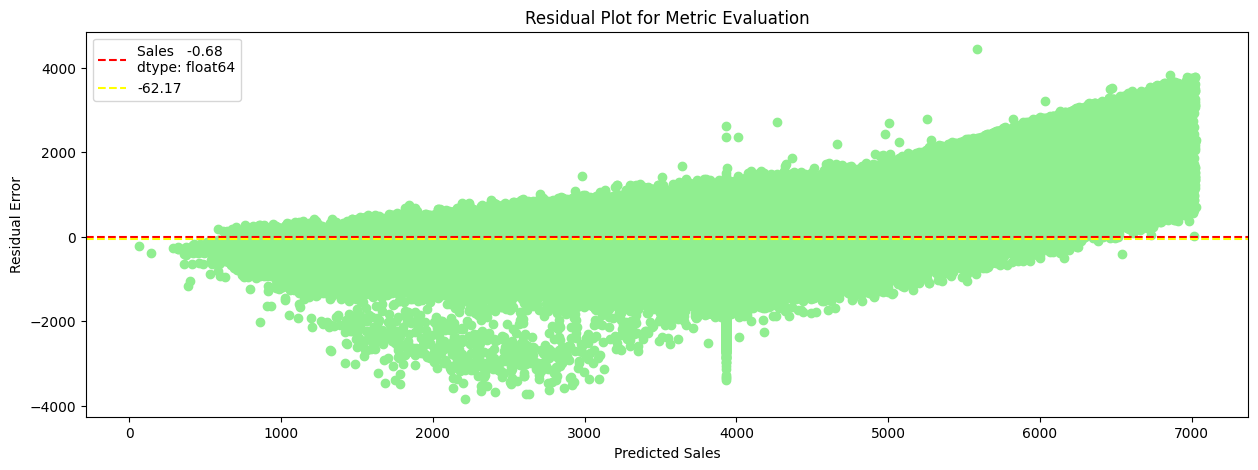

time: 1.29 s (started: 2023-06-12 17:15:22 +00:00)


In [133]:
# Metrics visulazation
residuals = y_test - y_test_regression_predict
mean = round((np.mean(residuals)),2)
median = round(np.median(residuals),2)
print(mean,'\n',median)
# Plot residuals
plt.figure(figsize=(15,5))
plt.scatter(y_test, residuals, c='lightgreen')
plt.title('Residual Plot for Metric Evaluation')
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')
# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--', label=mean)
plt.axhline(y=np.nanmedian(residuals), color='yellow', linestyle='--', label=median)
plt.legend()

plt.show()

We have to implement the very basic linear model that is Linear Regression(LR). We have to evaluate the most important rehression metrics which have to conclude in implemention of ML model. For linear regression, we can found that both the r2 are pretty close which explain that on test dataset. \

We can comprehend that 'dependent' and 'independent' variables are not much following direct linear relationship with each other thats why we got 0.70 maximum r2 score in LR model implementation.

Also we are getting the **Mean= -0.68** and **Median= -62.17** in our residual plot that resembles our predictions are closely following Normal Distribution (Mean=Median=0) because of this our accuracy **(100-MAPE)** is pretty good in simple linear model.

In order to fetch good and more accurate results, we shall go for cross- Validation & Hyperparameter Tuning of 'Lasso', 'Ridge' and 'Elastic Net' models.

#### 2. Cross- Validation & Hyperparameter Tuning

Ridge Regression

In [134]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
ridge= Ridge()

# Defining parameters
parameters = {"alpha": [1e-5,1e-4,1e-3,1e-2,1e-1,1,5,7,10,11,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29], "max_iter":[1,2,3]}

# Train the model
ridgeR = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridgeR.fit(x_train,y_train)

# Predict the output
y_train_ridge_predict = ridgeR.predict(x_train)
y_test_ridge_predict = ridgeR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {ridgeR.best_params_}")
print(f"Negative mean square error is: {ridgeR.best_score_}")

The best alpha value found out to be: {'alpha': 5, 'max_iter': 1}
Negative mean square error is: -452656.27649033646
time: 25.2 s (started: 2023-06-12 17:15:23 +00:00)


In [135]:
# Visualizing evaluation Metric Score chart
# Calculation of r2_Score
r2_train = r2_score(y_train,y_train_ridge_predict)
r2_test = r2_score(y_test,y_test_ridge_predict)
print('r2_score of the training data:',round(r2_train,2))
print('r2_score of the test data:',round(r2_test,2))
print('\n')
# Calculation of Adjusted r2 Score of training data
n_train = len(x_train)
p_train = x_train.shape[1]
n_test = len(x_test)
p_test = x_test.shape[1]
adjusted_r2_score_train = 1-(1-r2_train)*(n_train-1)/(n_train-p_train-1)
adjusted_r2_score_test = 1-(1-r2_test)*(n_test-1)/(n_test-p_test-1)
print('Adjusted r2 score of the training data:',round(adjusted_r2_score_train,2)) 
print('Adjusted r2 score of the training data:',round(adjusted_r2_score_test,2)) 
print('\n')
# Calculation of Mean Squared Error
mse_train = mean_squared_error(y_train,y_train_ridge_predict)
mse_test = mean_squared_error(y_test,y_test_ridge_predict)
print('Mean Squared Error of the training data:',round(mse_train,2))
print('Mean Squared Error of the test data:',round(mse_test,2))
print('\n')
# calculation of Root Mean Squared Error
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Root Mean Squared Error of the training data:',round(rmse_train,2))
print('Root Mean Squared Error of the test data:',round(rmse_test,2))
print('\n')
# Calculation of Mean Absolute Error
mae_train = mean_absolute_error(y_train,y_train_ridge_predict)
mae_test = mean_absolute_error(y_test,y_test_ridge_predict)
print('Mean Absolute Error of the training data:',round(mae_train,2))
print('Mean Absolute Error of the test data:',round(mae_test,2))
print('\n')
# Calculation of Mean Absolute Error
mape_train = 100 * mean_absolute_percentage_error(y_train,y_train_ridge_predict)
mape_test = 100 * mean_absolute_percentage_error(y_test,y_test_ridge_predict)
print('Mean Absolute Percentage Error of the training data:',round(mape_train,2),'%')
print('Mean Absolute Percentage Error of the test data:',round(mape_test,2),'%')
print('\n')
# Calculation of Accuracy Score
accuracy_train = 100 - mape_train
accuracy_test = 100 - mape_test
print('Accuracy Score of the training data:',round(accuracy_train,2),'%')
print('Accuracy Score of the test data:',round(accuracy_test,2),'%')
print('\n')


r2_score of the training data: 0.7
r2_score of the test data: 0.7


Adjusted r2 score of the training data: 0.7
Adjusted r2 score of the training data: 0.7


Mean Squared Error of the training data: 452630.64
Mean Squared Error of the test data: 452708.14


Root Mean Squared Error of the training data: 672.78
Root Mean Squared Error of the test data: 672.84


Mean Absolute Error of the training data: 474.73
Mean Absolute Error of the test data: 474.42


Mean Absolute Percentage Error of the training data: 14.73 %
Mean Absolute Percentage Error of the test data: 14.75 %


Accuracy Score of the training data: 85.27 %
Accuracy Score of the test data: 85.25 %


time: 42.6 ms (started: 2023-06-12 17:15:49 +00:00)


Lasso Regression

In [136]:
# import ridge regression from sklearn library
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
lasso= Lasso()

# Defining parameters
parameters_lasso = {"alpha": [1e-5,1e-4,1e-3,1e-2,1e-1,1,5,7,10,11,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29], "max_iter":[1,2,3]}

# Train the model
lassoR = GridSearchCV(lasso, parameters_lasso, scoring='neg_mean_squared_error', cv=3)
lassoR.fit(x_train,y_train)

# Predict the output
y_train_lasso_predict = lassoR.predict(x_train)
y_test_lasso_predict =  lassoR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lassoR.best_params_}")
print(f"Negative mean square error is: {lassoR.best_score_}")

The best alpha value found out to be: {'alpha': 0.1, 'max_iter': 3}
Negative mean square error is: -452699.07826689654
time: 37.5 s (started: 2023-06-12 17:15:49 +00:00)


In [137]:
# Visualizing evaluation Metric Score chart
# Calculation of r2_Score
r2_train = r2_score(y_train,y_train_lasso_predict)
r2_test = r2_score(y_test,y_test_lasso_predict)
print('r2_score of the training data:',round(r2_train,2))
print('r2_score of the test data:',round(r2_test,2))
print('\n')
# Calculation of Adjusted r2 Score of training data
n_train = len(x_train)
p_train = x_train.shape[1]
n_test = len(x_test)
p_test = x_test.shape[1]
adjusted_r2_score_train = 1-(1-r2_train)*(n_train-1)/(n_train-p_train-1)
adjusted_r2_score_test = 1-(1-r2_test)*(n_test-1)/(n_test-p_test-1)
print('Adjusted r2 score of the training data:',round(adjusted_r2_score_train,2)) 
print('Adjusted r2 score of the training data:',round(adjusted_r2_score_test,2)) 
print('\n')
# Calculation of Mean Squared Error
mse_train = mean_squared_error(y_train,y_train_lasso_predict)
mse_test = mean_squared_error(y_test,y_test_lasso_predict)
print('Mean Squared Error of the training data:',round(mse_train,2))
print('Mean Squared Error of the test data:',round(mse_test,2))
print('\n')
# calculation of Root Mean Squared Error
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Root Mean Squared Error of the training data:',round(rmse_train,2))
print('Root Mean Squared Error of the test data:',round(rmse_test,2))
print('\n')
# Calculation of Mean Absolute Error
mae_train = mean_absolute_error(y_train,y_train_lasso_predict)
mae_test = mean_absolute_error(y_test,y_test_lasso_predict)
print('Mean Absolute Error of the training data:',round(mae_train,2))
print('Mean Absolute Error of the test data:',round(mae_test,2))
print('\n')
# Calculation of Mean Absolute Error
mape_train = 100 * mean_absolute_percentage_error(y_train,y_train_lasso_predict)
mape_test = 100 * mean_absolute_percentage_error(y_test,y_test_lasso_predict)
print('Mean Absolute Percentage Error of the training data:',round(mape_train,2),'%')
print('Mean Absolute Percentage Error of the test data:',round(mape_test,2),'%')
print('\n')
# Calculation of Accuracy Score
accuracy_train = 100 - mape_train
accuracy_test = 100 - mape_test
print('Accuracy Score of the training data:',round(accuracy_train,2),'%')
print('Accuracy Score of the test data:',round(accuracy_test,2),'%')
print('\n')


r2_score of the training data: 0.7
r2_score of the test data: 0.7


Adjusted r2 score of the training data: 0.7
Adjusted r2 score of the training data: 0.7


Mean Squared Error of the training data: 452673.4
Mean Squared Error of the test data: 452766.08


Root Mean Squared Error of the training data: 672.81
Root Mean Squared Error of the test data: 672.88


Mean Absolute Error of the training data: 474.43
Mean Absolute Error of the test data: 474.13


Mean Absolute Percentage Error of the training data: 14.7 %
Mean Absolute Percentage Error of the test data: 14.72 %


Accuracy Score of the training data: 85.3 %
Accuracy Score of the test data: 85.28 %


time: 64.1 ms (started: 2023-06-12 17:16:26 +00:00)


Elastic net regression

In [138]:
# import ridge regression from sklearn library
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
elastic_net= ElasticNet()

# Defining parameters
parameters_elastic_net = {"alpha": [1e-5,1e-4,1e-3,1e-2,1e-1,1,5,7,10,11,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29], "max_iter":[1,2,3]}

# Train the model
elastic_netR = GridSearchCV(lasso, parameters_elastic_net, scoring='neg_mean_squared_error', cv=3)
elastic_netR.fit(x_train,y_train)

# Predict the output
y_train_elastic_net_predict = elastic_netR.predict(x_train)
y_test_elastic_net_predict =  elastic_netR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {elastic_netR.best_params_}")
print(f"Negative mean square error is: {elastic_netR.best_score_}")

The best alpha value found out to be: {'alpha': 0.1, 'max_iter': 3}
Negative mean square error is: -452699.07826689654
time: 36.4 s (started: 2023-06-12 17:16:26 +00:00)


In [139]:
# Visualizing evaluation Metric Score chart
# Calculation of r2_Score
r2_train = r2_score(y_train,y_train_elastic_net_predict)
r2_test = r2_score(y_test,y_test_elastic_net_predict)
print('r2_score of the training data:',round(r2_train,2))
print('r2_score of the test data:',round(r2_test,2))
print('\n')
# Calculation of Adjusted r2 Score of training data
n_train = len(x_train)
p_train = x_train.shape[1]
n_test = len(x_test)
p_test = x_test.shape[1]
adjusted_r2_score_train = 1-(1-r2_train)*(n_train-1)/(n_train-p_train-1)
adjusted_r2_score_test = 1-(1-r2_test)*(n_test-1)/(n_test-p_test-1)
print('Adjusted r2 score of the training data:',round(adjusted_r2_score_train,2)) 
print('Adjusted r2 score of the training data:',round(adjusted_r2_score_test,2)) 
print('\n')
# Calculation of Mean Squared Error
mse_train = mean_squared_error(y_train,y_train_elastic_net_predict)
mse_test = mean_squared_error(y_test,y_test_elastic_net_predict)
print('Mean Squared Error of the training data:',round(mse_train,2))
print('Mean Squared Error of the test data:',round(mse_test,2))
print('\n')
# calculation of Root Mean Squared Error
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Root Mean Squared Error of the training data:',round(rmse_train,2))
print('Root Mean Squared Error of the test data:',round(rmse_test,2))
print('\n')
# Calculation of Mean Absolute Error
mae_train = mean_absolute_error(y_train,y_train_elastic_net_predict)
mae_test = mean_absolute_error(y_test,y_test_elastic_net_predict)
print('Mean Absolute Error of the training data:',round(mae_train,2))
print('Mean Absolute Error of the test data:',round(mae_test,2))
print('\n')
# Calculation of Mean Absolute Error
mape_train = 100 * mean_absolute_percentage_error(y_train,y_train_elastic_net_predict)
mape_test = 100 * mean_absolute_percentage_error(y_test,y_test_elastic_net_predict)
print('Mean Absolute Percentage Error of the training data:',round(mape_train,2),'%')
print('Mean Absolute Percentage Error of the test data:',round(mape_test,2),'%')
print('\n')
# Calculation of Accuracy Score
accuracy_train = 100 - mape_train
accuracy_test = 100 - mape_test
print('Accuracy Score of the training data:',round(accuracy_train,2),'%')
print('Accuracy Score of the test data:',round(accuracy_test,2),'%')
print('\n')


r2_score of the training data: 0.7
r2_score of the test data: 0.7


Adjusted r2 score of the training data: 0.7
Adjusted r2 score of the training data: 0.7


Mean Squared Error of the training data: 452673.4
Mean Squared Error of the test data: 452766.08


Root Mean Squared Error of the training data: 672.81
Root Mean Squared Error of the test data: 672.88


Mean Absolute Error of the training data: 474.43
Mean Absolute Error of the test data: 474.13


Mean Absolute Percentage Error of the training data: 14.7 %
Mean Absolute Percentage Error of the test data: 14.72 %


Accuracy Score of the training data: 85.3 %
Accuracy Score of the test data: 85.28 %


time: 79.4 ms (started: 2023-06-12 17:17:03 +00:00)


##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Despite using Lasso, Ridge and Elastic net models, we couldn't see any significant improvement in the r2 score, MSE and on MAPE as well. This provoked us to go for higher and more complex ML models like Decision trees, Random Forest, XGBoost Regression and LightGBM Regression.

### ML Model - 2 (Decision Tree)

In [159]:
# import Decision Tree regression liberary
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from IPython.display import SVG
from IPython.display import display
from graphviz import Source
from sklearn.tree import plot_tree

time: 878 µs (started: 2023-06-12 17:49:37 +00:00)


In [160]:
# ML model - 2 Implementation
DT_regressor = DecisionTreeRegressor(max_depth= 20)
DT_regressor.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=20)

time: 3.72 s (started: 2023-06-12 17:49:37 +00:00)


In [161]:
# Predict the model
y_train_DT_regressor_predict = DT_regressor.predict(x_train)
y_test_DT_regressor_predict = DT_regressor.predict(x_test)

time: 284 ms (started: 2023-06-12 17:49:41 +00:00)


In [162]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart
# Calculation of r2_Score
r2_train = r2_score(y_train,y_train_DT_regressor_predict)
r2_test = r2_score(y_test,y_test_DT_regressor_predict)
print('r2_score of the training data:',round(r2_train,2))
print('r2_score of the test data:',round(r2_test,2))
print('\n')
# Calculation of Adjusted r2 Score of training data
n_train = len(x_train)
p_train = x_train.shape[1]
n_test = len(x_test)
p_test = x_test.shape[1]
adjusted_r2_score_train = 1-(1-r2_train)*(n_train-1)/(n_train-p_train-1)
adjusted_r2_score_test = 1-(1-r2_test)*(n_test-1)/(n_test-p_test-1)
print('Adjusted r2 score of the training data:',round(adjusted_r2_score_train,2)) 
print('Adjusted r2 score of the training data:',round(adjusted_r2_score_test,2)) 
print('\n')
# Calculation of Mean Squared Error
mse_train = mean_squared_error(y_train,y_train_DT_regressor_predict)
mse_test = mean_squared_error(y_test,y_test_DT_regressor_predict)
print('Mean Squared Error of the training data:',round(mse_train,2))
print('Mean Squared Error of the test data:',round(mse_test,2))
print('\n')
# calculation of Root Mean Squared Error
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Root Mean Squared Error of the training data:',round(rmse_train,2))
print('Root Mean Squared Error of the test data:',round(rmse_test,2))
print('\n')
# Calculation of Mean Absolute Error
mae_train = mean_absolute_error(y_train,y_train_DT_regressor_predict)
mae_test = mean_absolute_error(y_test,y_test_DT_regressor_predict)
print('Mean Absolute Error of the training data:',round(mae_train,2))
print('Mean Absolute Error of the test data:',round(mae_test,2))
print('\n')
# Calculation of Mean Absolute Error
mape_train = 100 * mean_absolute_percentage_error(y_train,y_train_DT_regressor_predict)
mape_test = 100 * mean_absolute_percentage_error(y_test,y_test_DT_regressor_predict)
print('Mean Absolute Percentage Error of the training data:',round(mape_train,2),'%')
print('Mean Absolute Percentage Error of the test data:',round(mape_test,2),'%')
print('\n')
# Calculation of Accuracy Score
accuracy_train = 100 - mape_train
accuracy_test = 100 - mape_test
print('Accuracy Score of the training data:',round(accuracy_train,2),'%')
print('Accuracy Score of the test data:',round(accuracy_test,2),'%')
print('\n')


r2_score of the training data: 0.96
r2_score of the test data: 0.88


Adjusted r2 score of the training data: 0.96
Adjusted r2 score of the training data: 0.88


Mean Squared Error of the training data: 65050.39
Mean Squared Error of the test data: 172302.78


Root Mean Squared Error of the training data: 255.05
Root Mean Squared Error of the test data: 415.09


Mean Absolute Error of the training data: 131.01
Mean Absolute Error of the test data: 250.13


Mean Absolute Percentage Error of the training data: 3.8 %
Mean Absolute Percentage Error of the test data: 7.39 %


Accuracy Score of the training data: 96.2 %
Accuracy Score of the test data: 92.61 %


time: 39.1 ms (started: 2023-06-12 17:49:41 +00:00)


In [163]:
input_features = ["DayOfWeek", "Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day","CompetitionDuration"]

time: 444 µs (started: 2023-06-12 17:49:41 +00:00)


In [164]:
len(input_features)

15

time: 4.82 ms (started: 2023-06-12 17:49:41 +00:00)


In [165]:
# Visualizing the Decision tree
# ploting the Decision Tree
'''plt.figure(figsize = (25,10))
ax = plot_tree(DT_regressor,
               feature_names = input_features,
               class_names = y,
               filled = True,
               rounded = True,
               fontsize = 10)'''

'plt.figure(figsize = (25,10))\nax = plot_tree(DT_regressor,\n               feature_names = input_features,\n               class_names = y,\n               filled = True,\n               rounded = True,\n               fontsize = 10)'

time: 3.18 ms (started: 2023-06-12 17:49:41 +00:00)


####1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Sales    0.65
dtype: float64 
 0.0


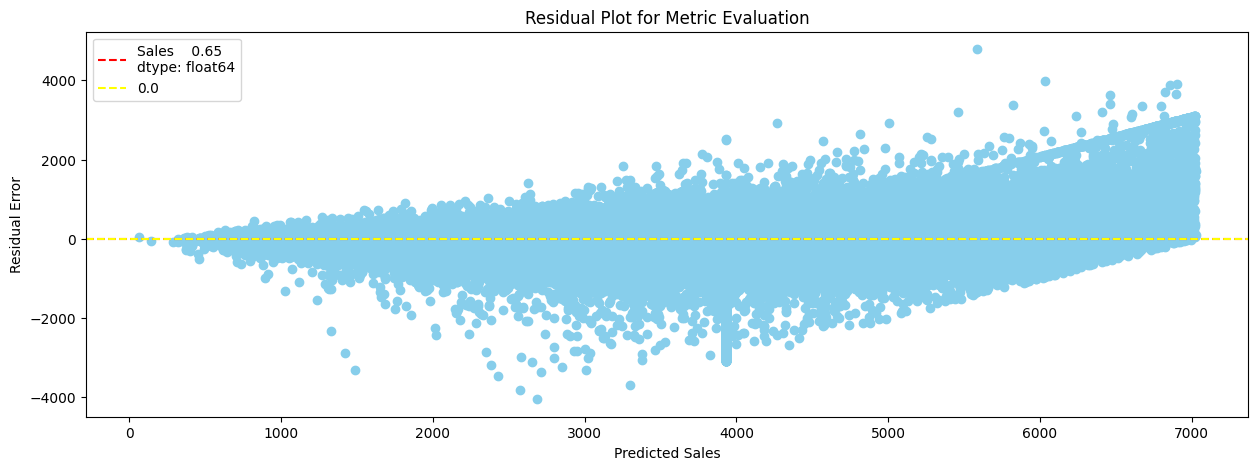

time: 1.97 s (started: 2023-06-12 17:49:41 +00:00)


In [166]:
# Metrics visulazation
y_test_DT_regressor_predict = y_test_DT_regressor_predict.reshape(-1,1)
residuals = y_test - y_test_DT_regressor_predict
mean = round((np.mean(residuals)),2)
median = round(np.median(residuals),2)
print(mean,'\n',median)
# Plot residuals
plt.figure(figsize=(15,5))
plt.scatter(y_test, residuals, c='skyblue')
plt.title('Residual Plot for Metric Evaluation')
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')
# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--', label=mean)
plt.axhline(y=np.nanmedian(residuals), color='yellow', linestyle='--', label=median)
plt.legend()

plt.show()

After simple LR models, we tried 'Decision Tree' and we saw a good increment in the r2 score from 0.70 to 0.88 that means "88% Variance of our test dataset is captured by our trained model" which is excellent. On the other side our RMSE also decreased which is very good.Also accuracy increased from 85% to 92%. On the other hand from the residual plot our values of mean and median are shifting towards 0 that means our model is improving. But, in the quest of more accurate and real predictions, we decided to further tune the hyperparameters and check the results.

#### 2. Cross- Validation & Hyperparameter Tuning

In [167]:
# import ridge regression from sklearn library
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
decision_tree= DecisionTreeRegressor()

# Defining parameters
parameters_decision_tree = {'max_depth': [14,15,16,17,18,19,20], 'min_samples_leaf': [3,4,5,6,7,8,9,10], 'min_samples_split': [1,2,4]}

# Train the model
decision_treeR = GridSearchCV(decision_tree, parameters_decision_tree, scoring='neg_mean_squared_error', cv=3)
decision_treeR.fit(x_train,y_train)

# Predict the output
y_train_decision_tree_predict = decision_treeR.predict(x_train)
y_test_decision_tree_predict =  decision_treeR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {decision_treeR.best_params_}")
print(f"Negative mean square error is: {decision_treeR.best_score_}")

The best alpha value found out to be: {'max_depth': 20, 'min_samples_leaf': 8, 'min_samples_split': 2}
Negative mean square error is: -166078.19930424241
time: 13min 25s (started: 2023-06-12 17:49:43 +00:00)


In [168]:
# Calculation of r2_Score
r2_train = r2_score(y_train,y_train_decision_tree_predict)
r2_test = r2_score(y_test,y_test_decision_tree_predict)
print('r2_score of the training data:',round(r2_train,2))
print('r2_score of the test data:',round(r2_test,2))
print('\n')
# Calculation of Adjusted r2 Score of training data
n_train = len(x_train)
p_train = x_train.shape[1]
n_test = len(x_test)
p_test = x_test.shape[1]
adjusted_r2_score_train = 1-(1-r2_train)*(n_train-1)/(n_train-p_train-1)
adjusted_r2_score_test = 1-(1-r2_test)*(n_test-1)/(n_test-p_test-1)
print('Adjusted r2 score of the training data:',round(adjusted_r2_score_train,2)) 
print('Adjusted r2 score of the training data:',round(adjusted_r2_score_test,2)) 
print('\n')
# Calculation of Mean Squared Error
mse_train = mean_squared_error(y_train,y_train_decision_tree_predict)
mse_test = mean_squared_error(y_test,y_test_decision_tree_predict)
print('Mean Squared Error of the training data:',round(mse_train,2))
print('Mean Squared Error of the test data:',round(mse_test,2))
print('\n')
# calculation of Root Mean Squared Error
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Root Mean Squared Error of the training data:',round(rmse_train,2))
print('Root Mean Squared Error of the test data:',round(rmse_test,2))
print('\n')
# Calculation of Mean Absolute Error
mae_train = mean_absolute_error(y_train,y_train_decision_tree_predict)
mae_test = mean_absolute_error(y_test,y_test_decision_tree_predict)
print('Mean Absolute Error of the training data:',round(mae_train,2))
print('Mean Absolute Error of the test data:',round(mae_test,2))
print('\n')
# Calculation of Mean Absolute Error
mape_train = 100 * mean_absolute_percentage_error(y_train,y_train_decision_tree_predict)
mape_test = 100 * mean_absolute_percentage_error(y_test,y_test_decision_tree_predict)
print('Mean Absolute Percentage Error of the training data:',round(mape_train,2),'%')
print('Mean Absolute Percentage Error of the test data:',round(mape_test,2),'%')
print('\n')
# Calculation of Accuracy Score
accuracy_train = 100 - mape_train
accuracy_test = 100 - mape_test
print('Accuracy Score of the training data:',round(accuracy_train,2),'%')
print('Accuracy Score of the test data:',round(accuracy_test,2),'%')
print('\n')


r2_score of the training data: 0.93
r2_score of the test data: 0.9


Adjusted r2 score of the training data: 0.93
Adjusted r2 score of the training data: 0.9


Mean Squared Error of the training data: 102974.08
Mean Squared Error of the test data: 151625.24


Root Mean Squared Error of the training data: 320.9
Root Mean Squared Error of the test data: 389.39


Mean Absolute Error of the training data: 197.6
Mean Absolute Error of the test data: 242.51


Mean Absolute Percentage Error of the training data: 5.8 %
Mean Absolute Percentage Error of the test data: 7.15 %


Accuracy Score of the training data: 94.2 %
Accuracy Score of the test data: 92.85 %


time: 51.1 ms (started: 2023-06-12 18:03:08 +00:00)


##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have used different combinations of parameters to get the best value of r2 score and least MAPE for our case. The best combination was found out to be  {'max_depth': 20, 'min_samples_leaf': 8, 'min_samples_split': 2} which resulted into the improvement in the MSE from 172293.35 to 151592.33 on the test set. Also MAPE is further reduced from 7.39 % to 7.15% and capturing variance 2% more i.e 90% of the test dataset. At this point of time we have achieved 92.85% accuracy by hyperparameter tuning of Decision trees.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

We assess our ML model using various metrics in an effort to reduce the errors between actual and predicted values. All of these indicators aim to show us how near we are to the actual or anticipated output. Each evaluation parameter in our situation displays minimal variation between the train and test data, indicating that our model accurately predicts the predicted value. Therefore, the dependent variable, sales, which affects the firm, is predicted with an accuracy of 92% and a deviation of 3% from the mean of actual absolute values.

### ML Model - 3 (Random Forest Tree)

In [169]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestRegressor

RFtree_regression = RandomForestRegressor(n_estimators= 100, max_depth= 20)
# Fit the Algorithm
RFtree_regression.fit(x_train,y_train)
# Predict on the model
y_train_RFtree_predict = RFtree_regression.predict(x_train)
y_test_RFtree_predict = RFtree_regression.predict(x_test)

time: 4min 49s (started: 2023-06-12 18:03:08 +00:00)


In [170]:
# Calculation of r2_Score
r2_train = r2_score(y_train,y_train_RFtree_predict)
r2_test = r2_score(y_test,y_test_RFtree_predict)
print('r2_score of the training data:',round(r2_train,2))
print('r2_score of the test data:',round(r2_test,2))
print('\n')
# Calculation of Adjusted r2 Score of training data
n_train = len(x_train)
p_train = x_train.shape[1]
n_test = len(x_test)
p_test = x_test.shape[1]
adjusted_r2_score_train = 1-(1-r2_train)*(n_train-1)/(n_train-p_train-1)
adjusted_r2_score_test = 1-(1-r2_test)*(n_test-1)/(n_test-p_test-1)
print('Adjusted r2 score of the training data:',round(adjusted_r2_score_train,2)) 
print('Adjusted r2 score of the training data:',round(adjusted_r2_score_test,2)) 
print('\n')
# Calculation of Mean Squared Error
mse_train = mean_squared_error(y_train,y_train_RFtree_predict)
mse_test = mean_squared_error(y_test,y_test_RFtree_predict)
print('Mean Squared Error of the training data:',round(mse_train,2))
print('Mean Squared Error of the test data:',round(mse_test,2))
print('\n')
# calculation of Root Mean Squared Error
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Root Mean Squared Error of the training data:',round(rmse_train,2))
print('Root Mean Squared Error of the test data:',round(rmse_test,2))
print('\n')
# Calculation of Mean Absolute Error
mae_train = mean_absolute_error(y_train,y_train_RFtree_predict)
mae_test = mean_absolute_error(y_test,y_test_RFtree_predict)
print('Mean Absolute Error of the training data:',round(mae_train,2))
print('Mean Absolute Error of the test data:',round(mae_test,2))
print('\n')
# Calculation of Mean Absolute Error
mape_train = 100 * mean_absolute_percentage_error(y_train,y_train_RFtree_predict)
mape_test = 100 * mean_absolute_percentage_error(y_test,y_test_RFtree_predict)
print('Mean Absolute Percentage Error of the training data:',round(mape_train,2),'%')
print('Mean Absolute Percentage Error of the test data:',round(mape_test,2),'%')
print('\n')
# Calculation of Accuracy Score
accuracy_train = 100 - mape_train
accuracy_test = 100 - mape_test
print('Accuracy Score of the training data:',round(accuracy_train,2),'%')
print('Accuracy Score of the test data:',round(accuracy_test,2),'%')
print('\n')


r2_score of the training data: 0.96
r2_score of the test data: 0.92


Adjusted r2 score of the training data: 0.96
Adjusted r2 score of the training data: 0.92


Mean Squared Error of the training data: 52629.55
Mean Squared Error of the test data: 113641.13


Root Mean Squared Error of the training data: 229.41
Root Mean Squared Error of the test data: 337.11


Mean Absolute Error of the training data: 137.85
Mean Absolute Error of the test data: 208.77


Mean Absolute Percentage Error of the training data: 4.01 %
Mean Absolute Percentage Error of the test data: 6.14 %


Accuracy Score of the training data: 95.99 %
Accuracy Score of the test data: 93.86 %


time: 30.9 ms (started: 2023-06-12 18:07:58 +00:00)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

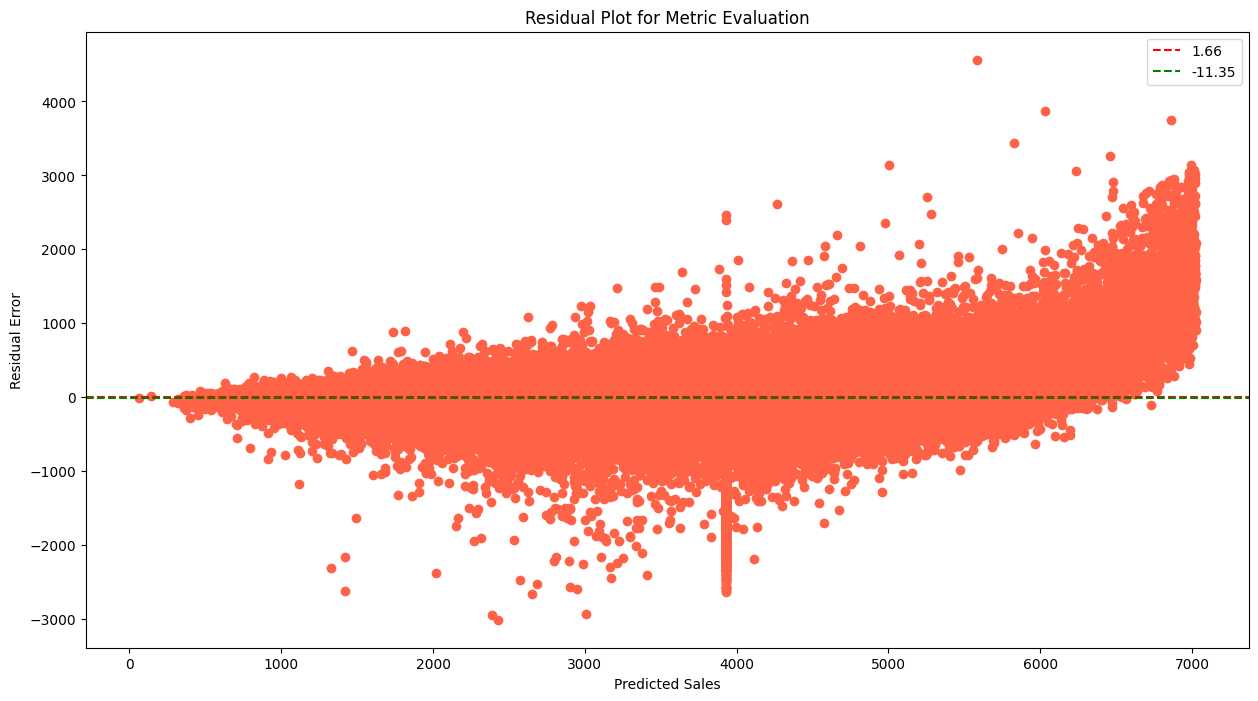

time: 1 s (started: 2023-06-12 18:07:58 +00:00)


In [171]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart
# Calculating residuals
y_test_RFtree_predict= y_test_RFtree_predict.reshape(-1,1)
residuals_RF = y_test - y_test_RFtree_predict
Mean= round(np.mean(residuals_RF),2)
Median= round(np.median(residuals_RF),2)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_RF, c="tomato")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_RF), color='red', linestyle='--', label=Mean[0])
plt.axhline(y=np.nanmedian(residuals_RF), color='green', linestyle='--', label=Median)
plt.legend()

plt.show()

After Decision Tree Model, we tried 'Random Forest Tree' and we achieved the r2 score of the traing is 0.96 and r2 score of the test dataset is 0.92 that means "92% Variance of our test dataset is captured by our trained model" which is excellent. On the other side our RMSE also decreased which is very good.Also accuracy score of the training dataset is 95.99% and accuracy score of the test dataset is 93.86%. On the other hand from the residual plot our values of mean and median are shifting towards 0 that means our model is improving. But, in the quest of more accurate and real predictions, we decided to further tune the hyperparameters and check the results.

#### 2. Cross- Validation & Hyperparameter Tuning

In [172]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# import ridge regression from sklearn library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge instance
RF_tree= RandomForestRegressor()

# Defining parameters
parameters= {'n_estimators':[100], 'max_depth': [17,19,20], 'min_samples_leaf': [1, 2]}

# Train the model
RF_treeR = RandomizedSearchCV(RF_tree, parameters, n_iter=5, n_jobs=-1, scoring='neg_mean_squared_error', cv=3,  verbose=3)
RF_treeR.fit(x_train,y_train)

# Predict the output
y_train_grid_RFtree_pred = RF_treeR.predict(x_train)
y_test_grid_RFtree_pred = RF_treeR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {RF_treeR.best_params_}")
print(f"Negative mean square error is: {RF_treeR.best_score_}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
The best alpha value found out to be: {'n_estimators': 100, 'min_samples_leaf': 1, 'max_depth': 20}
Negative mean square error is: -122610.99763404155
time: 35min 48s (started: 2023-06-12 18:07:59 +00:00)


In [173]:
# Calculation of r2_Score
r2_train = r2_score(y_train,y_train_grid_RFtree_pred)
r2_test = r2_score(y_test,y_test_grid_RFtree_pred)
print('r2_score of the training data:',round(r2_train,2))
print('r2_score of the test data:',round(r2_test,2))
print('\n')
# Calculation of Adjusted r2 Score of training data
n_train = len(x_train)
p_train = x_train.shape[1]
n_test = len(x_test)
p_test = x_test.shape[1]
adjusted_r2_score_train = 1-(1-r2_train)*(n_train-1)/(n_train-p_train-1)
adjusted_r2_score_test = 1-(1-r2_test)*(n_test-1)/(n_test-p_test-1)
print('Adjusted r2 score of the training data:',round(adjusted_r2_score_train,2)) 
print('Adjusted r2 score of the training data:',round(adjusted_r2_score_test,2)) 
print('\n')
# Calculation of Mean Squared Error
mse_train = mean_squared_error(y_train,y_train_grid_RFtree_pred)
mse_test = mean_squared_error(y_test,y_test_grid_RFtree_pred)
print('Mean Squared Error of the training data:',round(mse_train,2))
print('Mean Squared Error of the test data:',round(mse_test,2))
print('\n')
# calculation of Root Mean Squared Error
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Root Mean Squared Error of the training data:',round(rmse_train,2))
print('Root Mean Squared Error of the test data:',round(rmse_test,2))
print('\n')
# Calculation of Mean Absolute Error
mae_train = mean_absolute_error(y_train,y_train_grid_RFtree_pred)
mae_test = mean_absolute_error(y_test,y_test_grid_RFtree_pred)
print('Mean Absolute Error of the training data:',round(mae_train,2))
print('Mean Absolute Error of the test data:',round(mae_test,2))
print('\n')
# Calculation of Mean Absolute Error
mape_train = 100 * mean_absolute_percentage_error(y_train,y_train_grid_RFtree_pred)
mape_test = 100 * mean_absolute_percentage_error(y_test,y_test_grid_RFtree_pred)
print('Mean Absolute Percentage Error of the training data:',round(mape_train,2),'%')
print('Mean Absolute Percentage Error of the test data:',round(mape_test,2),'%')
print('\n')
# Calculation of Accuracy Score
accuracy_train = 100 - mape_train
accuracy_test = 100 - mape_test
print('Accuracy Score of the training data:',round(accuracy_train,2),'%')
print('Accuracy Score of the test data:',round(accuracy_test,2),'%')
print('\n')


r2_score of the training data: 0.96
r2_score of the test data: 0.92


Adjusted r2 score of the training data: 0.96
Adjusted r2 score of the training data: 0.92


Mean Squared Error of the training data: 52800.73
Mean Squared Error of the test data: 113726.86


Root Mean Squared Error of the training data: 229.78
Root Mean Squared Error of the test data: 337.23


Mean Absolute Error of the training data: 137.99
Mean Absolute Error of the test data: 208.86


Mean Absolute Percentage Error of the training data: 4.01 %
Mean Absolute Percentage Error of the test data: 6.14 %


Accuracy Score of the training data: 95.99 %
Accuracy Score of the test data: 93.86 %


time: 40.3 ms (started: 2023-06-12 18:43:47 +00:00)


##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have used different combinations of parameters to get the best value of r2 score and least MAPE for our case. The best combination was found out to be  {'n_estimators': 100, 'min_samples_leaf': 1, 'max_depth': 20} which resulted into the improvement in the MSE from 113594.31 to 113782.2 on the test set. Also MAPE is further same as 6.14 % and capturing variance 92% of the test dataset. At this point of time we have achieved 93.86% accuracy by hyperparameter tuning of Random Forest Tree Regression.

### ML Model - 4 (XGBOOST Regression)

In [149]:
# ML Model - 3 Implementation
# Import XGBoost regressor librerary
from xgboost import XGBRegressor

XGBR = XGBRegressor(learning_rate = 0.2,max_depth = 8)

# Fit the Algorithm
XGBR.fit(x_train,y_train)
# Predict on the model
y_train_xgbr_predict = XGBR.predict(x_train)
y_test_xgbr_predict = XGBR.predict(x_test)

time: 1min 8s (started: 2023-06-12 17:17:31 +00:00)


#### Metrics Calculation

In [150]:
# Calculation of r2:
r2_train = r2_score(y_train,y_train_xgbr_predict)
r2_test = r2_score(y_test,y_test_xgbr_predict)
print(f'r2 score of the training dataset: {round(r2_train,2)}  \n r2 score of the test dataset: {round(r2_test,2)} \n ')
# Calculation of Adjusted r2 :
n_train = len(x_train)
p_train = x_train.shape[1]
n_test = len(x_test)
p_test = x_test.shape[1]
adjusted_r2 = 1 - (r2_train)*(n_train - 1)/(n_train - p_train -1)
adjusted_r2 = 1 - (r2_test)*(n_train -1)/(n_train - p_train -1)
print(f'Adjusted r2 score of the training dataset: {round(adjusted_r2,2)} \n Adjusted r2 score of the test dataset:{round(adjusted_r2,2)} \n')
# Calculation of Mean Squared Error(MSE):
mse_train = mean_squared_error(y_train,y_train_xgbr_predict)
mse_test = mean_squared_error(y_test,y_test_xgbr_predict)
print(f'Mean Squared Error of the training dataset: {round(mse_train,2)} \n Mean Squared Error of the test dataset:{round(mse_test,2)} \n')
#calculation of Root Mean Squared Error(RMSe):
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f'Root Mean Squared Error of the training dataset:{round(rmse_train,2)} \n Root Mean Squared Error of the test dataset: {round(rmse_test,2)}\n')
# Calculation of Mean Absolute Error(MAE):
mae_train = mean_absolute_error(y_train,y_train_xgbr_predict)
mae_test = mean_absolute_error(y_test,y_test_xgbr_predict)
print(f'Mean Absolute Error of the training dataset: {round(mae_train,2)} \n Mean Absolute error of the test dataset: {round(mae_test,2)} \n')
# calculation of Mean Absolute Percentage Error(MAPE):
mape_train = 100 * mean_absolute_percentage_error(y_train,y_train_xgbr_predict)
mape_test = 100 * mean_absolute_percentage_error(y_test,y_test_xgbr_predict)
print(f'Mean Absolute Percentage Error of the training dataset: {round(mape_train,2)}% \n Mean Absolute Percentage Error of the test dataset: {round(mape_test,2)}% \n')
# Calculation of Accuracy Score:
accuracy_train = 100 - mape_train
accuracy_test = 100 - mape_test
print(f'Accuracy score of the training dataset: {round(accuracy_train,2)}% \n Accuracy score of the test dataset: {round(accuracy_test,2)}% \n')

r2 score of the training dataset: 0.92  
 r2 score of the test dataset: 0.91 
 
Adjusted r2 score of the training dataset: 0.09 
 Adjusted r2 score of the test dataset:0.09 

Mean Squared Error of the training dataset: 126146.02 
 Mean Squared Error of the test dataset:135626.31 

Root Mean Squared Error of the training dataset:355.17 
 Root Mean Squared Error of the test dataset: 368.27

Mean Absolute Error of the training dataset: 236.47 
 Mean Absolute error of the test dataset: 243.26 

Mean Absolute Percentage Error of the training dataset: 6.98% 
 Mean Absolute Percentage Error of the test dataset: 7.16% 

Accuracy score of the training dataset: 93.02% 
 Accuracy score of the test dataset: 92.84% 

time: 26.7 ms (started: 2023-06-12 17:18:40 +00:00)


time: 41 ms (started: 2023-06-12 17:18:40 +00:00)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Mean of the residuals: Sales   -0.38
dtype: float64,
 Meadian of the residuals:-17.43


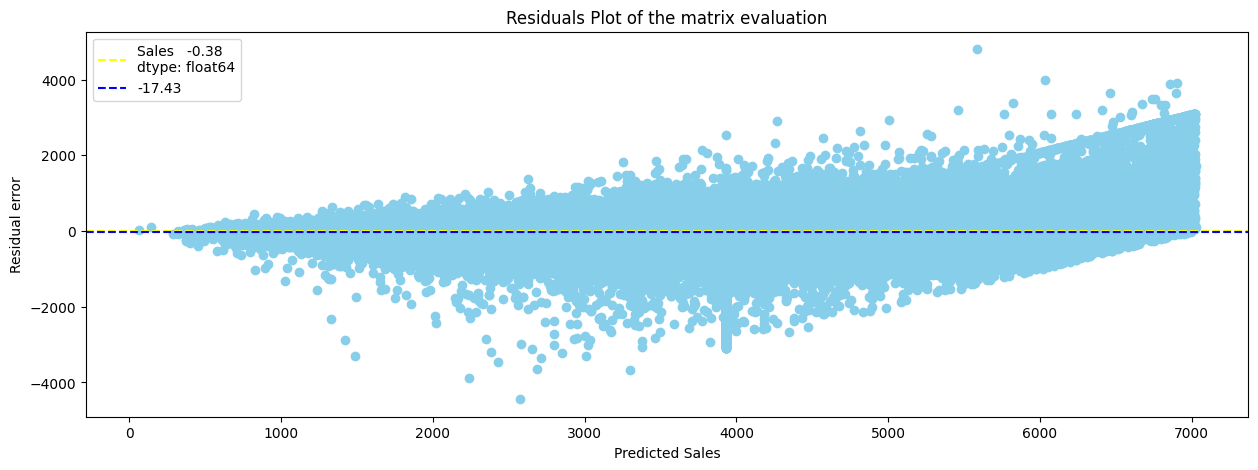

time: 2.38 s (started: 2023-06-12 17:18:40 +00:00)


In [151]:
# Visualizing evaluation Metric Score chart
y_test_xgbr_predict = y_test_xgbr_predict.reshape(-1,1)
residuals_xgbr = y_test - y_test_xgbr_predict
mean = round(np.mean(residuals_xgbr),2)
median = round(np.median(residuals_xgbr),2)
print(f'Mean of the residuals: {mean},\n Meadian of the residuals:{median}')
# Scatter Plot of the residuals_xgbr
plt.figure(figsize= (15,5))
plt.scatter(x= y_test,y= residuals,c= 'skyblue')
plt.title('Residuals Plot of the matrix evaluation')
plt.xlabel('Predicted Sales')
plt.ylabel('Residual error')
# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_xgbr), color='yellow', linestyle='--', label=mean)
plt.axhline(y=np.nanmedian(residuals_xgbr), color='blue', linestyle='--', label=median)
plt.legend()

plt.show()

After Random Forest Tree Model, we tried XGBoost Model and we achieved the r2 score of the traing is 0.92 and r2 score of the test dataset is 0.91 that means "91%" Variance of our test dataset is captured by our trained model  which is excellent. On the other side our RMSE also decreased which is very good.Also accuracy score of the training dataset is 93.02% and accuracy score of the test dataset is 92.84%. On the other hand from the residual plot our values of mean and median are shifting towards 0 that means our model is improving. But, in the quest of more accurate and real predictions, we decided to further tune the hyperparameters and check the results.

#### 2. Cross- Validation & Hyperparameter Tuning

In [152]:
# import ridge regression from sklearn library and RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Creating XGBoost instance
xgb= XGBRegressor()

# Defining parameters
parameters={"learning_rate":[0.01, 0.1],"max_depth":[12,13]}

# Train the model
xgb_Rand_R= GridSearchCV(xgb,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
xgb_Rand_R.fit(x_train,y_train)

# Predict the output
y_train_rand_xgbR_pred = xgb_Rand_R.predict(x_train)
y_test_rand_xgbR_pred = xgb_Rand_R.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {xgb_Rand_R.best_params_}")
print(f"Negative mean square error is: {xgb_Rand_R.best_score_}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
The best alpha value found out to be: {'learning_rate': 0.1, 'max_depth': 13}
Negative mean square error is: -113775.379635148
time: 20min 5s (started: 2023-06-12 17:18:42 +00:00)


In [153]:
# calculation of r2 score:
r2_train = r2_score(y_train,y_train_rand_xgbR_pred)
r2_test = r2_score(y_test,y_test_rand_xgbR_pred)
print(f'r2 score of the training dataset: {round(r2_train,2)} \n r2 score of the test dataset: {round(r2_test,2)} \n')
# Calculation of Asjusted r2 score:
n_train = len(x_train)
p_train = x_train.shape[1]
n_test = len(x_test)
p_test = x_test.shape[1]
adjusted_r2_train = 1 - (r2_train)*(n_train - 1)/(n_train - p_train -1)
adjusted_r2_test = 1 - (r2_test)*(n_test - 1)/(n_test - p_test -1)
print(f'Adjusted r2 score of the training dataset: {round(adjusted_r2_train,2)} \n Adjusted r2 score of the test dataset: {round(adjusted_r2_test,2)} \n')
# Calculation of Mean Squared Error(MSE):
mse_train = mean_squared_error(y_train,y_train_rand_xgbR_pred)
mse_test = mean_squared_error(y_test,y_test_rand_xgbR_pred)
print(f'Mean Squared Error of the training dataset: {round(mse_train,2)} \n Mean Squared Error of the test dataset: {round(mse_test,2)} \n')
# Calculation of Root Mean Squared Error(RMSE):
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f'Root Mean Squared Error of the training dataset: {round(rmse_train,2)} \n Root Mean Squared Error of the test dataset: {round(rmse_test,2)} \n')
# Calculation of Mean Absolute Error(MAE):
mae_train = mean_absolute_error(y_train,y_train_rand_xgbR_pred)
mae_test = mean_absolute_error(y_test,y_test_rand_xgbR_pred)
print(f'Mean Absolute Error of the training dataset: {round(mae_train,2)} \n Mean Absolute Error of the test dataset: {round(mae_test,2)} \n')
# Calculation of Mean Absolute Percentage Error (MAPE):
mape_train = 100 * mean_absolute_percentage_error(y_train,y_train_rand_xgbR_pred)
mape_test = 100 * mean_absolute_percentage_error(y_test,y_test_rand_xgbR_pred)
print(f'Mean Absolute Percentage Error of the training dataset: {round(mape_train,2)}% \n Mean Absolute Percentage Error of the test dataset: {round(mape_test,2)}% \n')
# Calculation of Accuracy Score:
accuracy_train = 100 - mape_train
accuracy_test = 100 - mape_test
print(f'Accuracy score of the training dataset: {round(accuracy_train,2)}% \n Accuracy score of the test dataset: {round(accuracy_test,2)}% \n')

r2 score of the training dataset: 0.95 
 r2 score of the test dataset: 0.93 

Adjusted r2 score of the training dataset: 0.05 
 Adjusted r2 score of the test dataset: 0.07 

Mean Squared Error of the training dataset: 72603.83 
 Mean Squared Error of the test dataset: 109133.97 

Root Mean Squared Error of the training dataset: 269.45 
 Root Mean Squared Error of the test dataset: 330.35 

Mean Absolute Error of the training dataset: 172.86 
 Mean Absolute Error of the test dataset: 206.72 

Mean Absolute Percentage Error of the training dataset: 5.12% 
 Mean Absolute Percentage Error of the test dataset: 6.06% 

Accuracy score of the training dataset: 94.88% 
 Accuracy score of the test dataset: 93.94% 

time: 27.2 ms (started: 2023-06-12 17:38:47 +00:00)


##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have used different combinations of parameters to get the best value of r2 score and least MAPE for our case. The best combination was found out to be  {'learning_rate': 0.1, 'max_depth': 13} which resulted into the improvement in the MSE from 135626.31  to 109133.97  on the test set. Also MAPE is further same as 6.06 % and capturing variance 93% of the test dataset. At this point of time we have achieved 93.94% accuracy by hyperparameter tuning of XGBoost Regression.

### ML Model - 5 (LGBM Regression)

In [154]:
# ML Model - 3 Implementation
# Import LightGBM regressor:
from lightgbm import LGBMRegressor

lgbm_regressor = LGBMRegressor(boosting_type='gbdt', max_depth=120, learning_rate=0.1, n_estimators=500,  n_jobs=-1)

# Fit the Algorithm
lgbm_regressor.fit(x_train,y_train)
# Predict on the model
y_train_lgbm_predict = lgbm_regressor.predict(x_train)
y_test_lgbm_predict = lgbm_regressor.predict(x_test)

time: 25.9 s (started: 2023-06-12 17:38:47 +00:00)


#### Metrics evaluation

In [155]:
# calculation of r2 score:
r2_train = r2_score(y_train,y_train_lgbm_predict)
r2_test = r2_score(y_test,y_test_lgbm_predict)
print(f'r2 score of the training dataset: {round(r2_train,2)} \n r2 score of the test dataset: {round(r2_test,2)} \n')
# Calculation of Asjusted r2 score:
n_train = len(x_train)
p_train = x_train.shape[1]
n_test = len(x_test)
p_test = x_test.shape[1]
adjusted_r2_train = 1 - (r2_train)*(n_train - 1)/(n_train - p_train -1)
adjusted_r2_test = 1 - (r2_test)*(n_test - 1)/(n_test - p_test -1)
print(f'Adjusted r2 score of the training dataset: {round(adjusted_r2_train,2)} \n Adjusted r2 score of the test dataset: {round(adjusted_r2_test,2)} \n')
# Calculation of Mean Squared Error(MSE):
mse_train = mean_squared_error(y_train,y_train_lgbm_predict)
mse_test = mean_squared_error(y_test,y_test_lgbm_predict)
print(f'Mean Squared Error of the training dataset: {round(mse_train,2)} \n Mean Squared Error of the test dataset: {round(mse_test,2)} \n')
# Calculation of Root Mean Squared Error(RMSE):
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f'Root Mean Squared Error of the training dataset: {round(rmse_train,2)} \n Root Mean Squared Error of the test dataset: {round(rmse_test,2)} \n')
# Calculation of Mean Absolute Error(MAE):
mae_train = mean_absolute_error(y_train,y_train_lgbm_predict)
mae_test = mean_absolute_error(y_test,y_test_lgbm_predict)
print(f'Mean Absolute Error of the training dataset: {round(mae_train,2)} \n Mean Absolute Error of the test dataset: {round(mae_test,2)} \n')
# Calculation of Mean Absolute Percentage Error (MAPE):
mape_train = 100 * mean_absolute_percentage_error(y_train,y_train_lgbm_predict)
mape_test = 100 * mean_absolute_percentage_error(y_test,y_test_lgbm_predict)
print(f'Mean Absolute Percentage Error of the training dataset: {round(mape_train,2)}% \n Mean Absolute Percentage Error of the test dataset: {round(mape_test,2)}% \n')
# Calculation of Accuracy Score:
accuracy_train = 100 - mape_train
accuracy_test = 100 - mape_test
print(f'Accuracy score of the training dataset: {round(accuracy_train,2)}% \n Accuracy score of the test dataset: {round(accuracy_test,2)}% \n')

r2 score of the training dataset: 0.9 
 r2 score of the test dataset: 0.9 

Adjusted r2 score of the training dataset: 0.1 
 Adjusted r2 score of the test dataset: 0.1 

Mean Squared Error of the training dataset: 141636.79 
 Mean Squared Error of the test dataset: 145807.1 

Root Mean Squared Error of the training dataset: 376.35 
 Root Mean Squared Error of the test dataset: 381.85 

Mean Absolute Error of the training dataset: 254.95 
 Mean Absolute Error of the test dataset: 257.64 

Mean Absolute Percentage Error of the training dataset: 7.58% 
 Mean Absolute Percentage Error of the test dataset: 7.65% 

Accuracy score of the training dataset: 92.42% 
 Accuracy score of the test dataset: 92.35% 

time: 26.4 ms (started: 2023-06-12 17:39:13 +00:00)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Mean of the residuals: Sales   -0.63
dtype: float64 
 Median of the residuals: -20.06


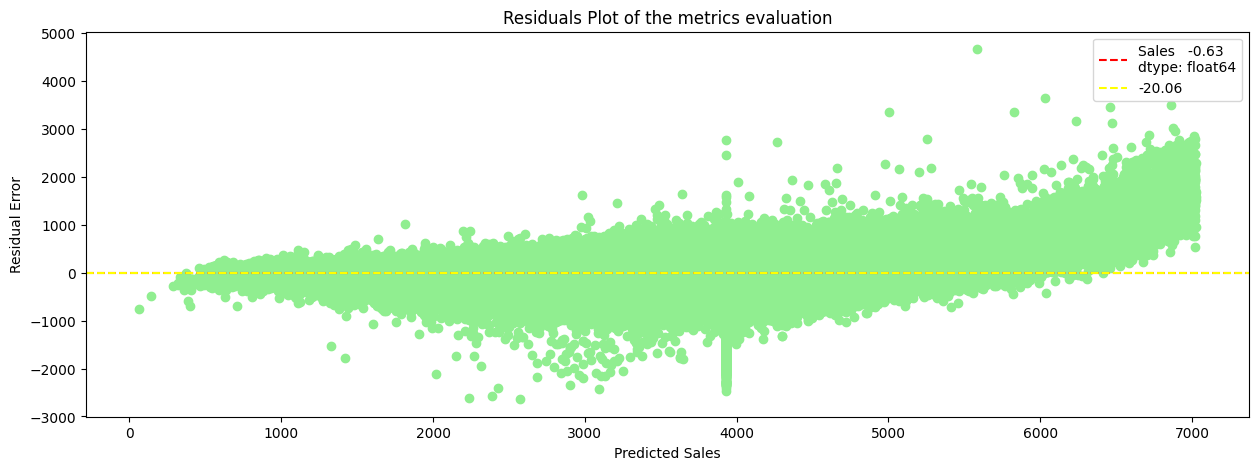

time: 1.01 s (started: 2023-06-12 17:39:13 +00:00)


In [156]:
# Visualizing evaluation Metric Score chart
y_test_lgbm_predict = y_test_lgbm_predict.reshape(-1,1)
residuals_lgbm = y_test - y_test_lgbm_predict
mean = round(np.mean(residuals_lgbm),2)
median = round(np.median(residuals_lgbm),2)
print(f'Mean of the residuals: {mean} \n Median of the residuals: {median}')
# Residuals Plot
plt.figure(figsize= (15,5))
plt.scatter(x= y_test, y= residuals_lgbm, c= 'lightgreen')
plt.title('Residuals Plot of the metrics evaluation')
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')
# Add horizontal line at mean value of y
plt.axhline(y=np.nanmean(residuals_xgbr), color='red', linestyle='--', label=mean)
plt.axhline(y=np.nanmedian(residuals_xgbr), color='yellow', linestyle='--', label=median)
plt.legend()

plt.show()

After Random Forest Tree Model, we tried XGBoost Model and we achieved the r2 score of the traing is 0.92 and r2 score of the test dataset is 0.91 that means "91%" Variance of our test dataset is captured by our trained model  which is excellent. On the other side our RMSE also decreased which is very good.Also accuracy score of the training dataset is 93.02% and accuracy score of the test dataset is 92.84%. On the other hand from the residual plot our values of mean and median are shifting towards 0 that means our model is improving. But, in the quest of more accurate and real predictions, we decided to further tune the hyperparameters and check the results.

#### 2. Cross- Validation & Hyperparameter Tuning

In [157]:
# import ridge regression from sklearn library and RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Creating XGBoost instance
lgbm= LGBMRegressor()

# Defining parameters
parameters={"learning_rate":[0.01,0.1],"max_depth":[120,125,150],"n_estimators":[500,600]}

# Train the model
lgbm_rand_R= RandomizedSearchCV(lgbm,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
lgbm_rand_R.fit(x_train,y_train)

# Predict the output
y_train_rand_lgbm_pred = lgbm_rand_R.predict(x_train)
y_test_rand_lgbm_pred = lgbm_rand_R.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lgbm_rand_R.best_params_}")
print(f"Negative mean square error is: {lgbm_rand_R.best_score_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
The best alpha value found out to be: {'n_estimators': 600, 'max_depth': 125, 'learning_rate': 0.1}
Negative mean square error is: -140593.1819349595
time: 10min 22s (started: 2023-06-12 17:39:14 +00:00)


In [158]:
# calculation of r2 score:
r2_train = r2_score(y_train,y_train_rand_lgbm_pred)
r2_test = r2_score(y_test,y_test_rand_lgbm_pred)
print(f'r2 score of the training dataset: {round(r2_train,2)} \n r2 score of the test dataset: {round(r2_test,2)} \n')
# Calculation of Asjusted r2 score:
n_train = len(x_train)
p_train = x_train.shape[1]
n_test = len(x_test)
p_test = x_test.shape[1]
adjusted_r2_train = 1 - (r2_train)*(n_train - 1)/(n_train - p_train -1)
adjusted_r2_test = 1 - (r2_test)*(n_test - 1)/(n_test - p_test -1)
print(f'Adjusted r2 score of the training dataset: {round(adjusted_r2_train,2)} \n Adjusted r2 score of the test dataset: {round(adjusted_r2_test,2)} \n')
# Calculation of Mean Squared Error(MSE):
mse_train = mean_squared_error(y_train,y_train_rand_lgbm_pred)
mse_test = mean_squared_error(y_test,y_test_rand_lgbm_pred)
print(f'Mean Squared Error of the training dataset: {round(mse_train,2)} \n Mean Squared Error of the test dataset: {round(mse_test,2)} \n')
# Calculation of Root Mean Squared Error(RMSE):
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f'Root Mean Squared Error of the training dataset: {round(rmse_train,2)} \n Root Mean Squared Error of the test dataset: {round(rmse_test,2)} \n')
# Calculation of Mean Absolute Error(MAE):
mae_train = mean_absolute_error(y_train,y_train_rand_lgbm_pred)
mae_test = mean_absolute_error(y_test,y_test_rand_lgbm_pred)
print(f'Mean Absolute Error of the training dataset: {round(mae_train,2)} \n Mean Absolute Error of the test dataset: {round(mae_test,2)} \n')
# Calculation of Mean Absolute Percentage Error (MAPE):
mape_train = 100 * mean_absolute_percentage_error(y_train,y_train_rand_lgbm_pred)
mape_test = 100 * mean_absolute_percentage_error(y_test,y_test_rand_lgbm_pred)
print(f'Mean Absolute Percentage Error of the training dataset: {round(mape_train,2)}% \n Mean Absolute Percentage Error of the test dataset: {round(mape_test,2)}% \n')
# Calculation of Accuracy Score:
accuracy_train = 100 - mape_train
accuracy_test = 100 - mape_test
print(f'Accuracy score of the training dataset: {round(accuracy_train,2)}% \n Accuracy score of the test dataset: {round(accuracy_test,2)}% \n')

r2 score of the training dataset: 0.91 
 r2 score of the test dataset: 0.91 

Adjusted r2 score of the training dataset: 0.09 
 Adjusted r2 score of the test dataset: 0.09 

Mean Squared Error of the training dataset: 133553.43 
 Mean Squared Error of the test dataset: 138660.17 

Root Mean Squared Error of the training dataset: 365.45 
 Root Mean Squared Error of the test dataset: 372.37 

Mean Absolute Error of the training dataset: 245.36 
 Mean Absolute Error of the test dataset: 248.58 

Mean Absolute Percentage Error of the training dataset: 7.3% 
 Mean Absolute Percentage Error of the test dataset: 7.38% 

Accuracy score of the training dataset: 92.7% 
 Accuracy score of the test dataset: 92.62% 

time: 41.4 ms (started: 2023-06-12 17:49:37 +00:00)


##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have used different combinations of parameters to get the best value of r2 score and least MAPE for our case. The best combination was found out to be  {'n_estimators': 600, 'max_depth': 125, 'learning_rate': 0.1} which resulted into the improvement in the MSE from 145807.1 to 138660.17  on the test set. Also MAPE is further same as 7.38 % and capturing variance 91% of the test dataset. At this point of time we have achieved 92.62% accuracy by hyperparameter tuning of LGBM Regression.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***